In [1]:
# Necessary imports
import nltk, re, pandas as pd, xml, os, sklearn, string, numpy as np, time, pickle, gc as gc, warnings
import seaborn as sns, matplotlib.pyplot as plt, plotly.express as px, plotly.offline as plotly_offline
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_validate, StratifiedShuffleSplit, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from nltk.stem.snowball import SnowballStemmer

from research_utils import *

# Other settings
gc.enable()
warnings.filterwarnings("ignore")
plotly_offline.init_notebook_mode(connected = True)

In [2]:
global sims
global folds

sims = 10
folds = 3

## Step 1 - Load and clean

In [3]:
df = pd.read_csv('Amazon Reviews.csv')

In [4]:
# Create parsed dataframes and their types
dfs, names, classes = create_amazon_dataframes(df, True, 'Rating')

In [5]:
# Show class distribution
print(classes.value_counts())

1.0    19874
0.0    14562
Name: Rating, dtype: int64


## Step 2 - Perform routine analysis
- Correlation heatmap with specificities
- Distribution of words
- Class evaluation

### Correlation Heatmaps

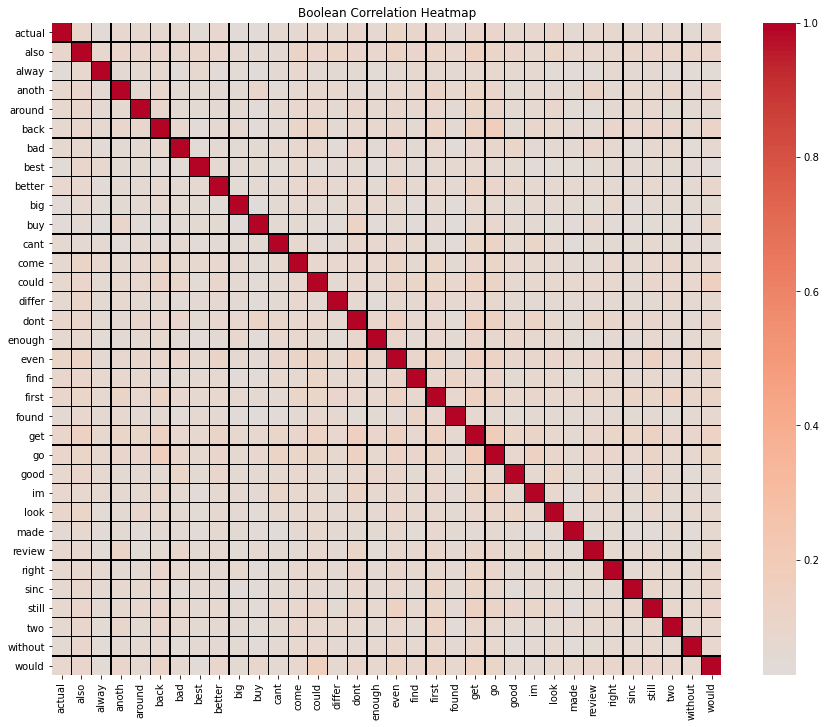

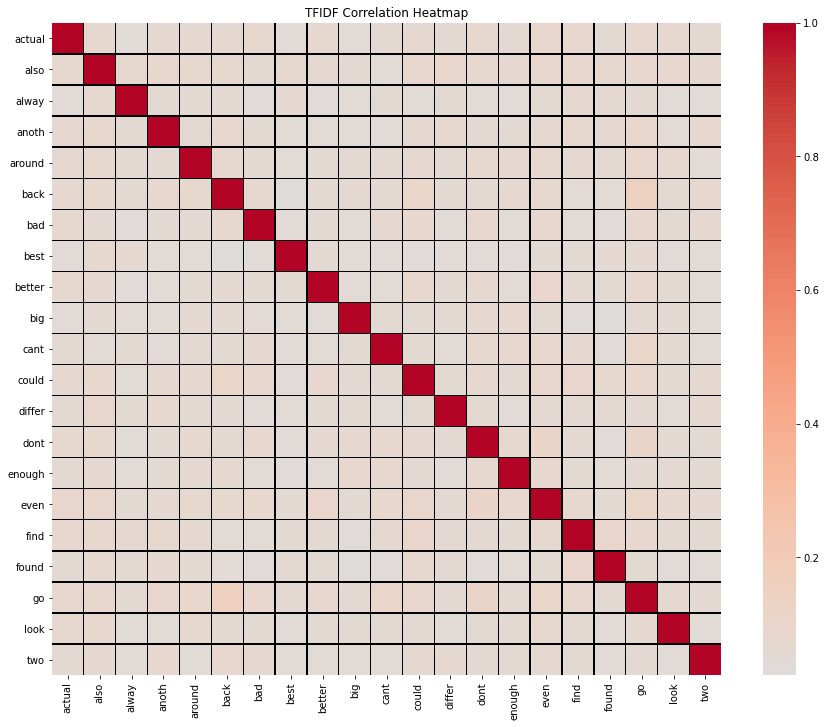

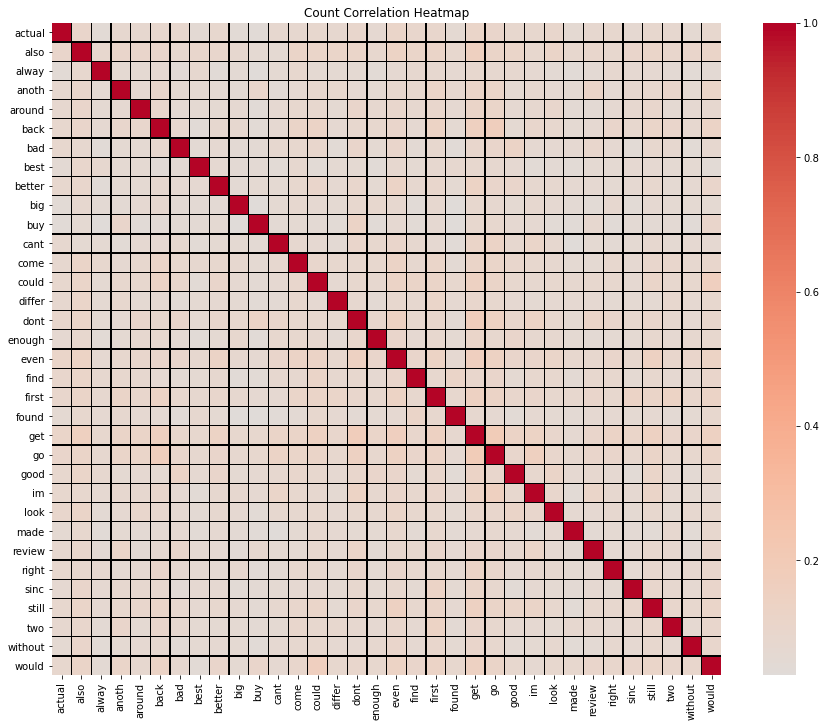

In [6]:
# Start calculating their correlation

for i in range(len(dfs)):
    plot_correlations(dfs[i], names[i])

### Distribution Plots

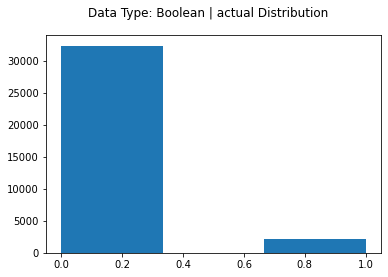

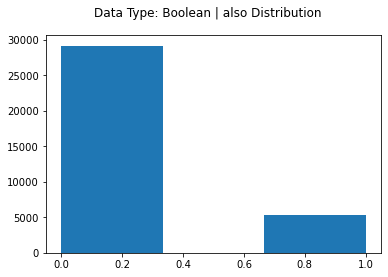

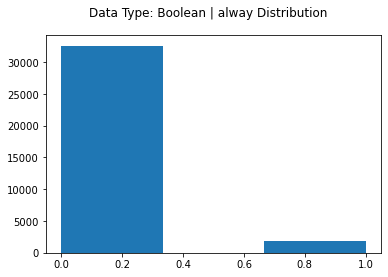

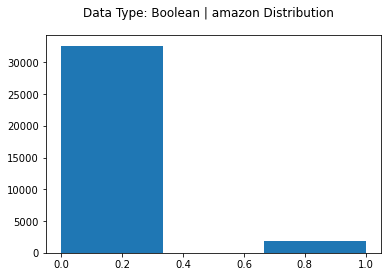

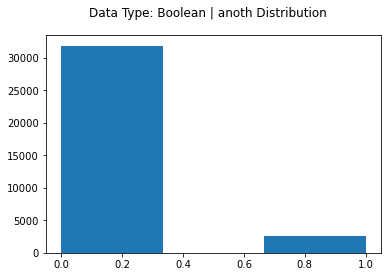

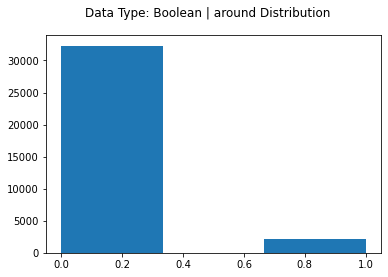

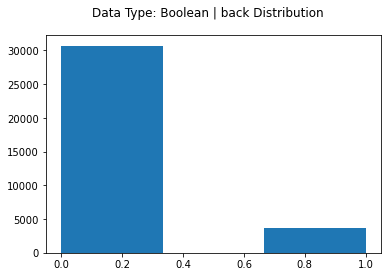

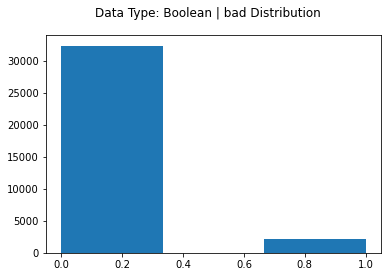

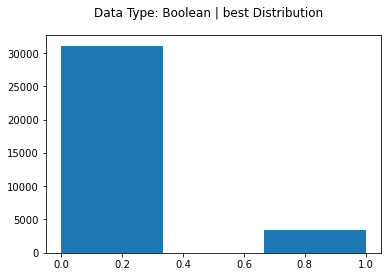

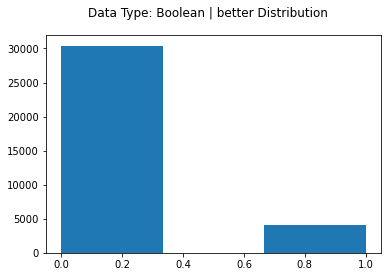

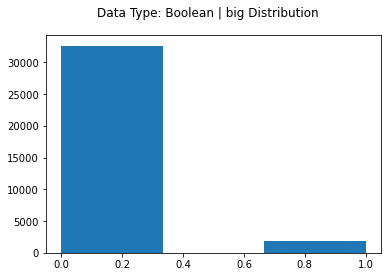

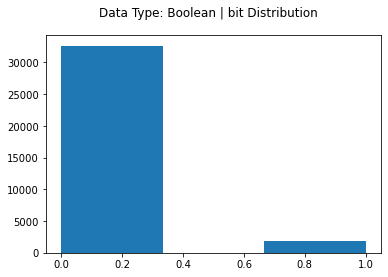

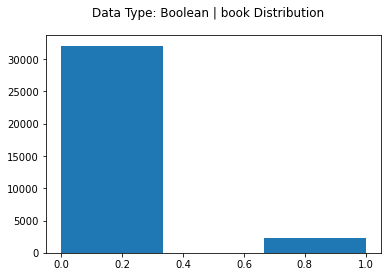

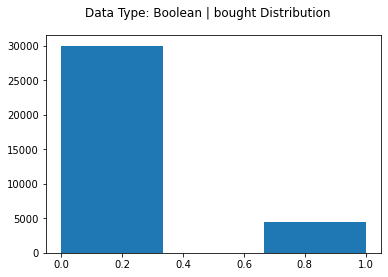

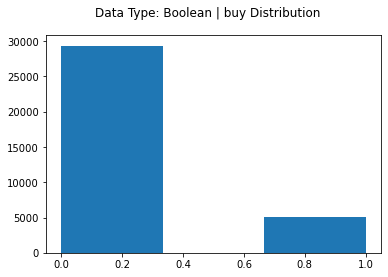

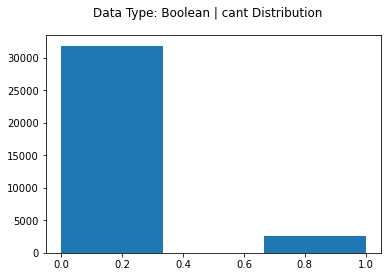

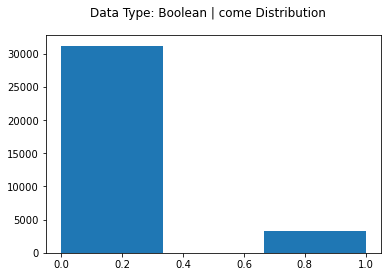

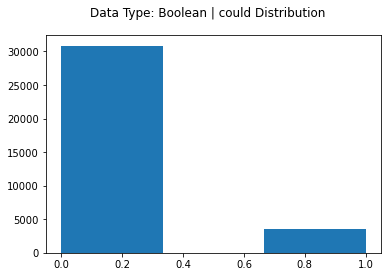

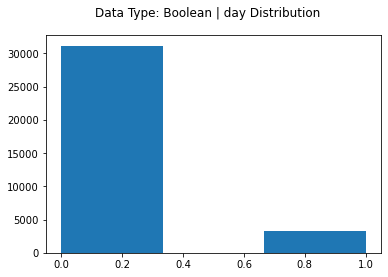

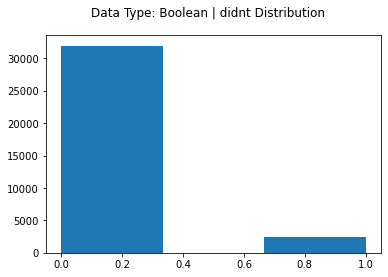

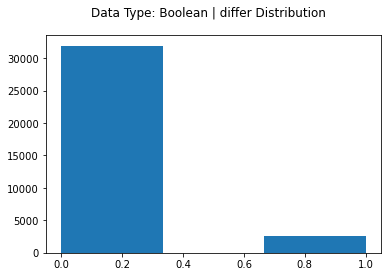

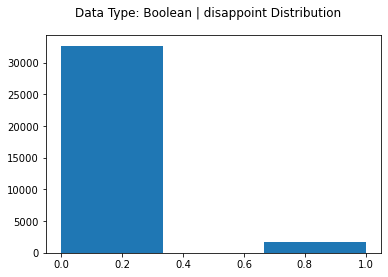

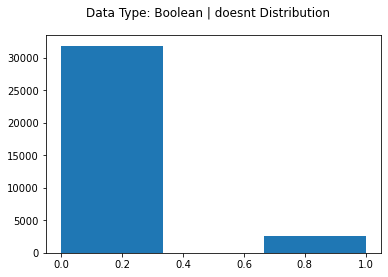

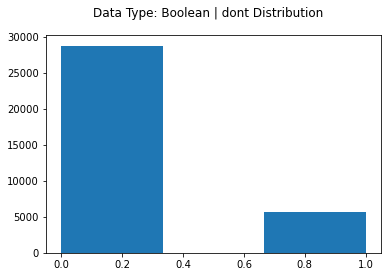

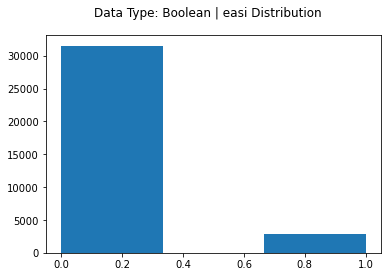

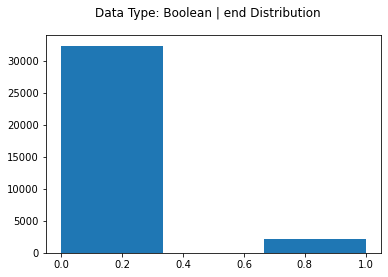

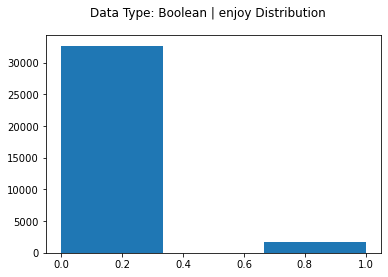

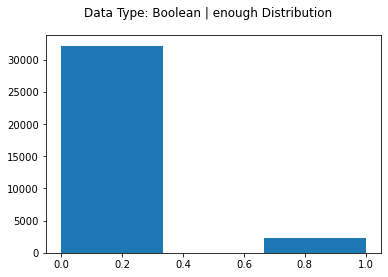

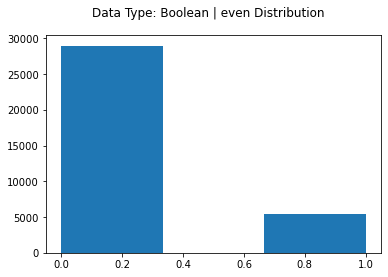

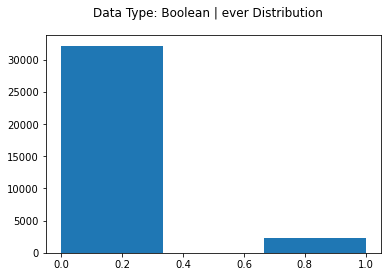

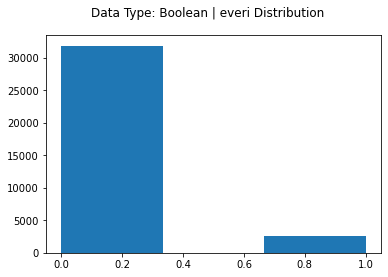

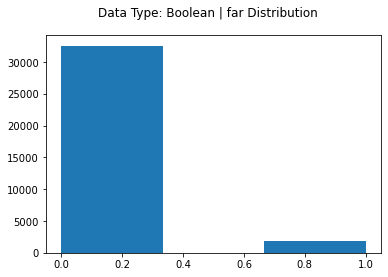

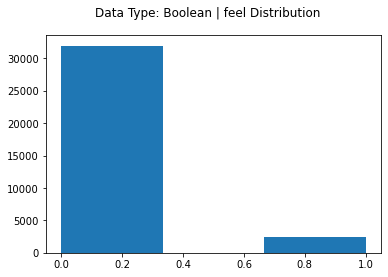

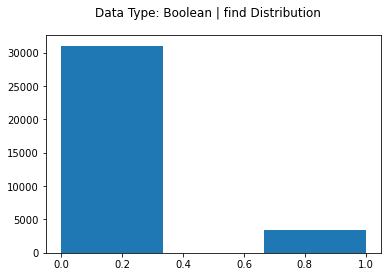

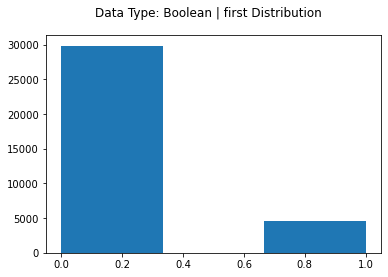

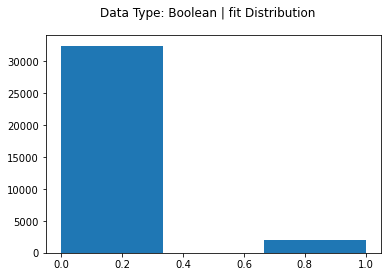

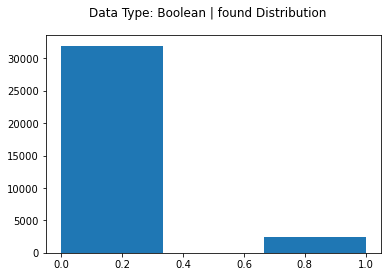

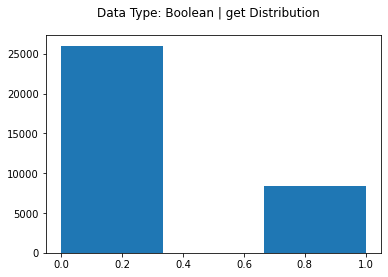

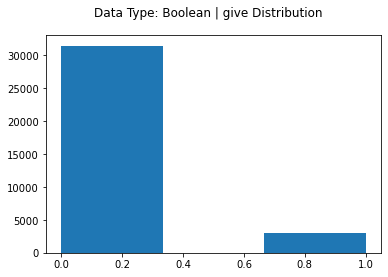

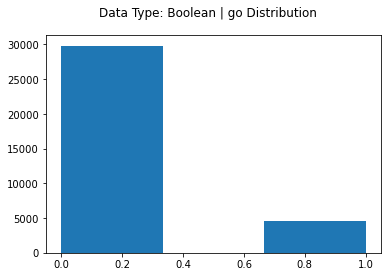

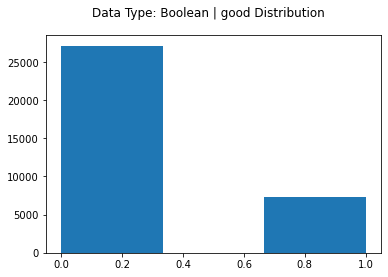

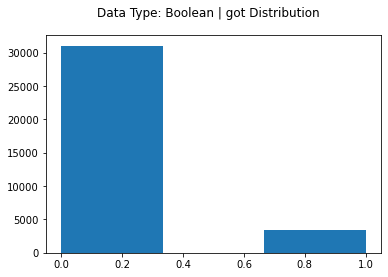

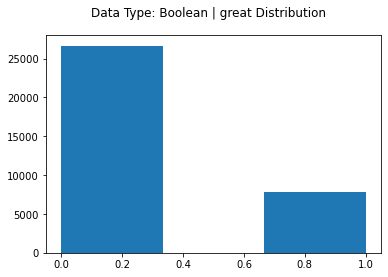

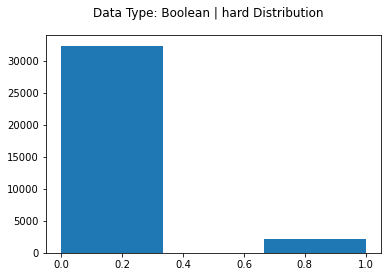

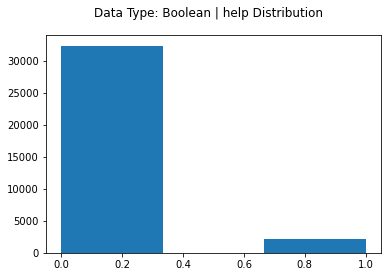

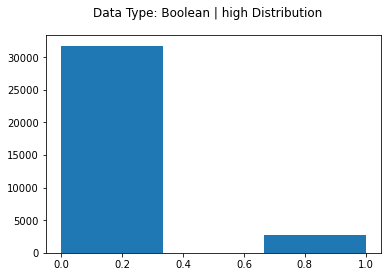

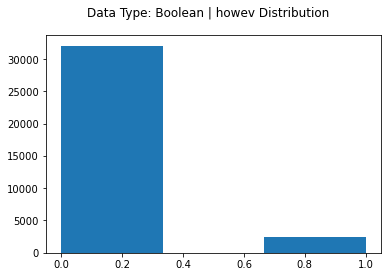

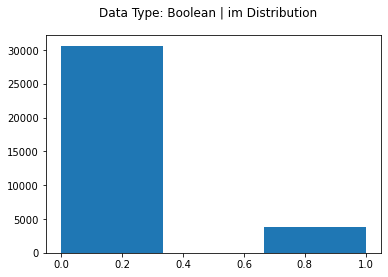

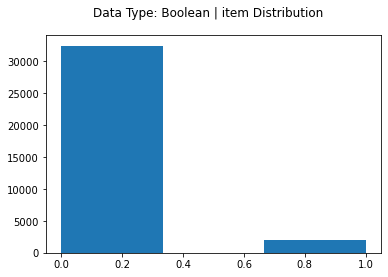

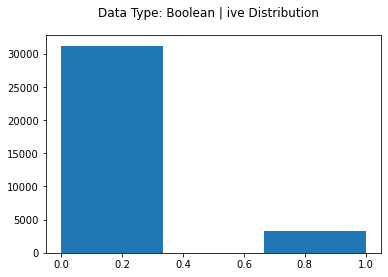

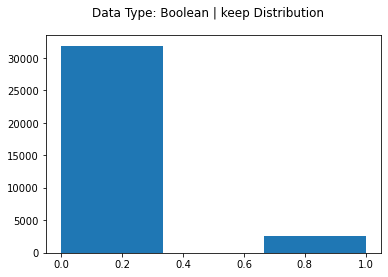

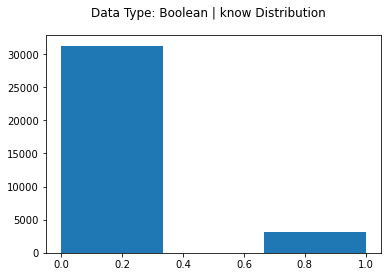

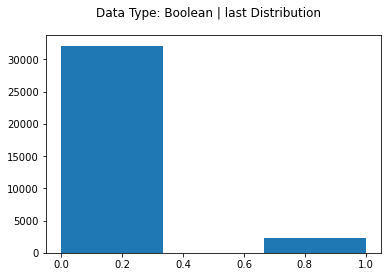

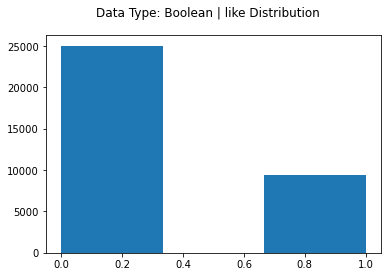

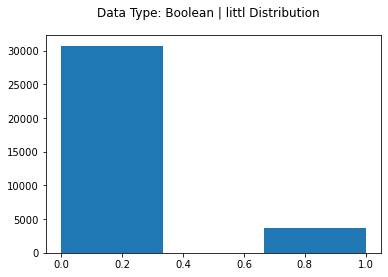

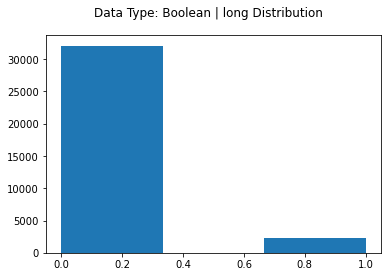

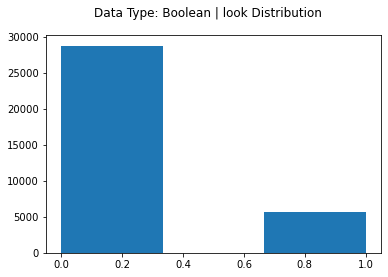

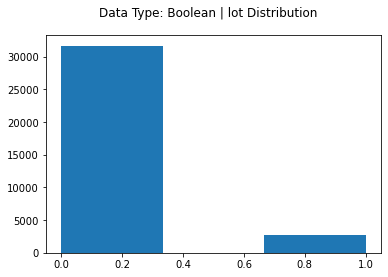

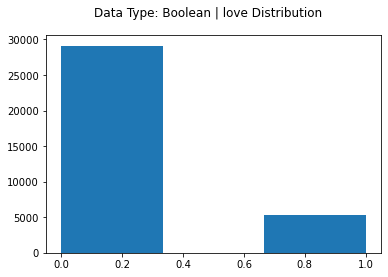

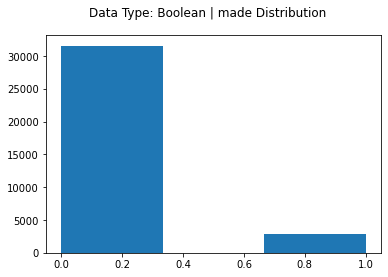

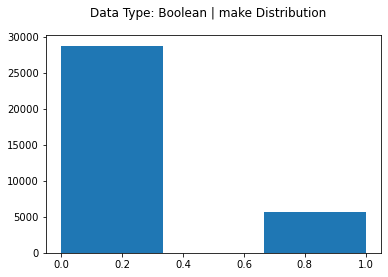

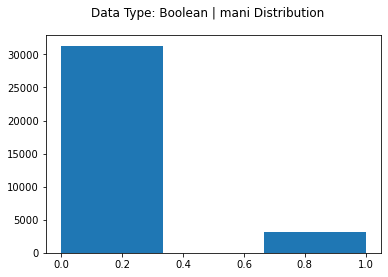

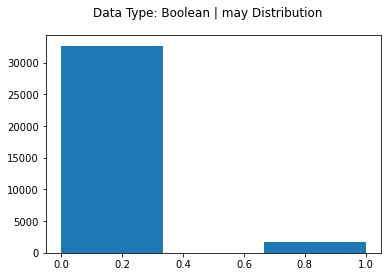

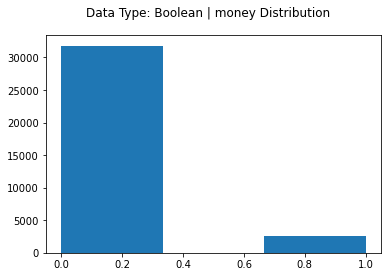

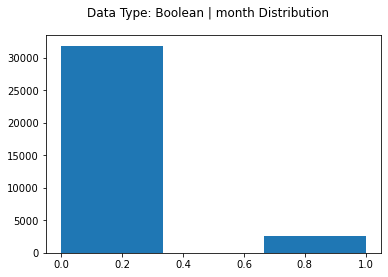

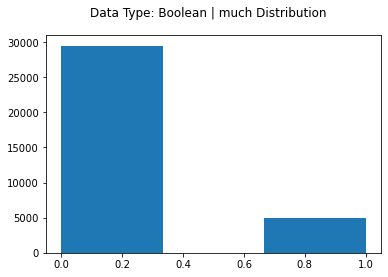

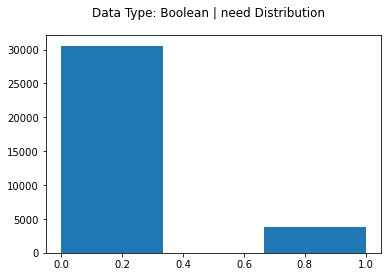

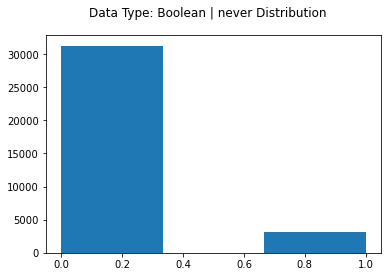

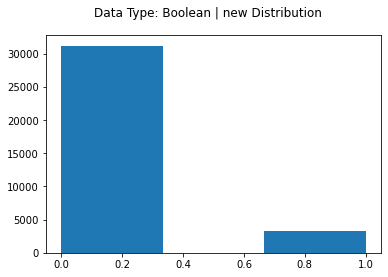

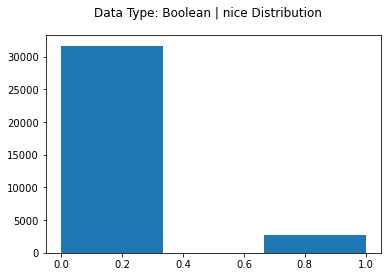

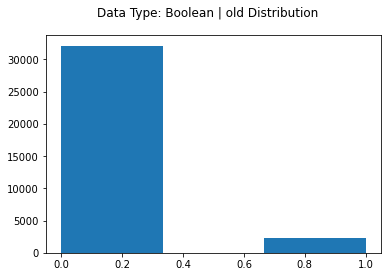

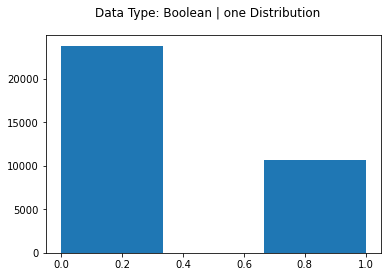

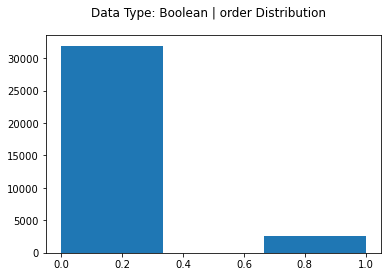

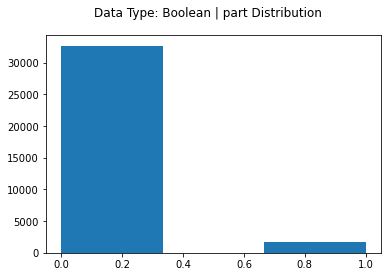

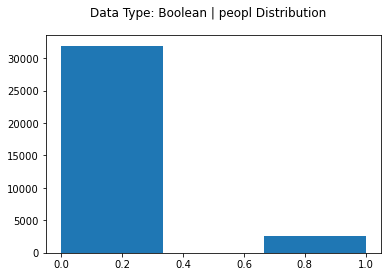

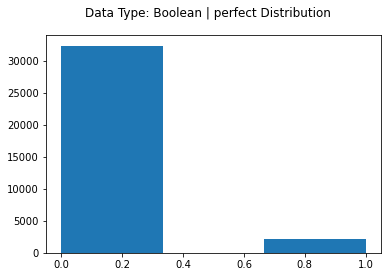

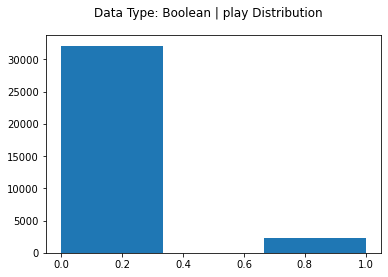

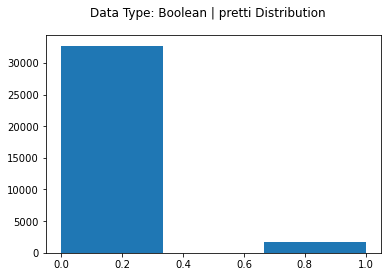

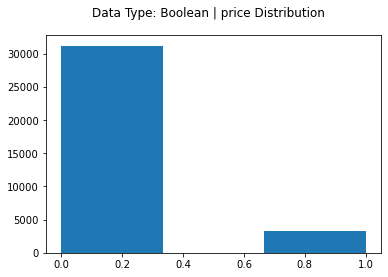

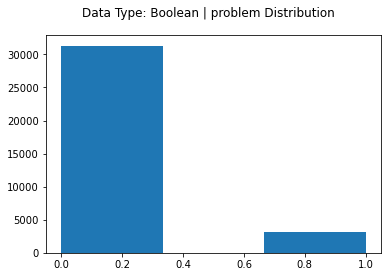

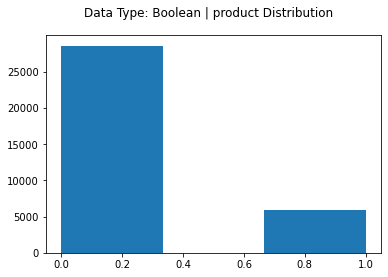

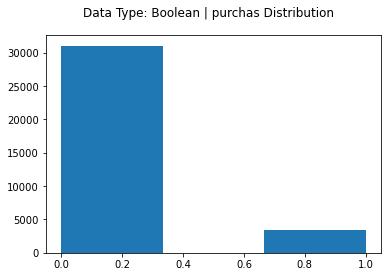

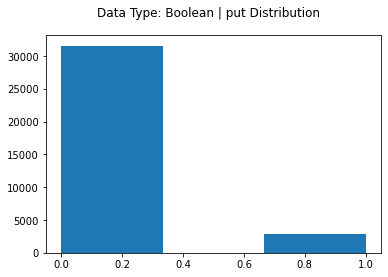

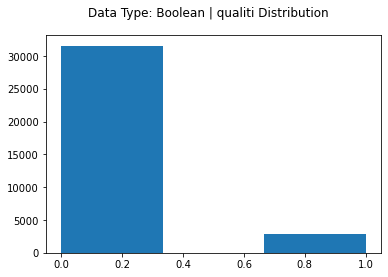

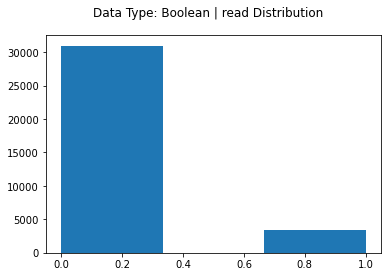

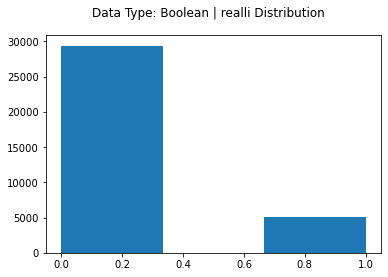

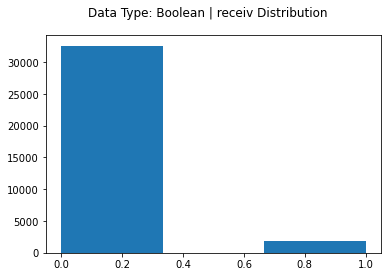

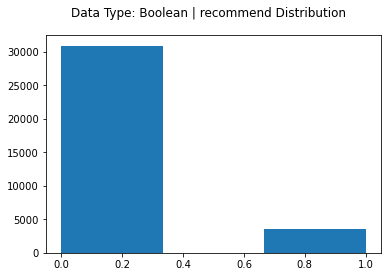

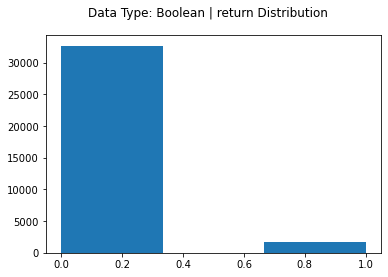

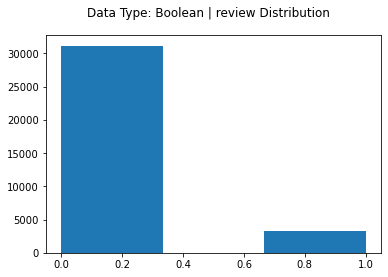

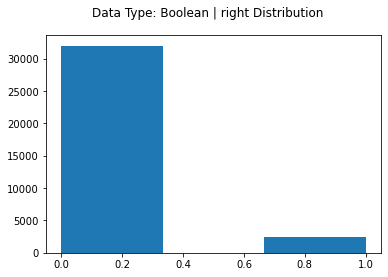

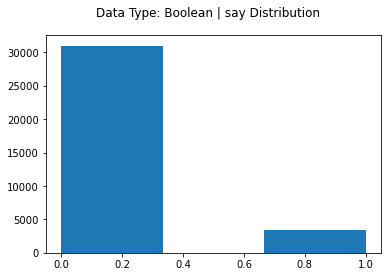

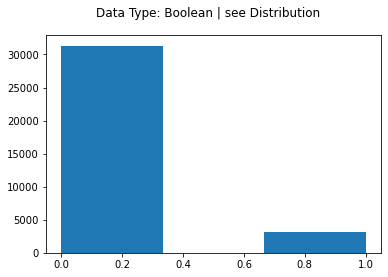

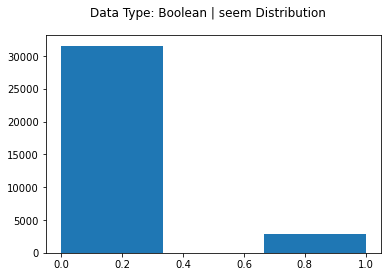

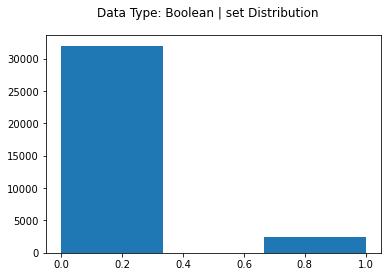

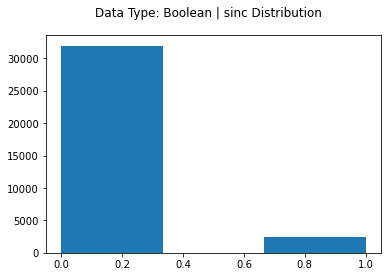

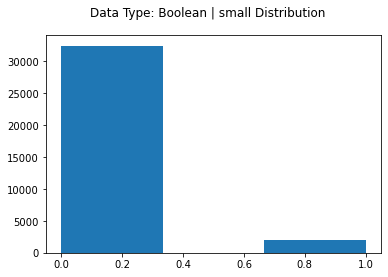

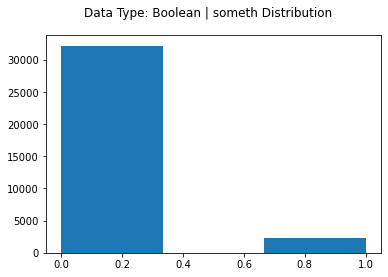

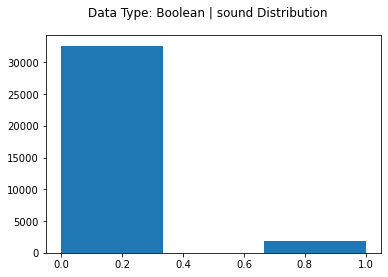

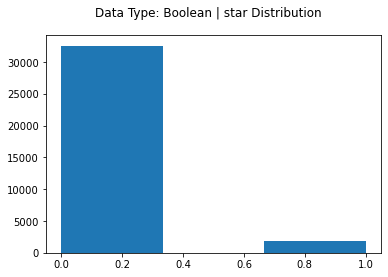

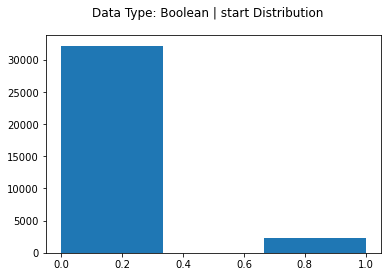

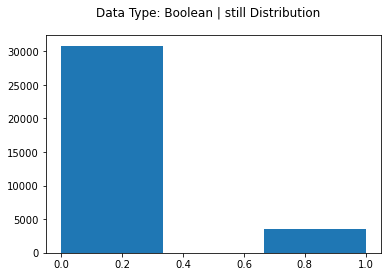

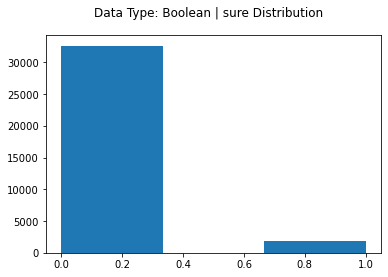

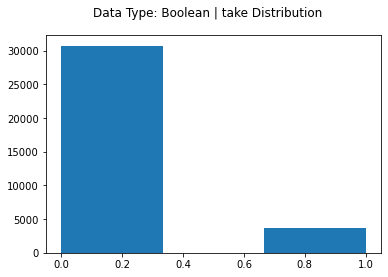

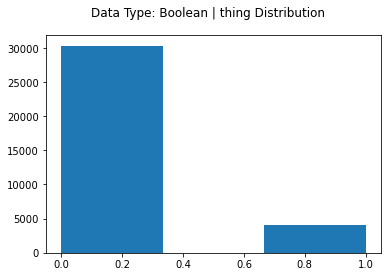

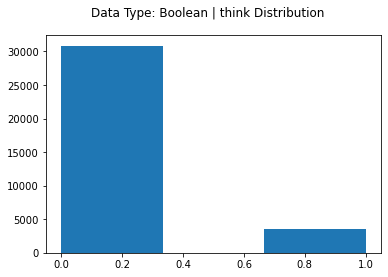

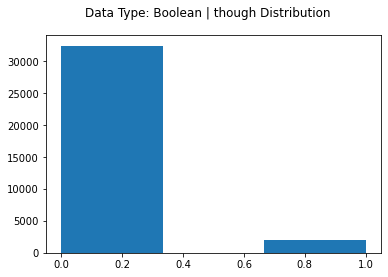

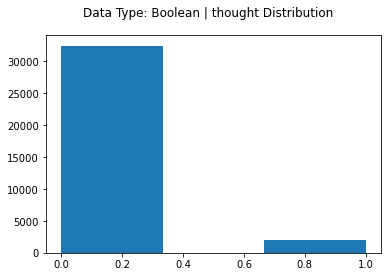

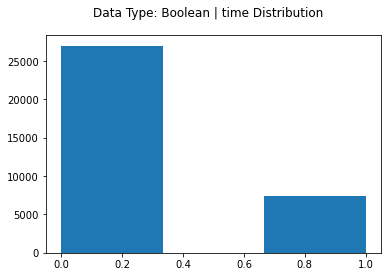

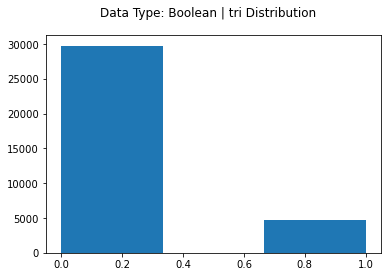

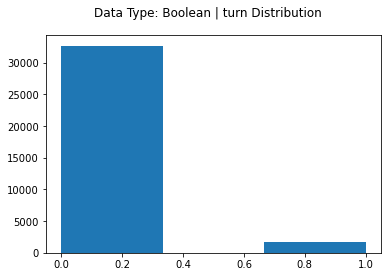

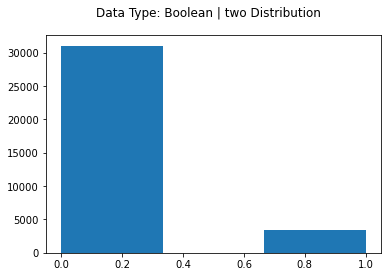

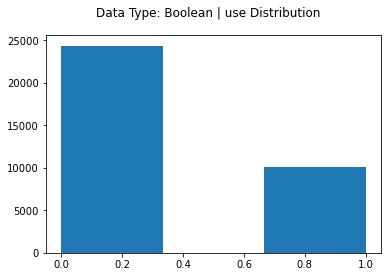

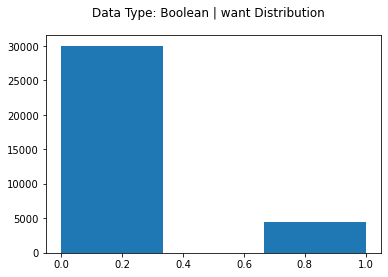

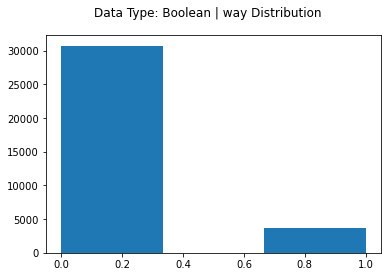

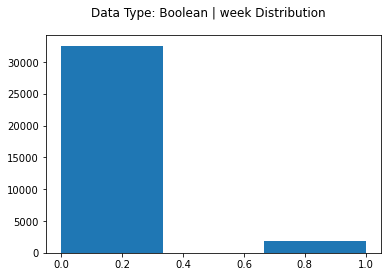

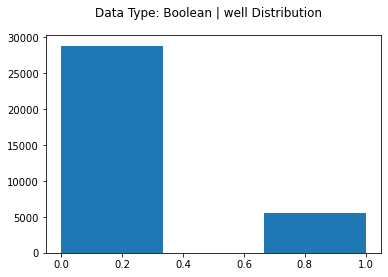

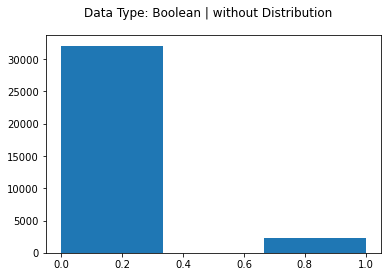

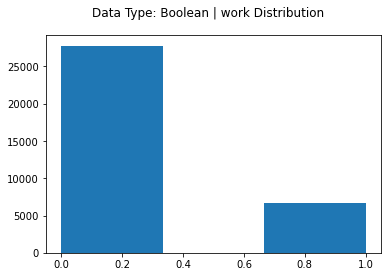

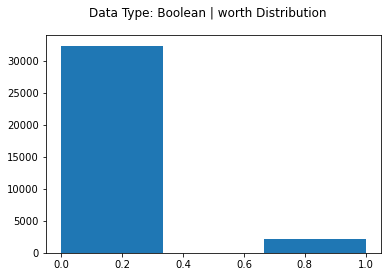

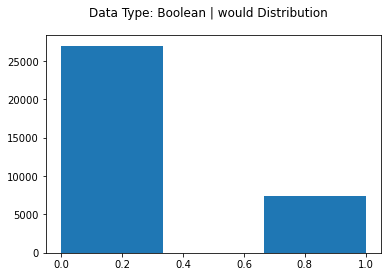

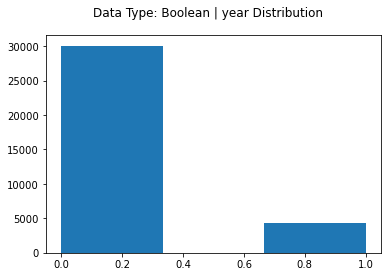

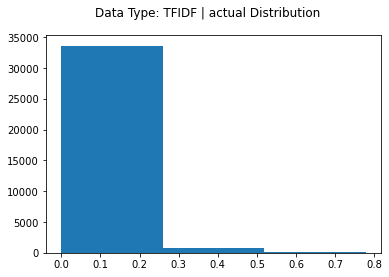

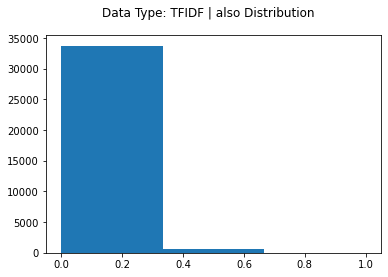

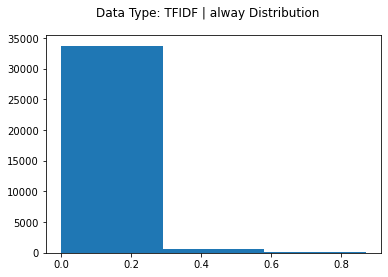

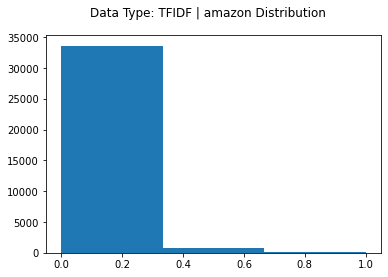

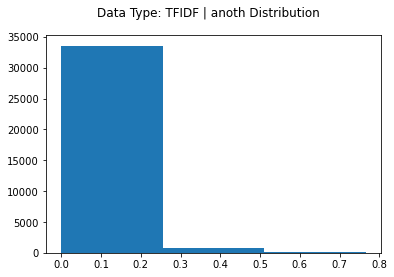

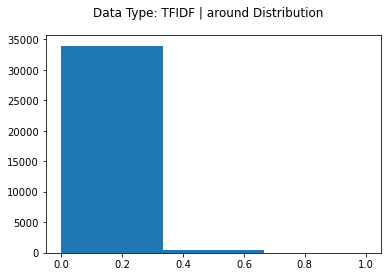

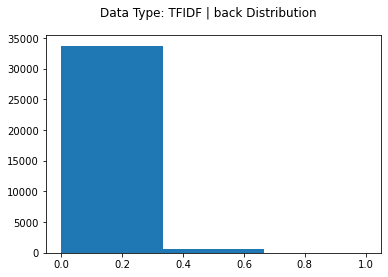

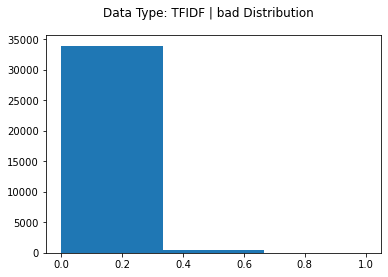

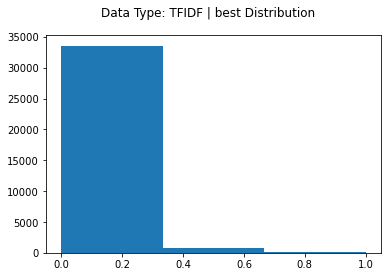

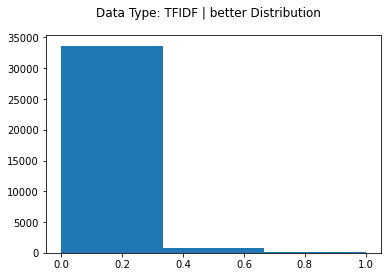

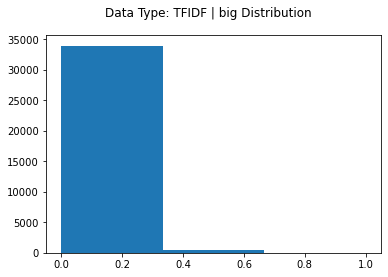

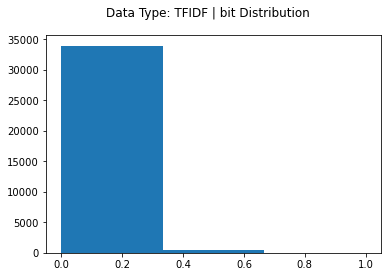

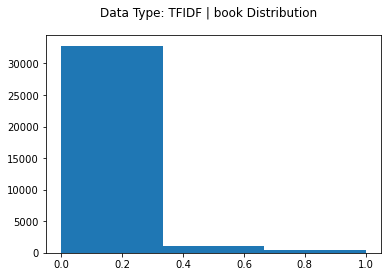

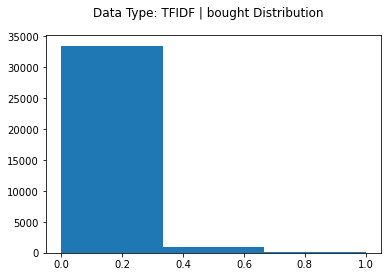

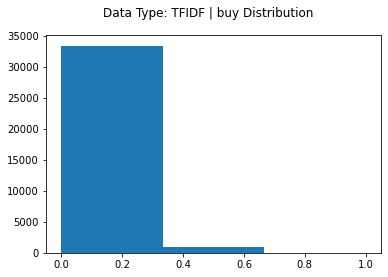

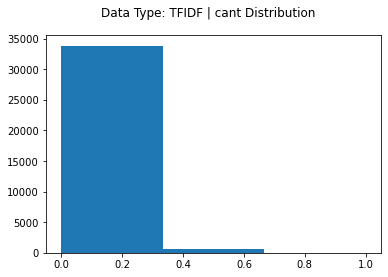

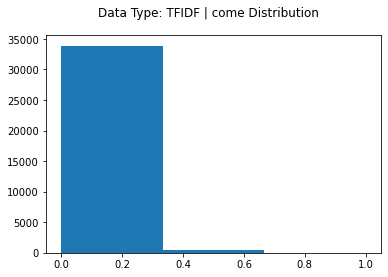

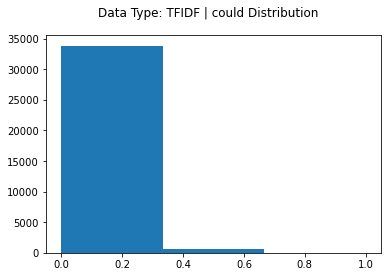

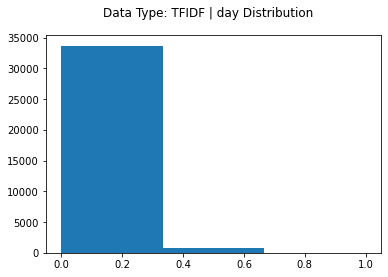

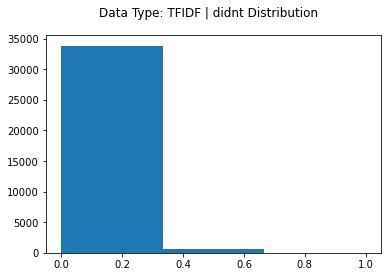

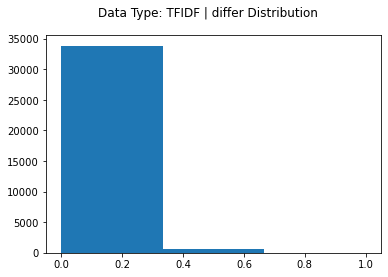

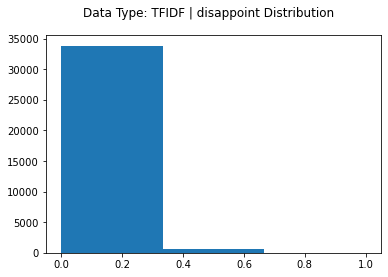

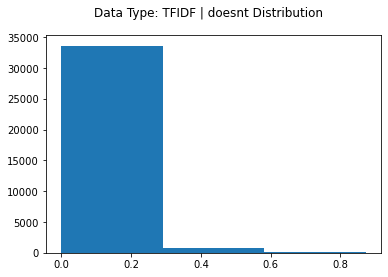

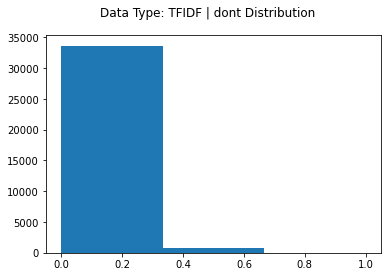

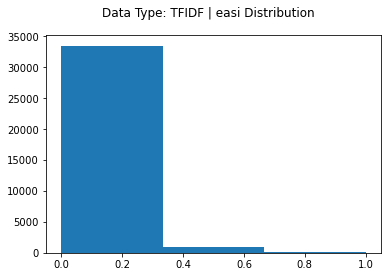

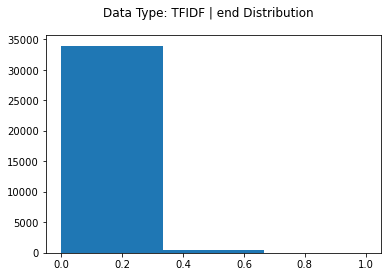

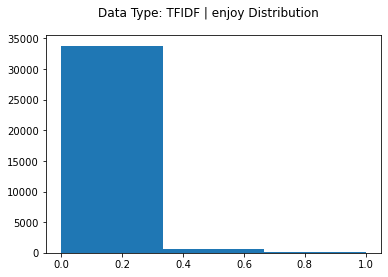

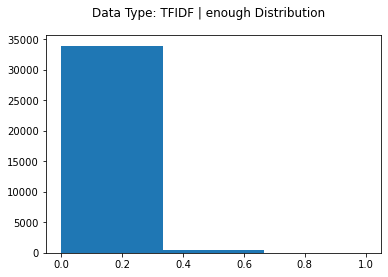

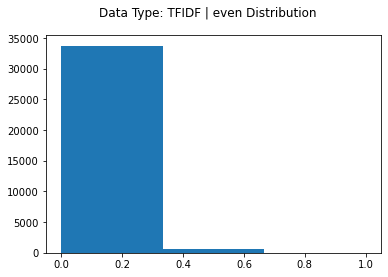

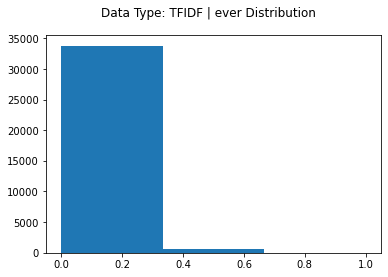

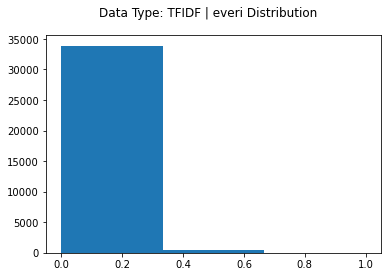

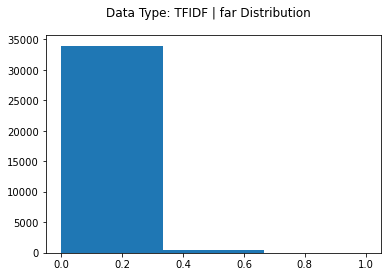

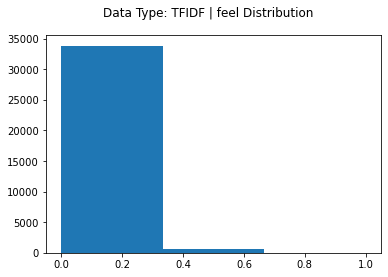

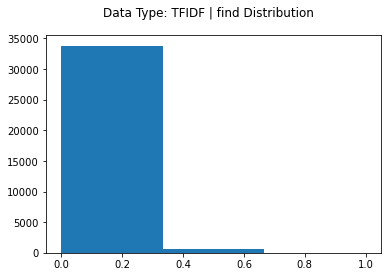

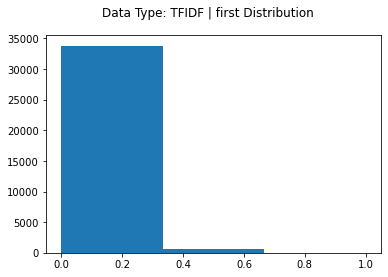

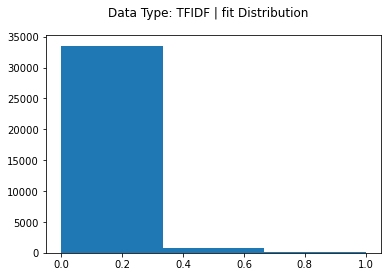

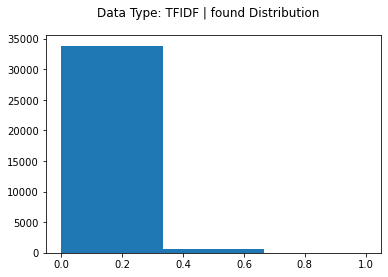

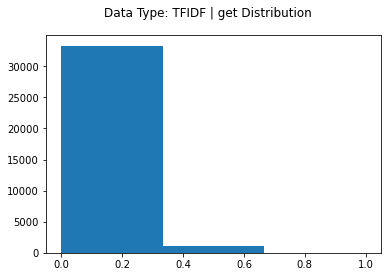

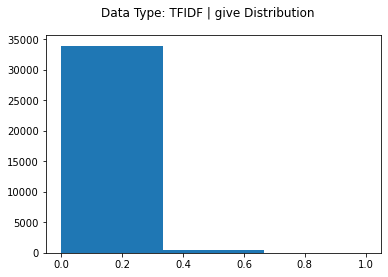

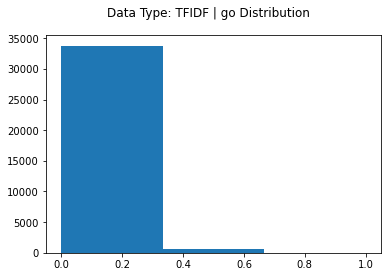

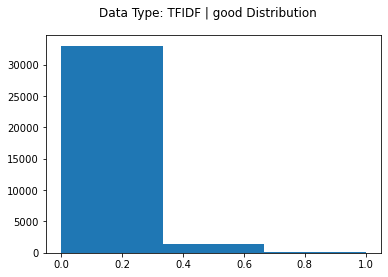

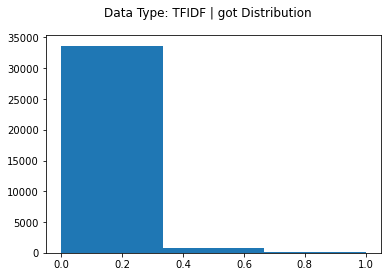

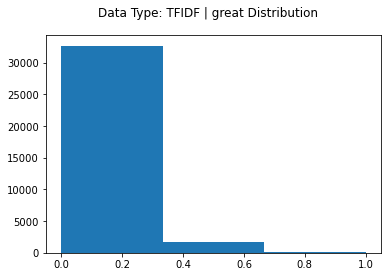

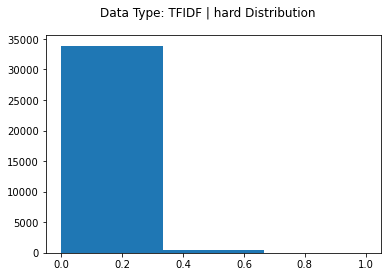

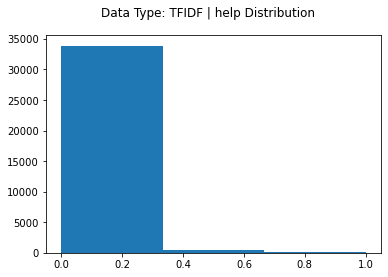

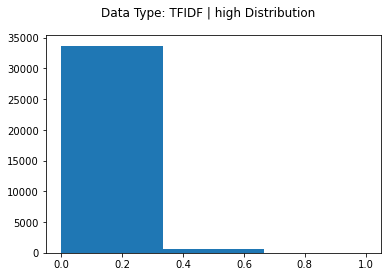

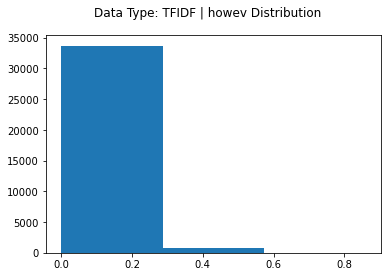

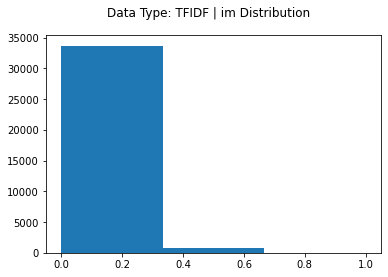

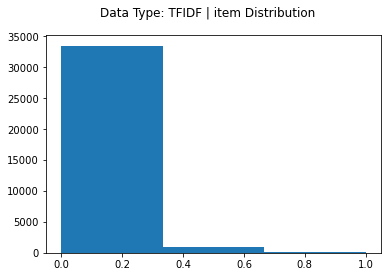

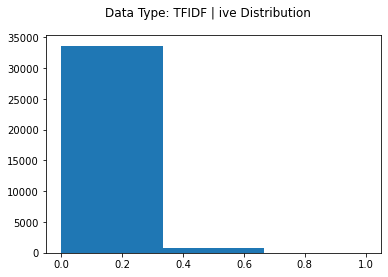

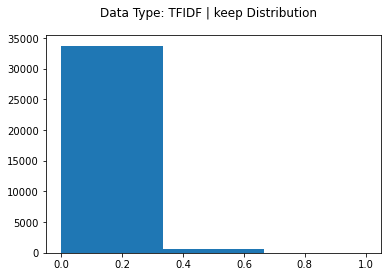

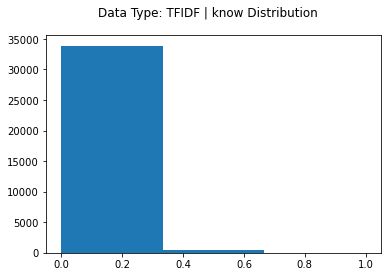

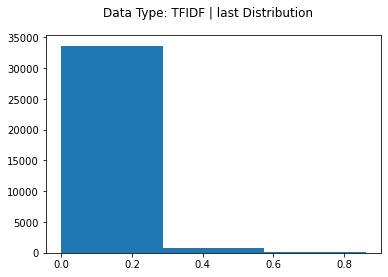

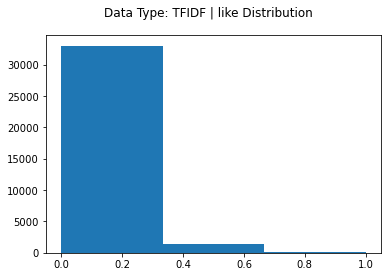

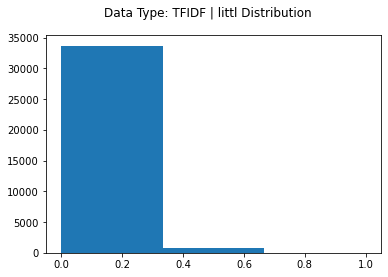

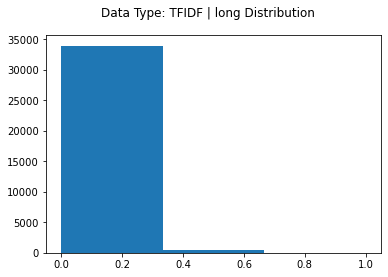

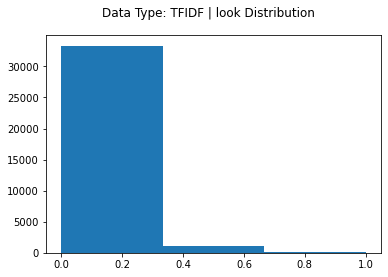

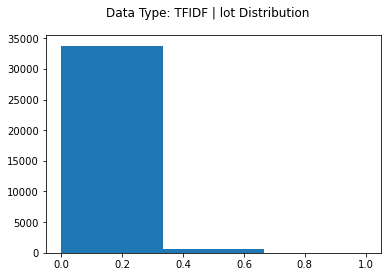

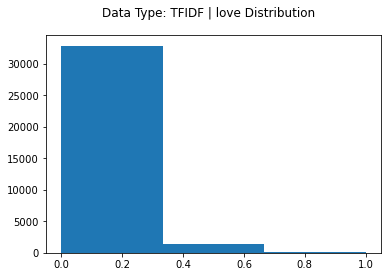

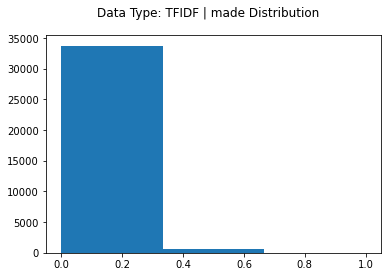

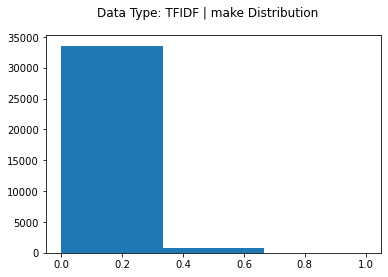

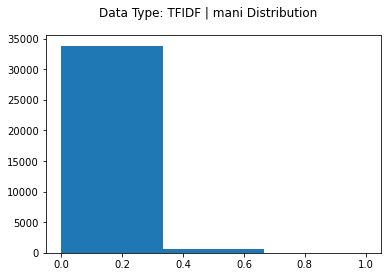

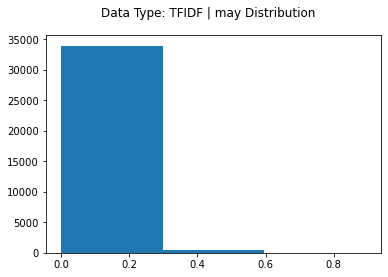

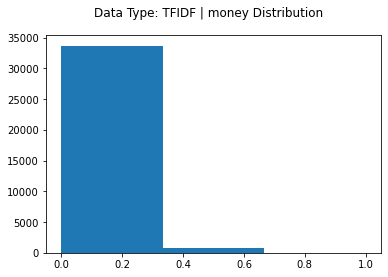

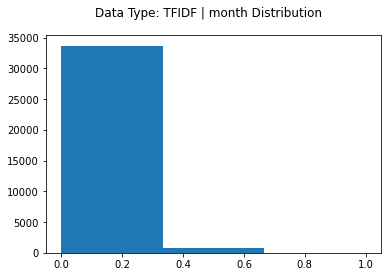

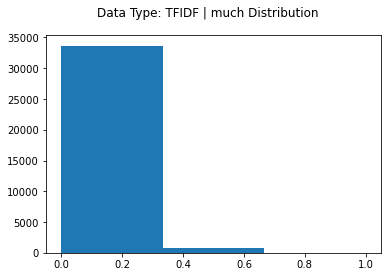

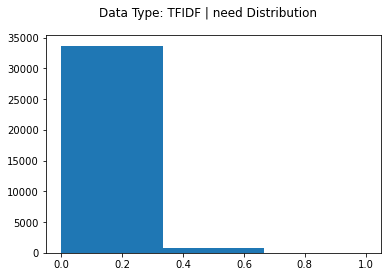

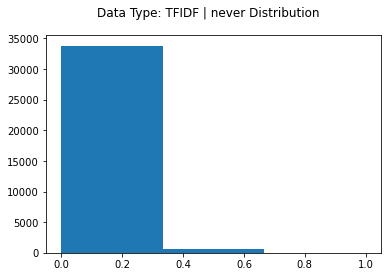

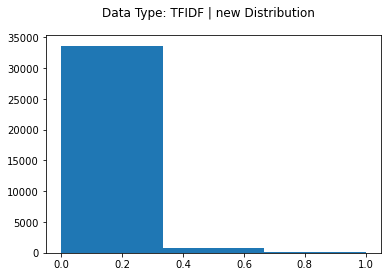

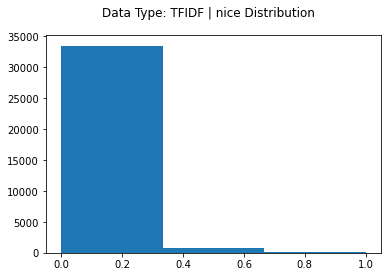

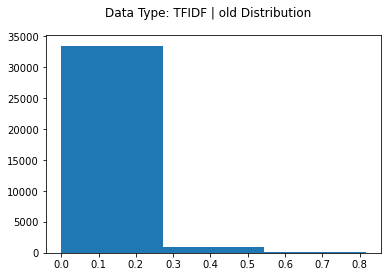

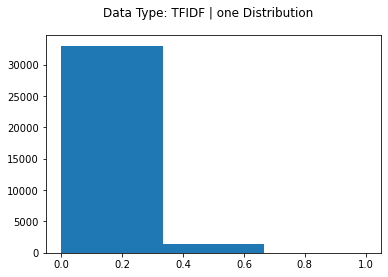

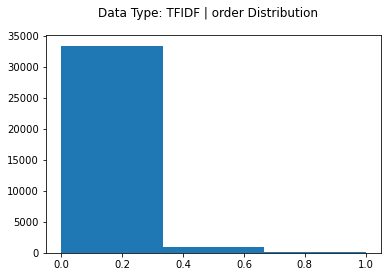

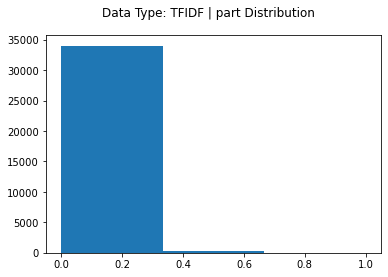

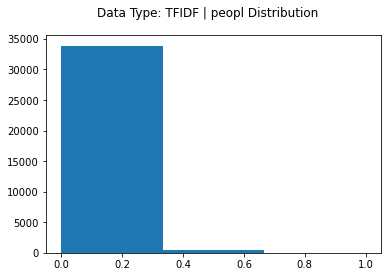

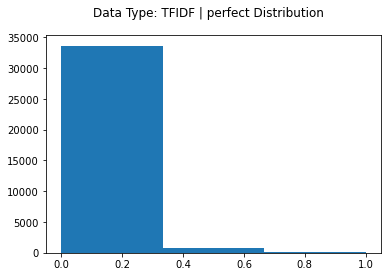

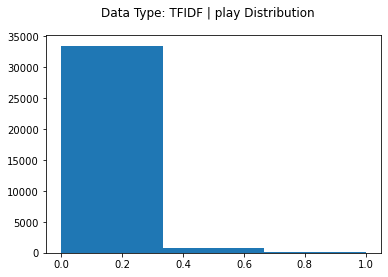

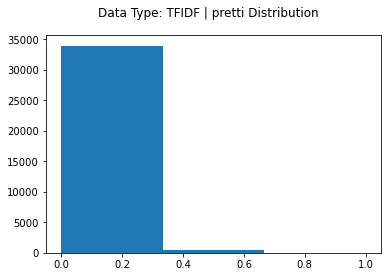

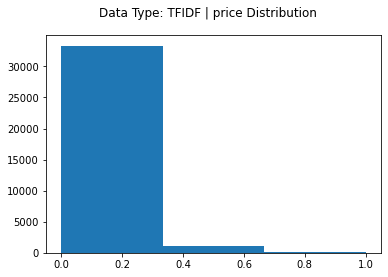

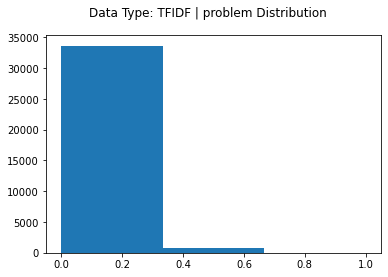

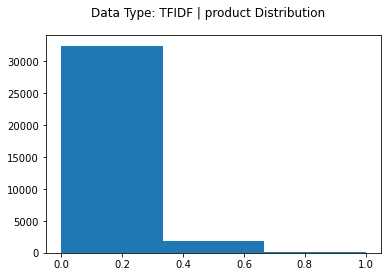

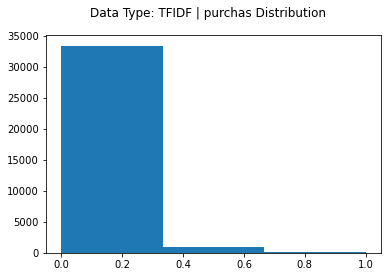

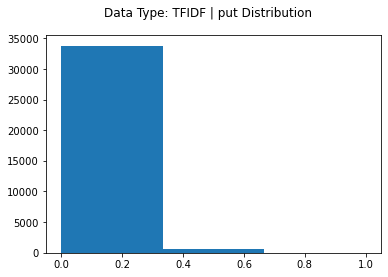

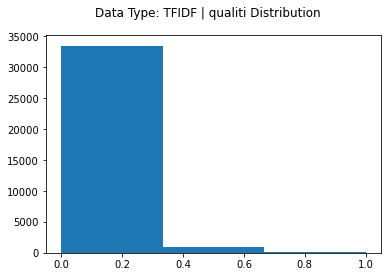

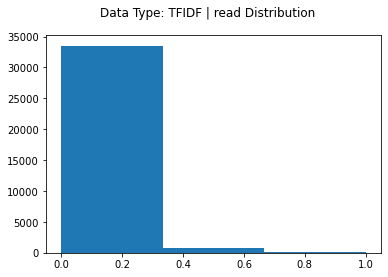

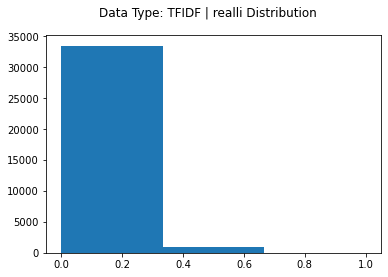

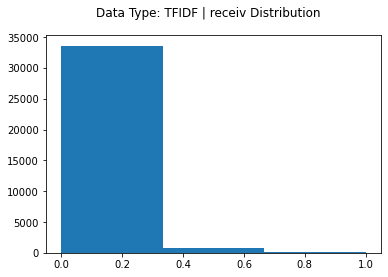

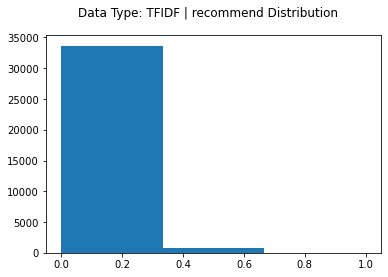

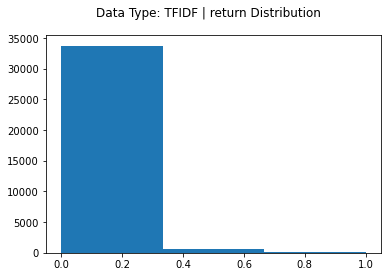

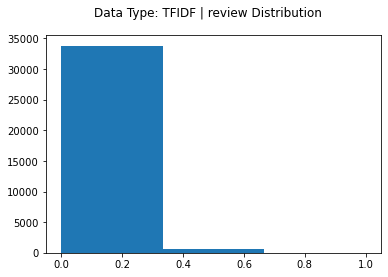

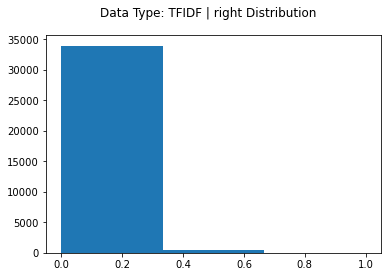

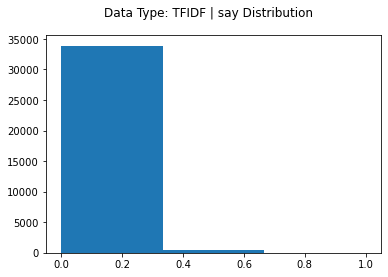

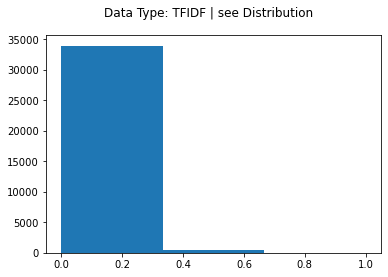

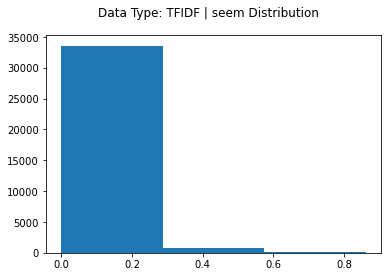

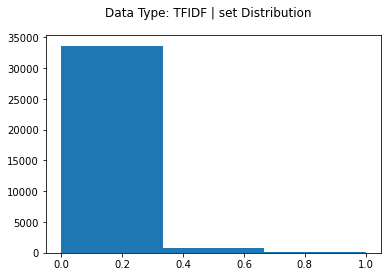

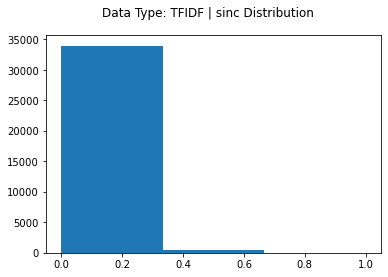

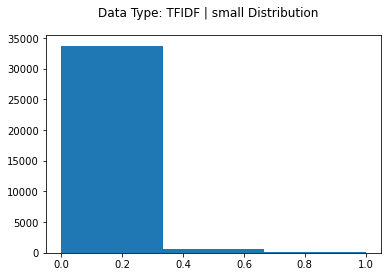

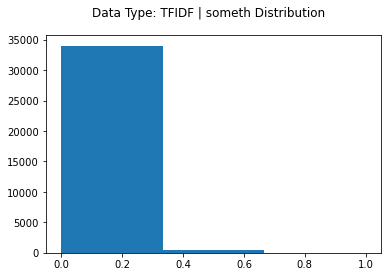

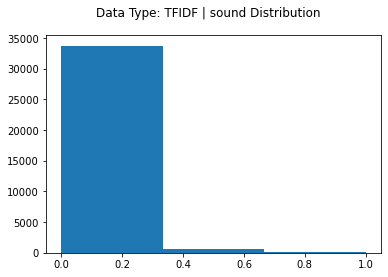

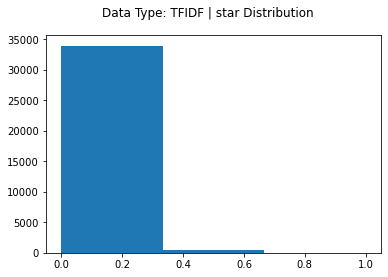

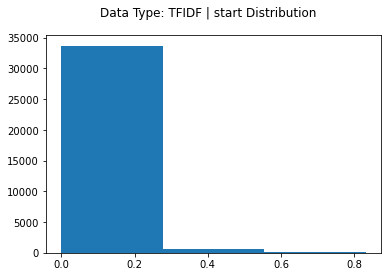

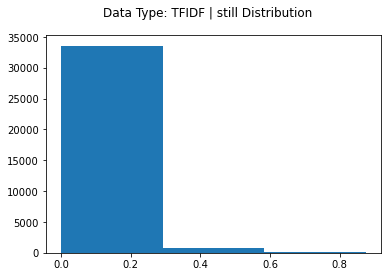

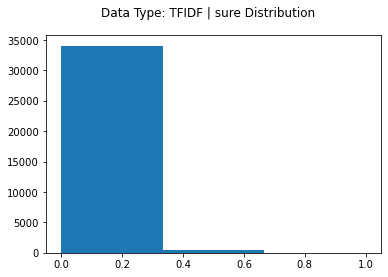

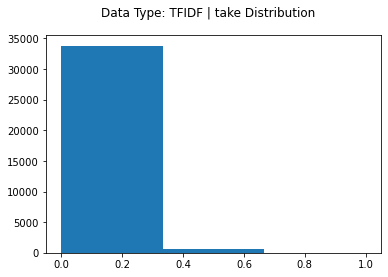

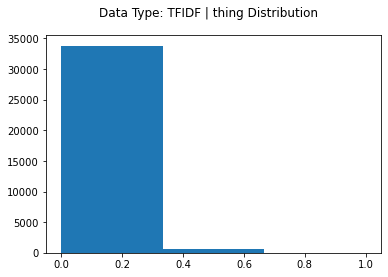

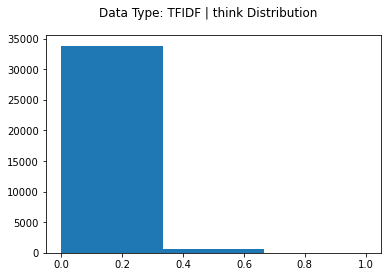

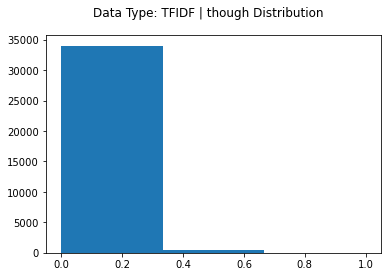

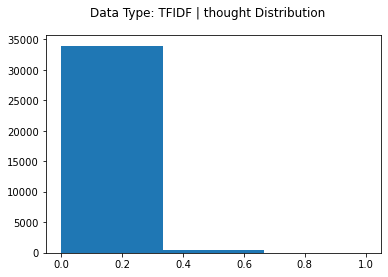

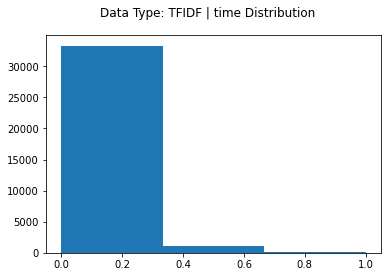

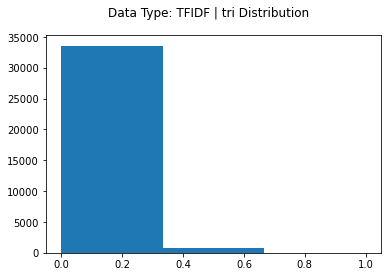

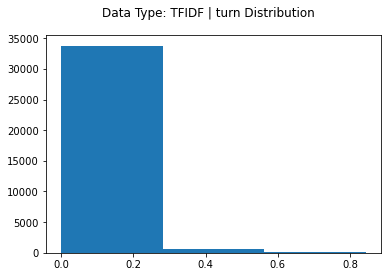

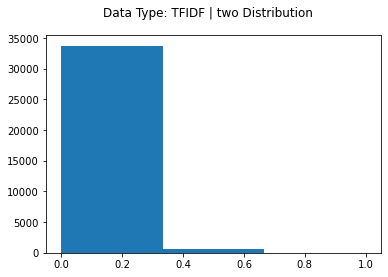

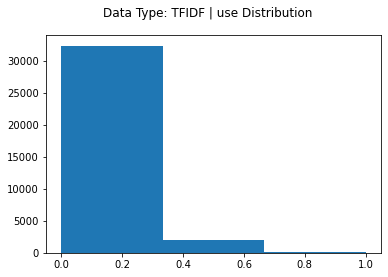

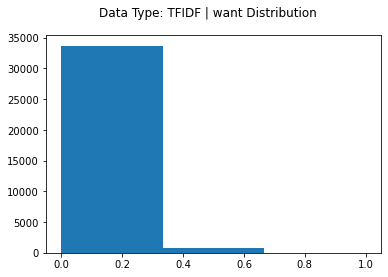

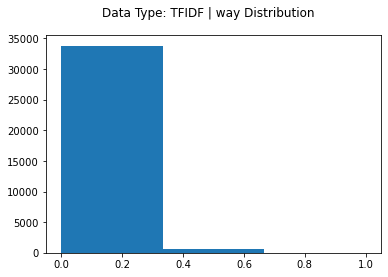

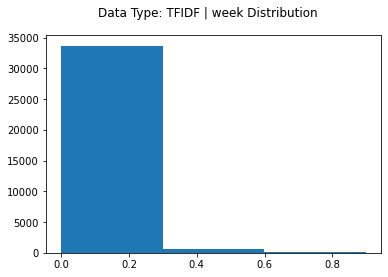

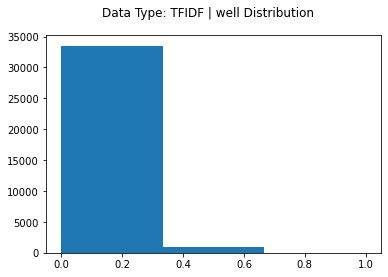

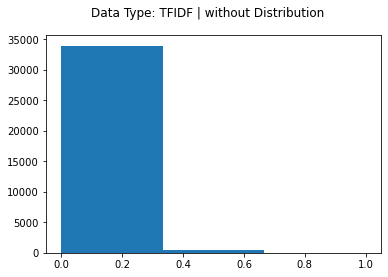

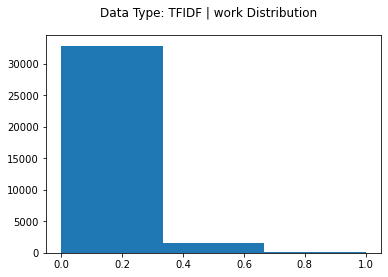

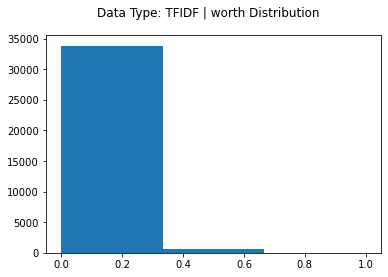

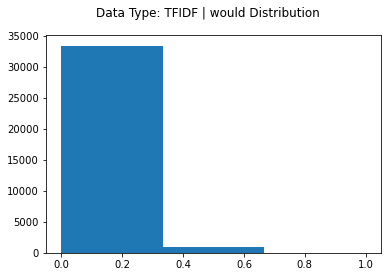

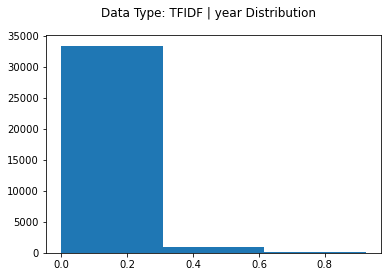

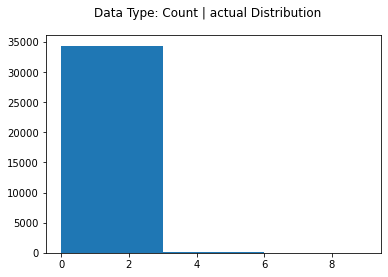

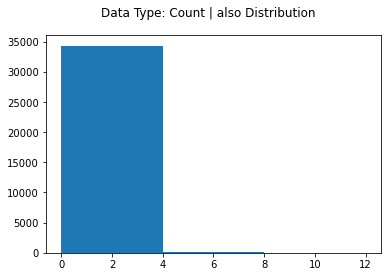

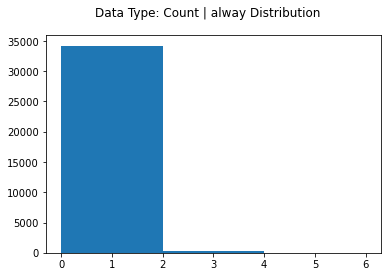

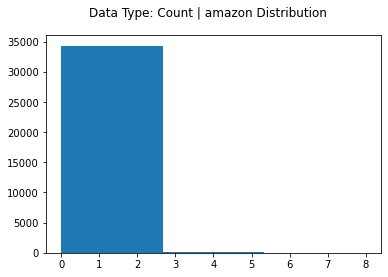

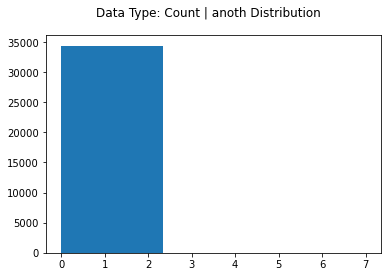

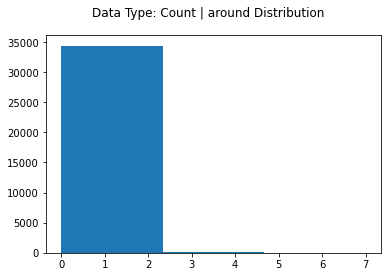

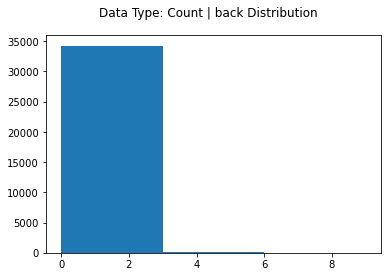

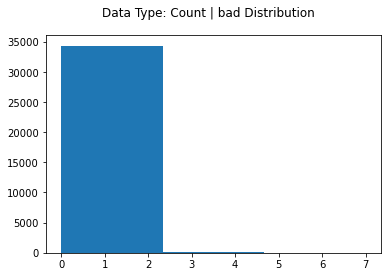

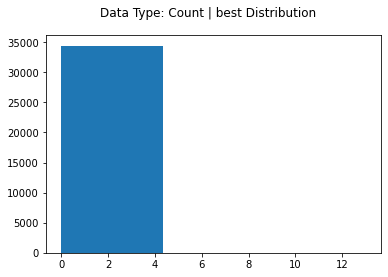

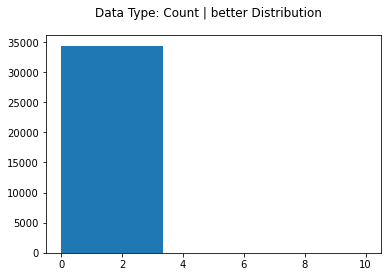

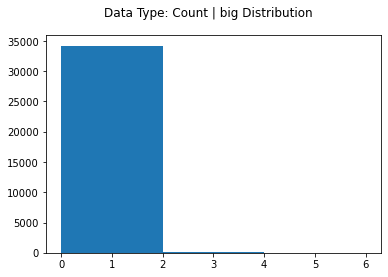

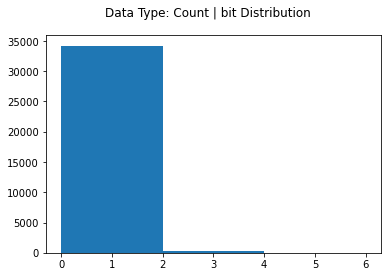

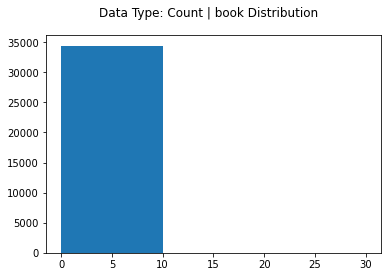

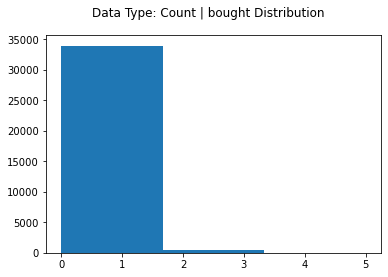

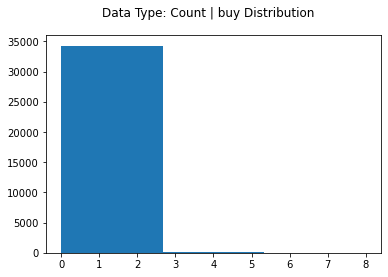

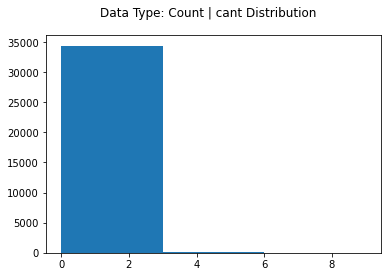

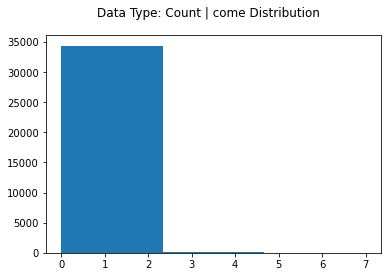

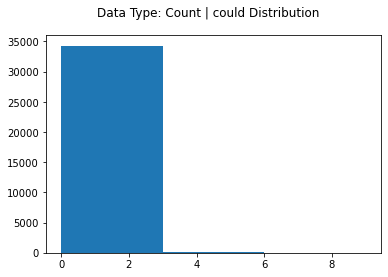

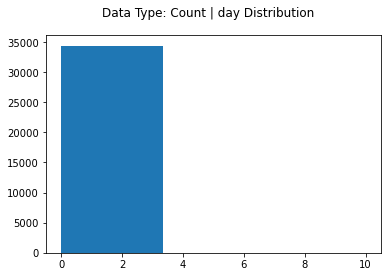

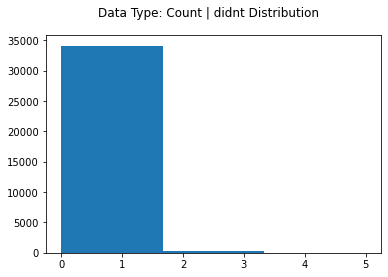

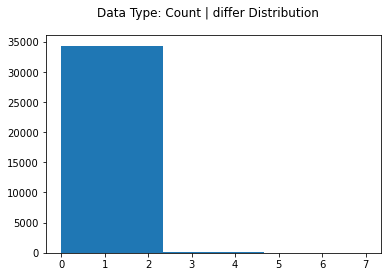

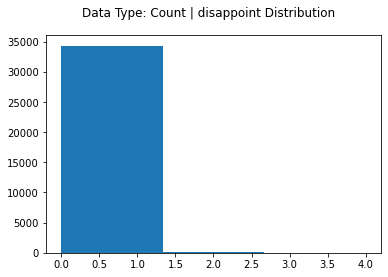

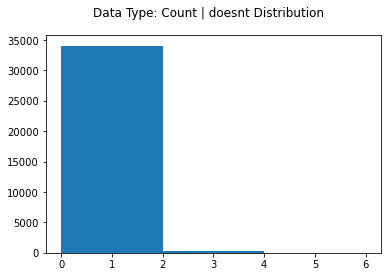

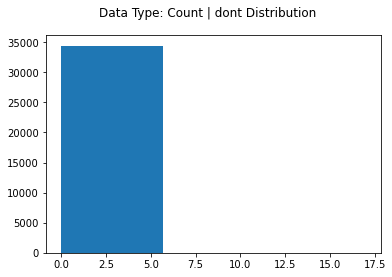

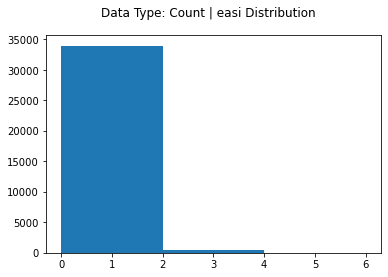

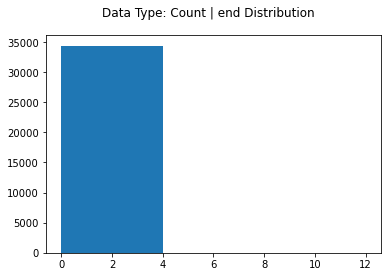

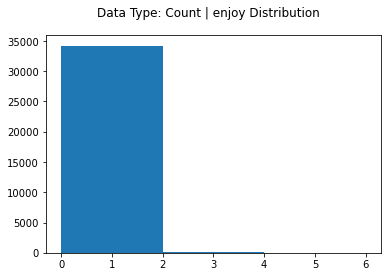

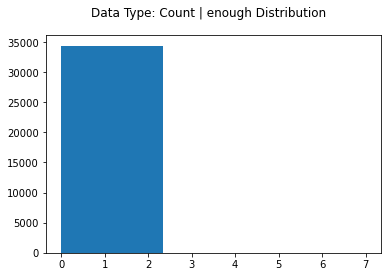

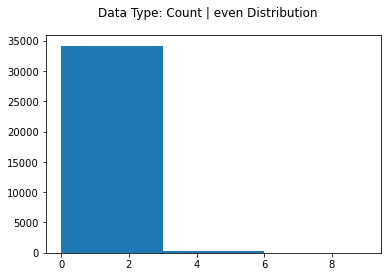

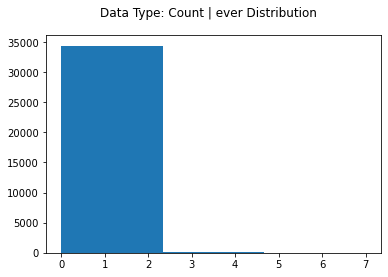

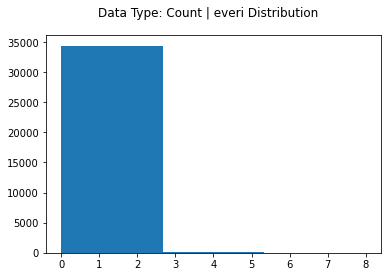

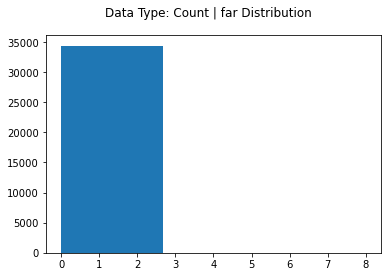

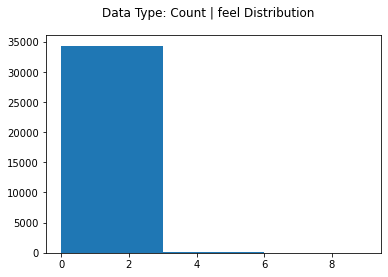

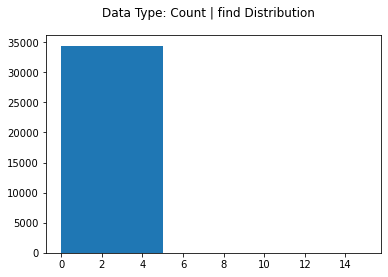

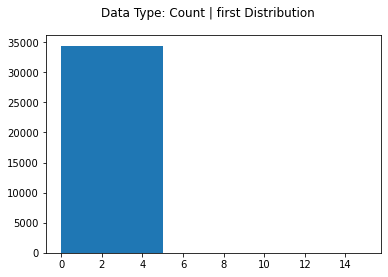

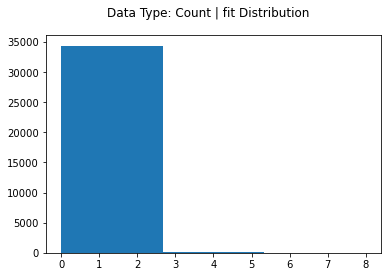

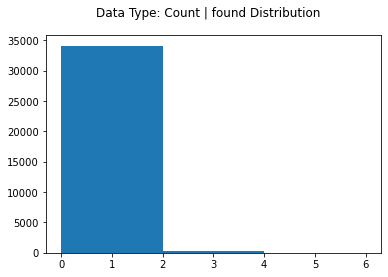

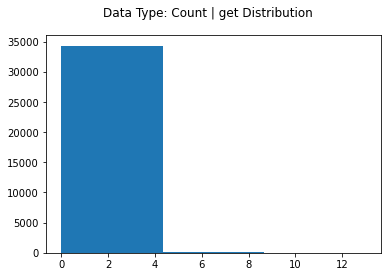

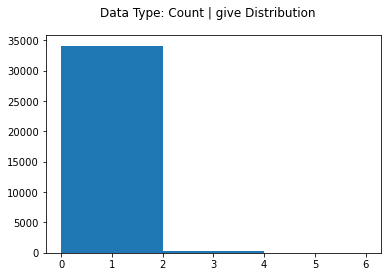

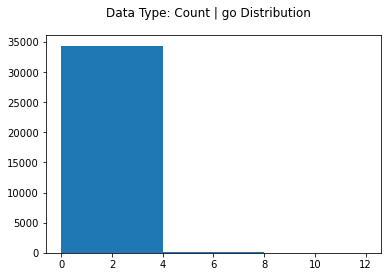

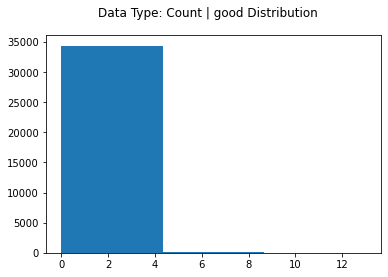

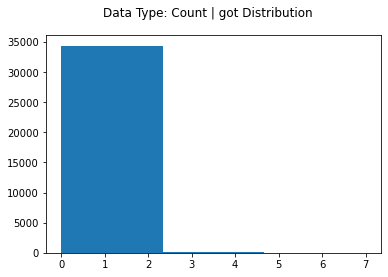

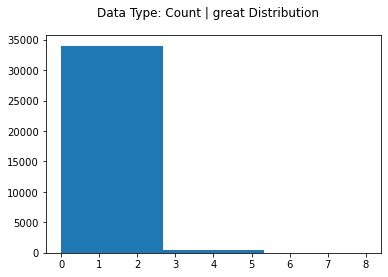

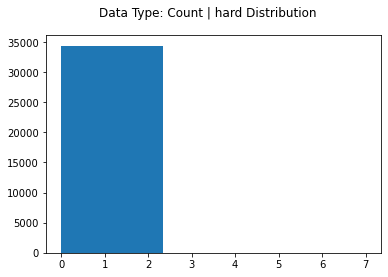

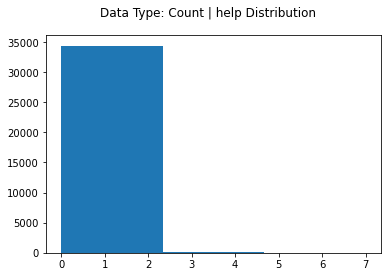

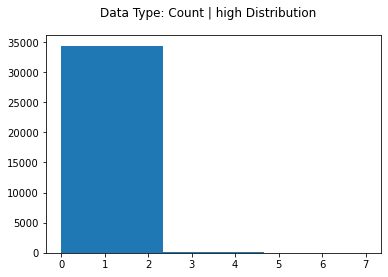

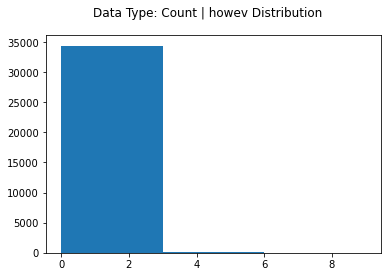

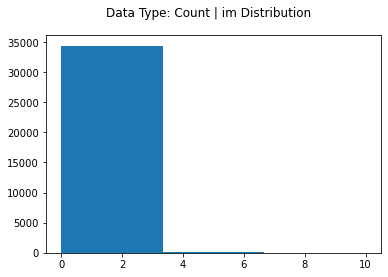

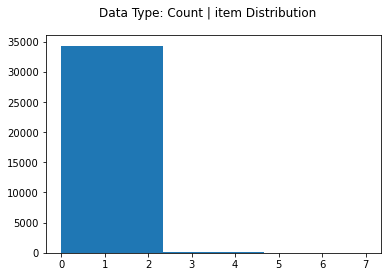

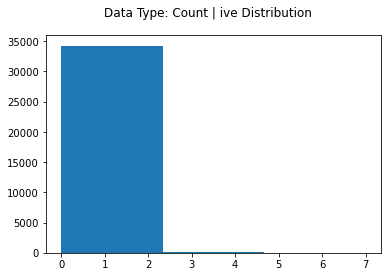

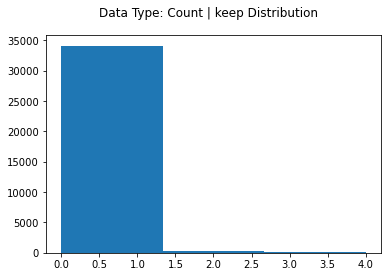

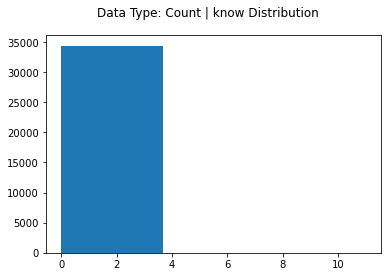

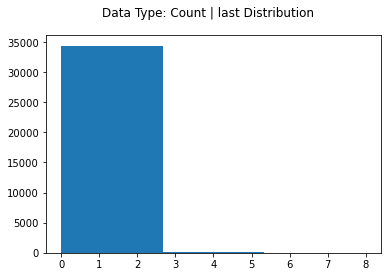

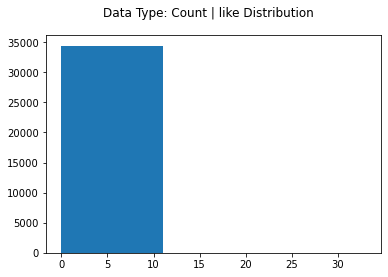

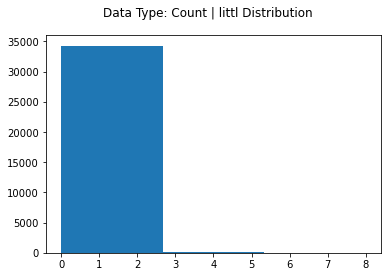

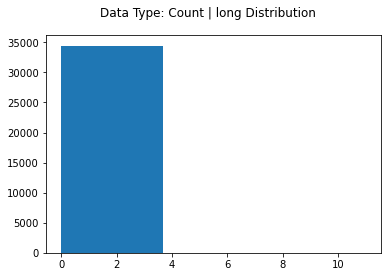

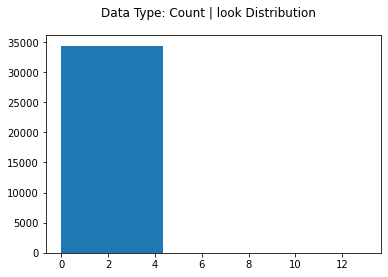

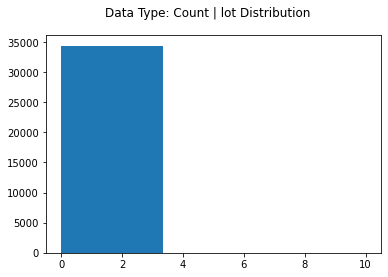

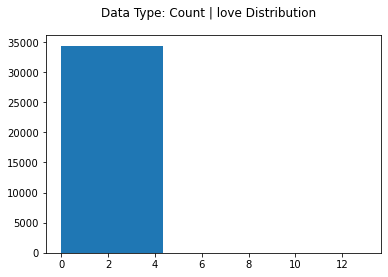

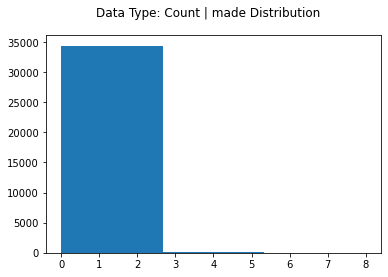

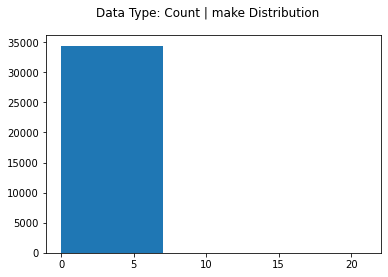

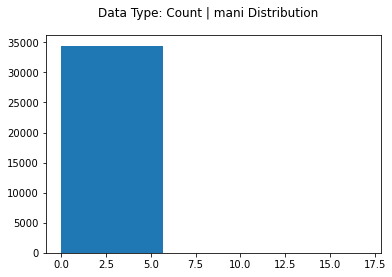

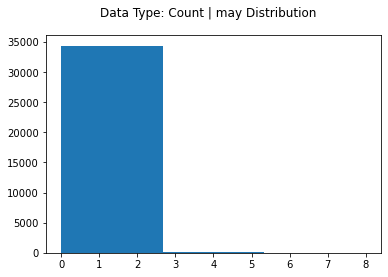

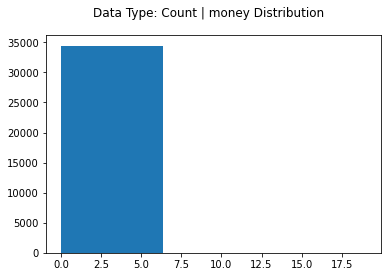

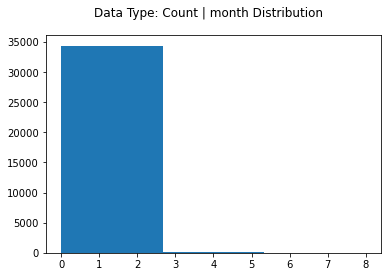

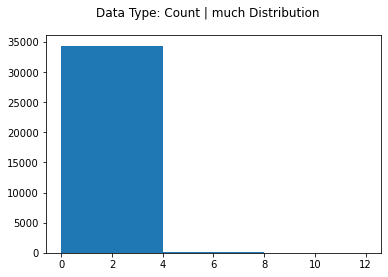

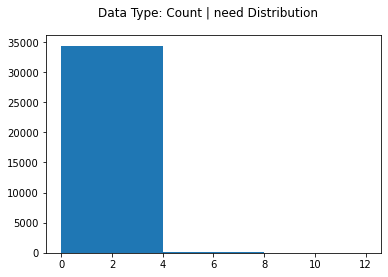

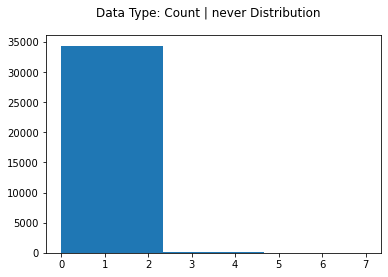

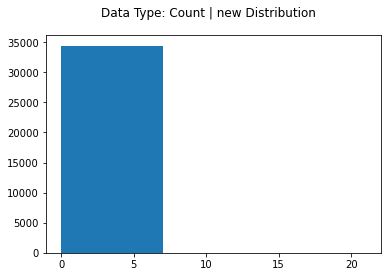

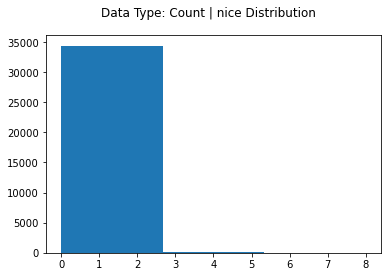

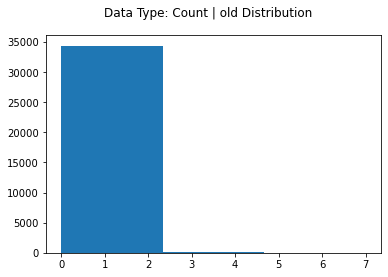

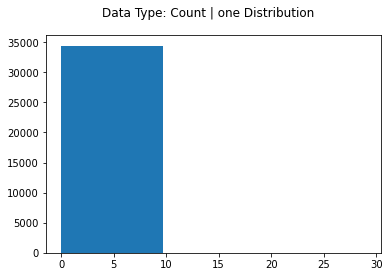

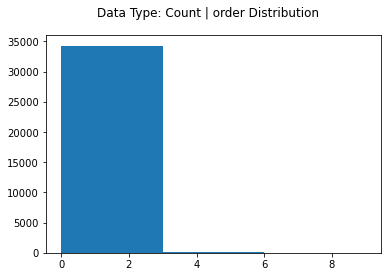

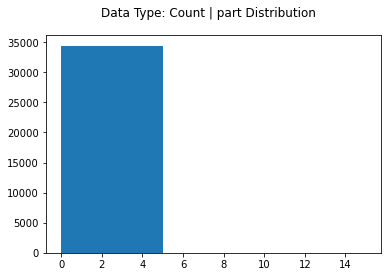

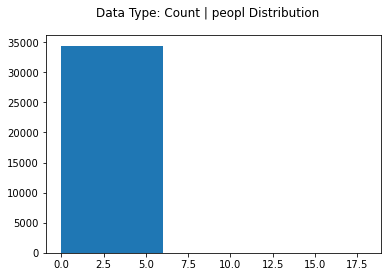

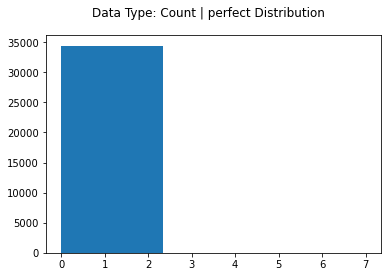

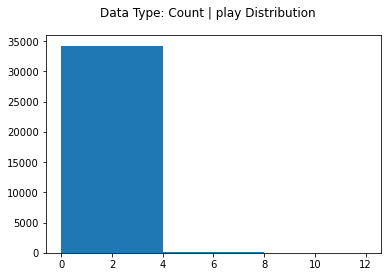

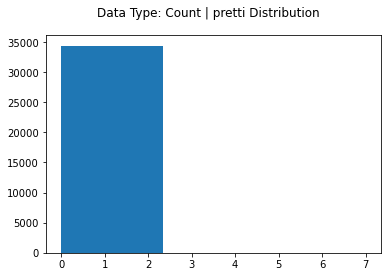

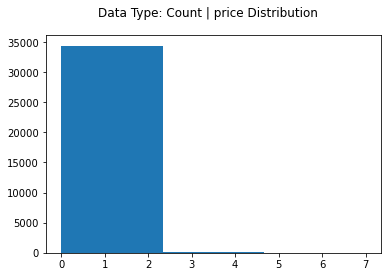

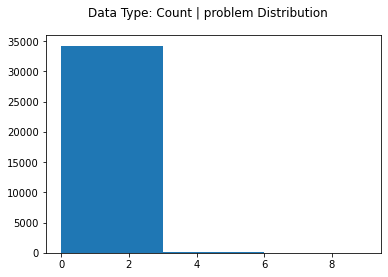

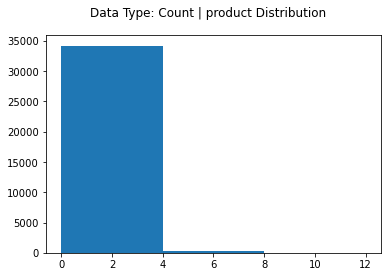

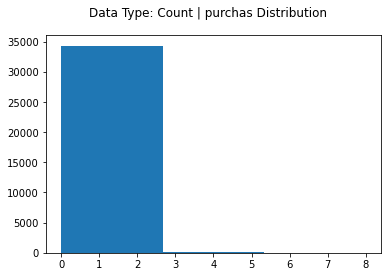

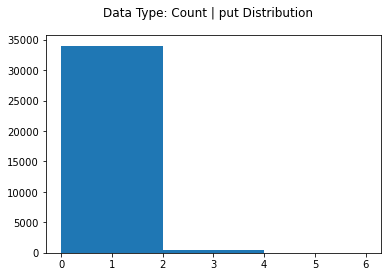

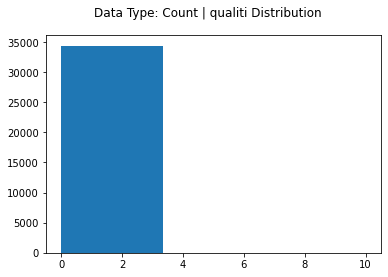

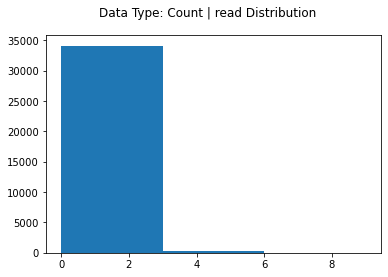

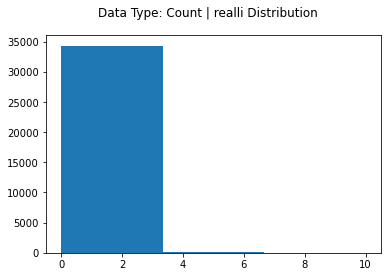

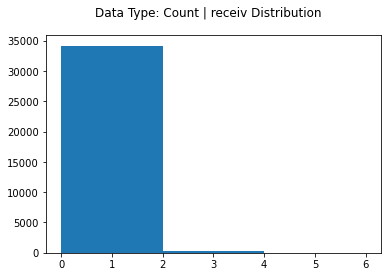

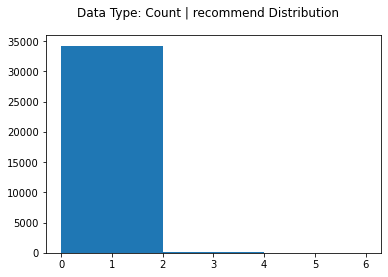

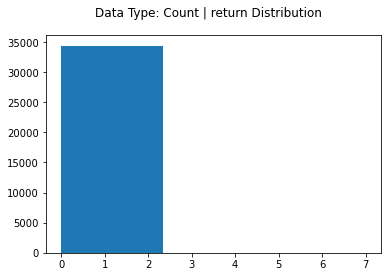

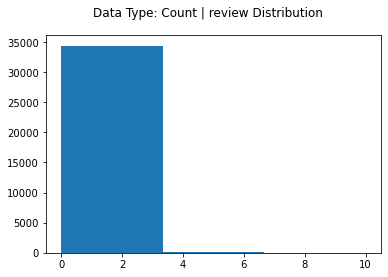

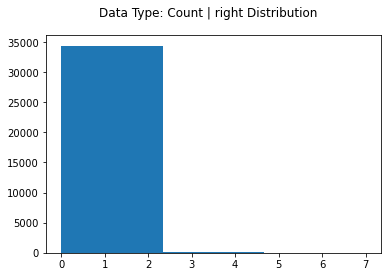

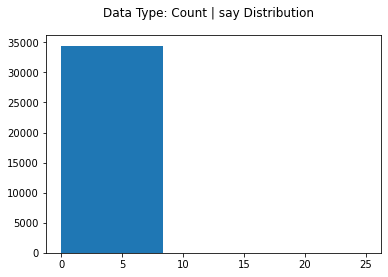

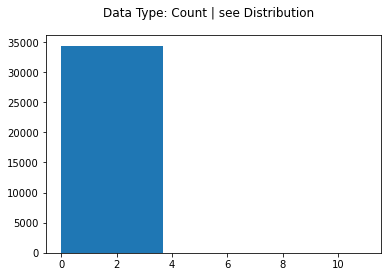

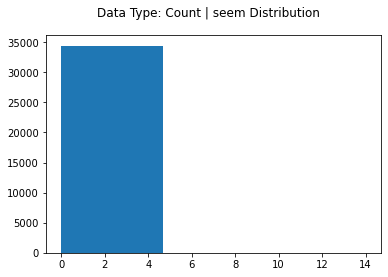

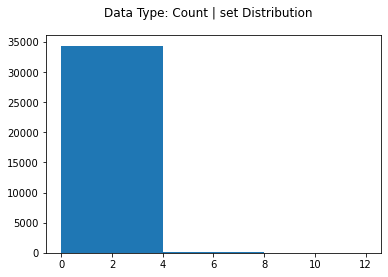

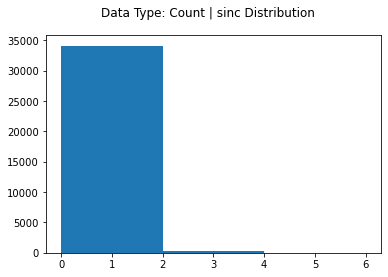

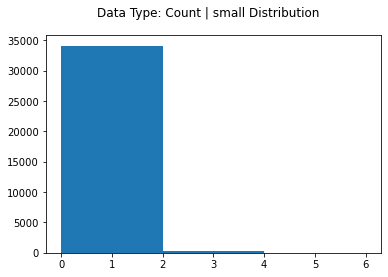

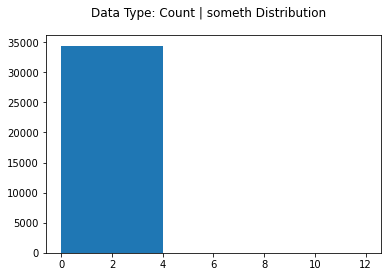

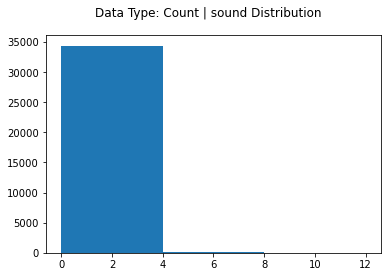

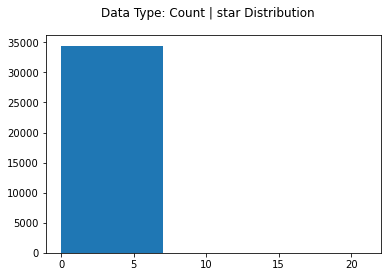

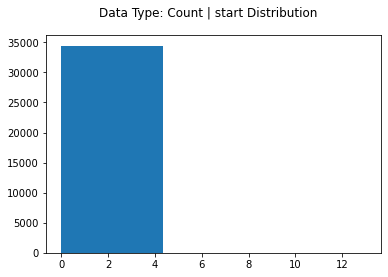

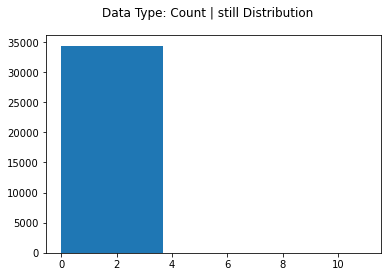

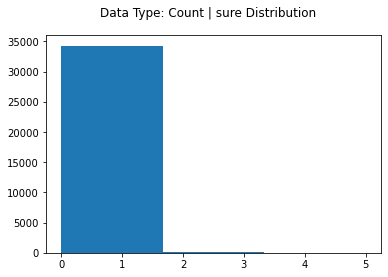

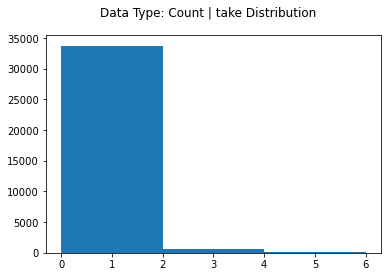

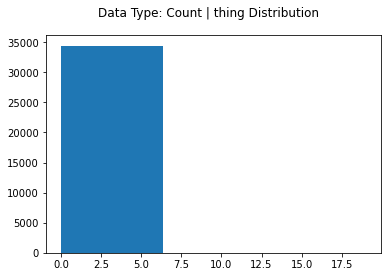

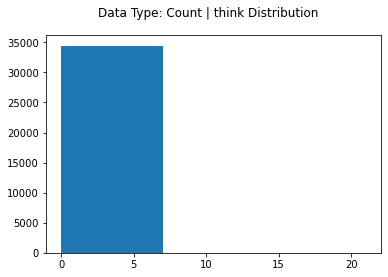

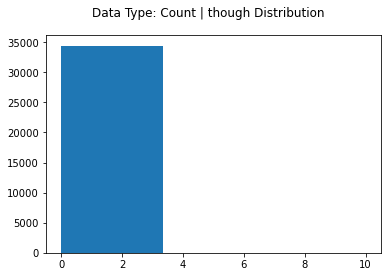

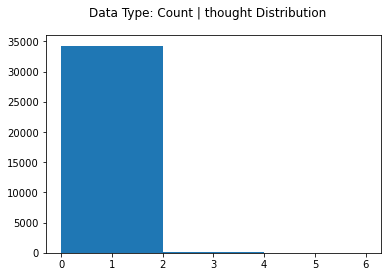

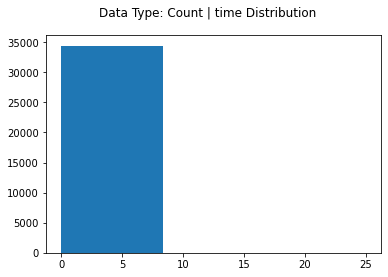

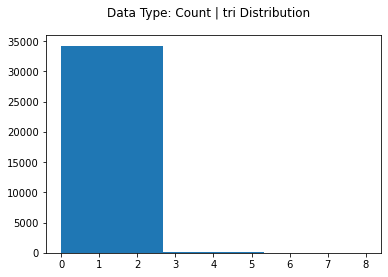

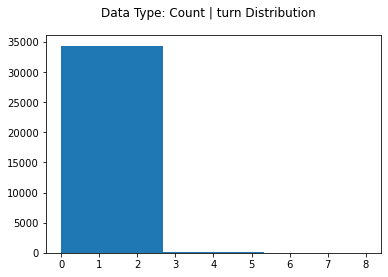

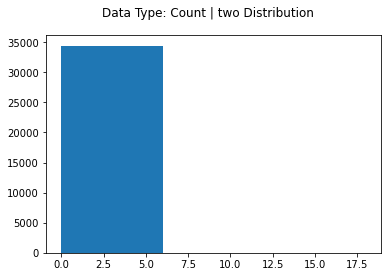

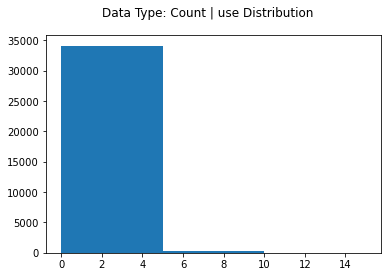

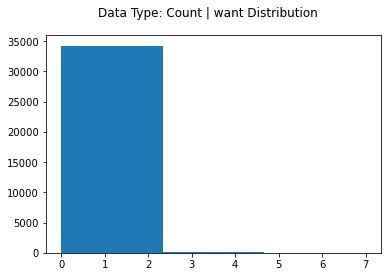

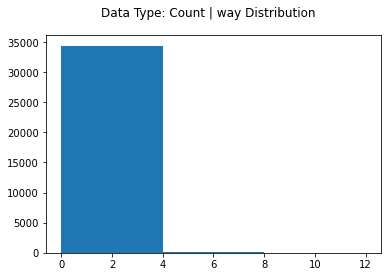

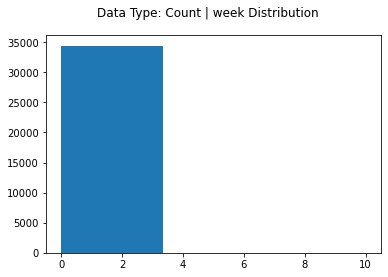

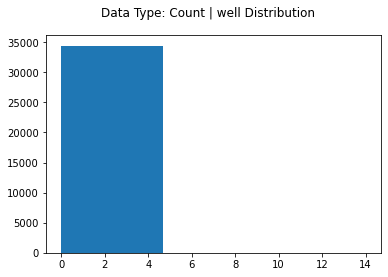

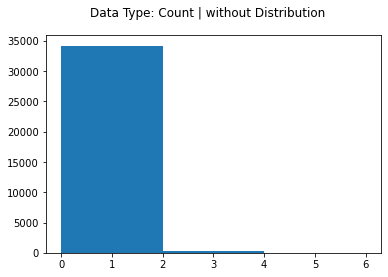

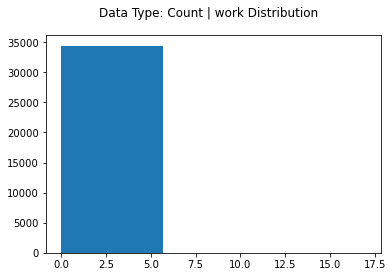

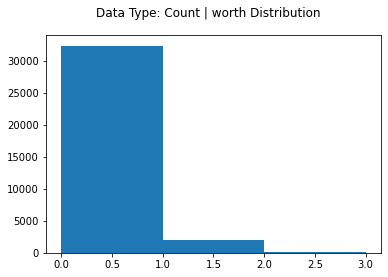

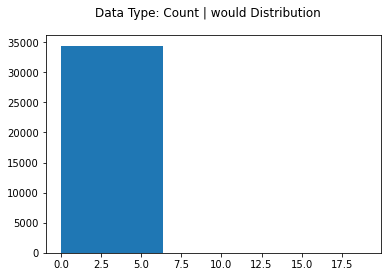

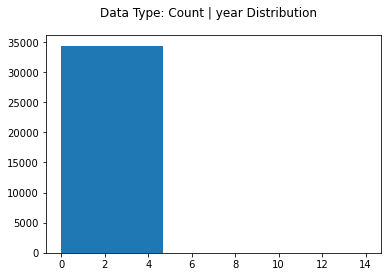

In [7]:
# Get some quick plots to show the distributions of each word in each dataset
for i in range(len(dfs)):
    plot_df_distributions(dfs[i], names[i])

### Class Evaluation

In [8]:
# Confirm class distribution
classes.value_counts()

1.0    19874
0.0    14562
Name: Rating, dtype: int64

### Step 3 - Perform classification on binary data

In [9]:
# Test some basic classifiers

# Declare a list of classifiers to try
# classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), 
#                SVC(C=1.0, kernel='linear', degree=3, gamma='auto')]

classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB()]

# Create blank dataframes to hold the results of the classification attempts
boolean_results = pd.DataFrame(columns = ['Simulation', 'Classifier', 'Best', 'Worst', 'Average'])
tfidf_results = pd.DataFrame(columns = ['Simulation', 'Classifier', 'Best', 'Worst', 'Average'])
freq_results = pd.DataFrame(columns = ['Simulation', 'Classifier', 'Best', 'Worst', 'Average'])

# Run a given number of simulations
for n in range(sims):
    # Loop through each of the datasets
    for i in range(len(dfs)):
        print("*--------------------------------------------*")
        # Copy the dataset
        temp = dfs[i].copy()

        # Try each classifier
        for clf in classifiers:
            # Take the classifiers name
            name = str(clf.__class__.__name__)
            try:  
                # Utilize a shuffle split for the cross validation
                cv = StratifiedShuffleSplit(n_splits = folds, test_size = 0.33, random_state=np.random.randint(1,100))
                # Capture the best, worst, and average across the splits
                best = round(max(cross_val_score(clf, temp, classes, cv=cv)), 5)
                worst = round(min(cross_val_score(clf, temp, classes, cv=cv)), 5)
                avg = round((sum(cross_val_score(clf, temp, classes, cv=cv)) / len(cross_val_score(clf, temp, classes, cv=cv))), 5)
                # Print out results
                print("Simulation: {} | Data: {} | Classifier: {} | Best: {} | Worst: {} | Average: {}".format(n+1, names[i], name, best, worst, avg))
            except:
                # Alert if any error
                print("Error Calculating: {}".format(name))

            # Create a row to append to the respective df with the results
            temp_row = [n+1, name, best, worst, avg]
            
            # Append to correct df
            if(names[i] == 'Boolean'):
                boolean_results.loc[len(boolean_results), :] = temp_row
            elif(names[i] == 'TFIDF'):
                tfidf_results.loc[len(tfidf_results), :] = temp_row
            else:
                freq_results.loc[len(freq_results), :] = temp_row
        
        # Delete temp df
        del(temp)
        
        # Free up memory
        gc.collect()

*--------------------------------------------*
Simulation: 1 | Data: Boolean | Classifier: GaussianNB | Best: 0.728 | Worst: 0.7148 | Average: 0.72111
Simulation: 1 | Data: Boolean | Classifier: MultinomialNB | Best: 0.74428 | Worst: 0.73821 | Average: 0.74132
Simulation: 1 | Data: Boolean | Classifier: BernoulliNB | Best: 0.73891 | Worst: 0.72888 | Average: 0.73284
*--------------------------------------------*
Simulation: 1 | Data: TFIDF | Classifier: GaussianNB | Best: 0.72518 | Worst: 0.71542 | Average: 0.72032
Simulation: 1 | Data: TFIDF | Classifier: MultinomialNB | Best: 0.73486 | Worst: 0.72923 | Average: 0.73123
Simulation: 1 | Data: TFIDF | Classifier: BernoulliNB | Best: 0.72897 | Worst: 0.72316 | Average: 0.72677
*--------------------------------------------*
Simulation: 1 | Data: Count | Classifier: GaussianNB | Best: 0.717 | Worst: 0.70882 | Average: 0.71231
Simulation: 1 | Data: Count | Classifier: MultinomialNB | Best: 0.74006 | Worst: 0.73548 | Average: 0.73809
Simulat

Simulation: 8 | Data: TFIDF | Classifier: MultinomialNB | Best: 0.72906 | Worst: 0.72281 | Average: 0.72671
Simulation: 8 | Data: TFIDF | Classifier: BernoulliNB | Best: 0.73416 | Worst: 0.73046 | Average: 0.73266
*--------------------------------------------*
Simulation: 8 | Data: Count | Classifier: GaussianNB | Best: 0.71929 | Worst: 0.71392 | Average: 0.71732
Simulation: 8 | Data: Count | Classifier: MultinomialNB | Best: 0.74701 | Worst: 0.73372 | Average: 0.74231
Simulation: 8 | Data: Count | Classifier: BernoulliNB | Best: 0.73654 | Worst: 0.72694 | Average: 0.73178
*--------------------------------------------*
Simulation: 9 | Data: Boolean | Classifier: GaussianNB | Best: 0.72809 | Worst: 0.71771 | Average: 0.7224
Simulation: 9 | Data: Boolean | Classifier: MultinomialNB | Best: 0.74234 | Worst: 0.74006 | Average: 0.74114
Simulation: 9 | Data: Boolean | Classifier: BernoulliNB | Best: 0.73082 | Worst: 0.72941 | Average: 0.73017
*--------------------------------------------*
Si

In [10]:
# Store all results in one list
results = [boolean_results, tfidf_results, freq_results]   

# Plot the average across the folds for each dataset
for i in range(len(results)):
    plot_results(results[i], names[i], 'Average')

## Step 4 - Repeat Analysis for Scaled Sentiments

### Load and clean data

In [11]:
# Get fresh data
new_dfs, new_names, new_classes = create_amazon_dataframes(pd.read_csv('Amazon Reviews.csv'), True, 'Rating')

In [12]:
# Replace 1s with 3, and 0s with 1
new_classes.replace(1.0,3, inplace=True)
new_classes.replace(0.0,1, inplace=True)

# Change floats to ints
new_classes = [int(x) for x in list(new_classes)]

In [13]:
# Make sure it is binary
assert(len(list(set(new_classes))) == 2)
# Confirm the classes are 3 and 1
print(set(new_classes))

{1, 3}


### Scale positive sentiments x 3

In [14]:
# Loop through the scaled dfs
for df in new_dfs:
    df['classification'] = new_classes
    # Multiply the values by *-1 if the sentiment was negative
    df.update(df.drop('classification',axis=1).mul(df.classification,axis=0)[df.classification.eq(3)])
    # Drop the classification column now
    df.drop('classification', inplace=True, axis=1)
    # Free up some memory
    gc.collect()

### Correlation Heatmaps

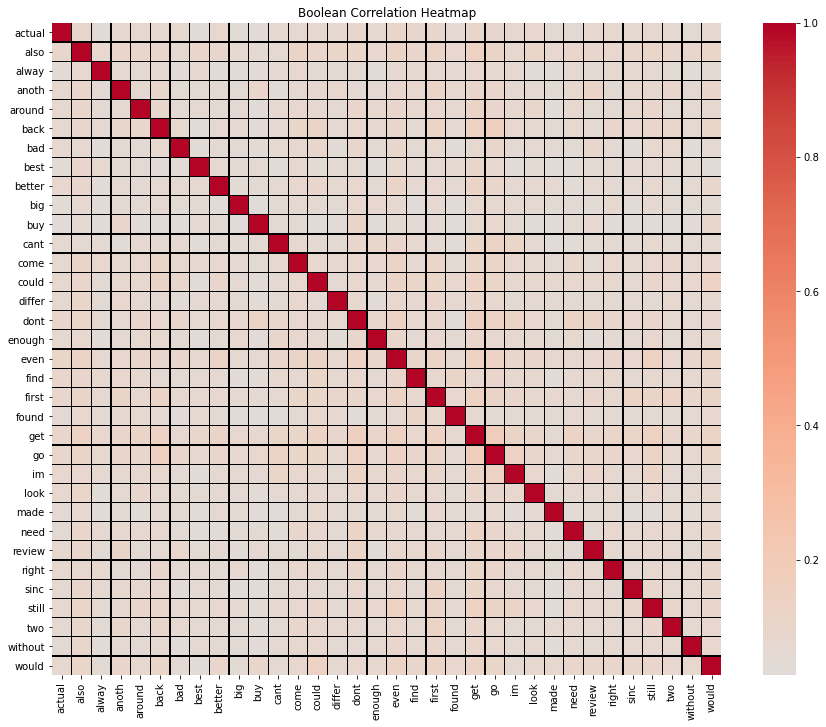

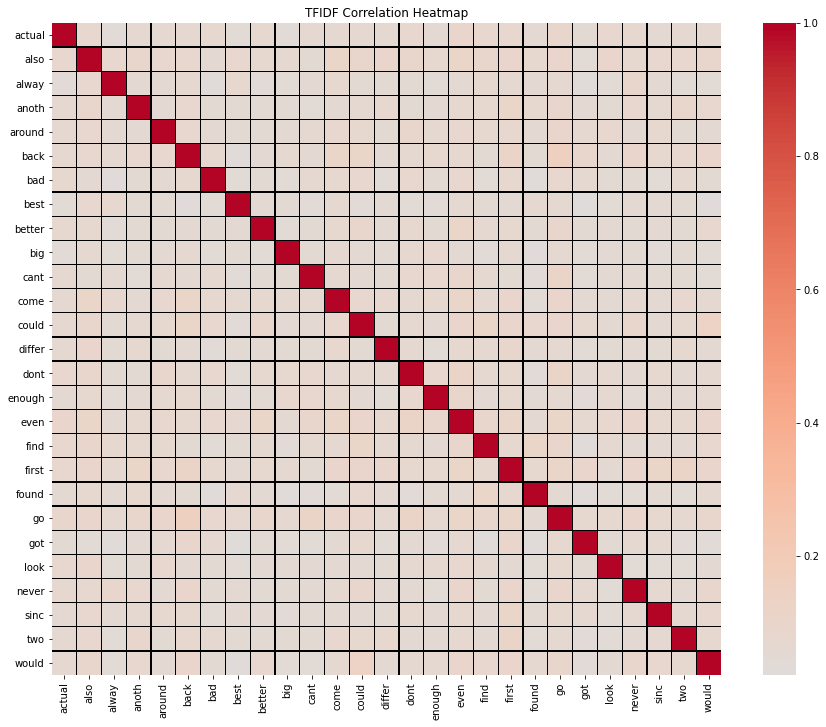

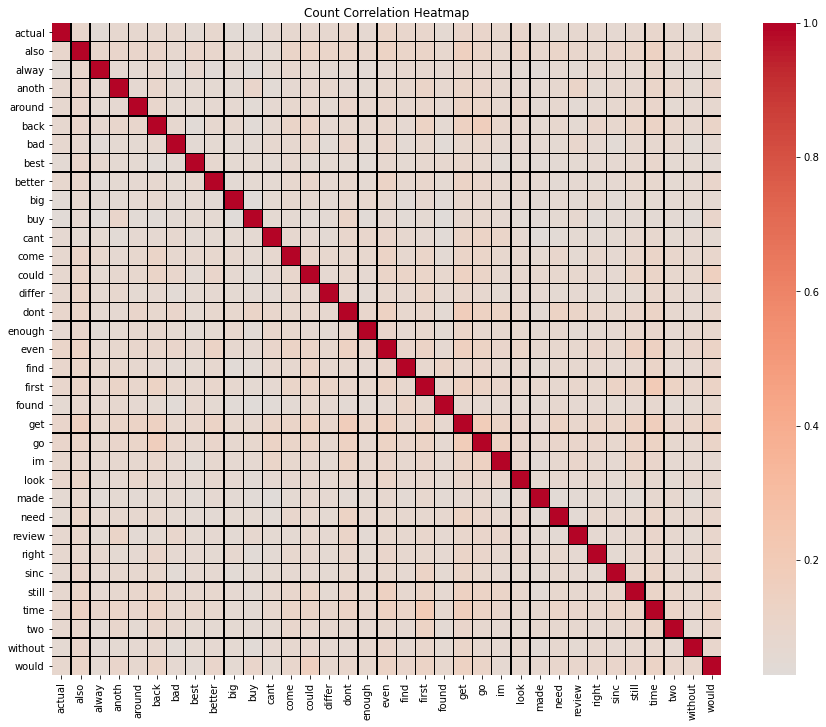

In [15]:
# Start calculating their correlation
for i in range(len(new_dfs)):
    plot_correlations(new_dfs[i], new_names[i])

### Distribution Plots

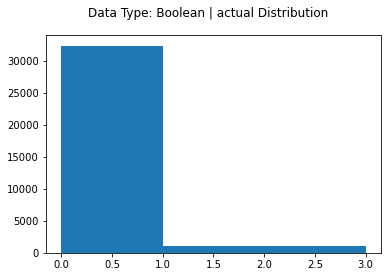

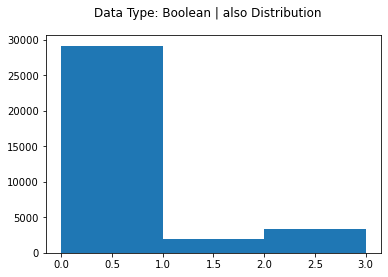

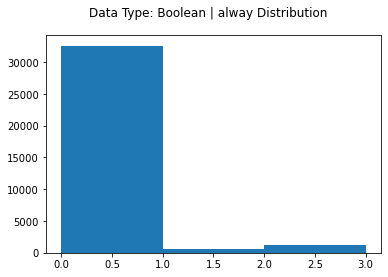

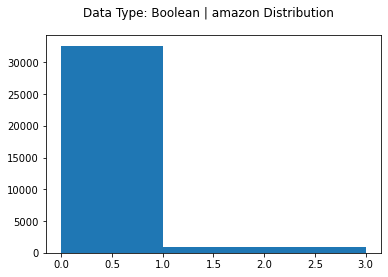

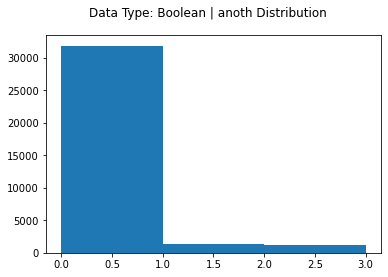

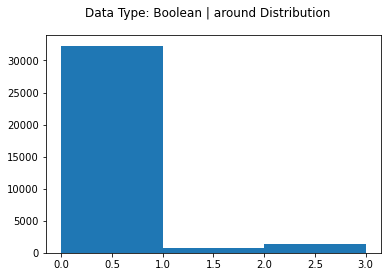

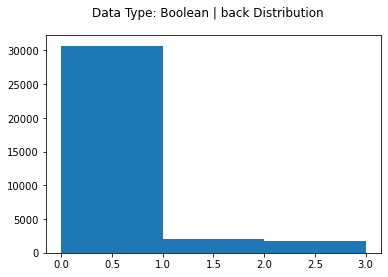

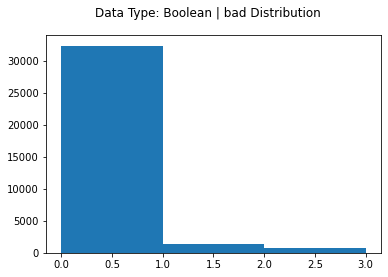

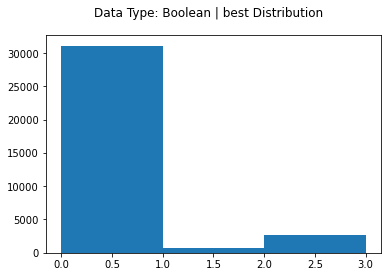

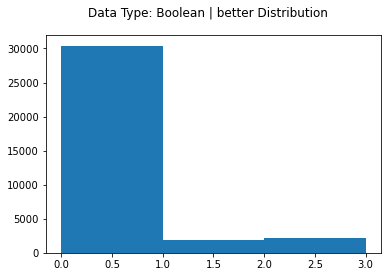

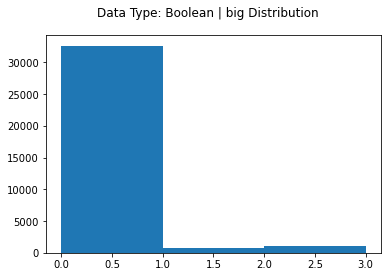

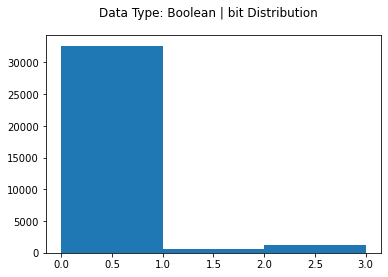

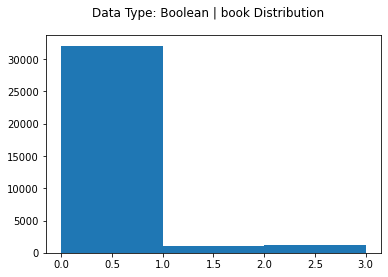

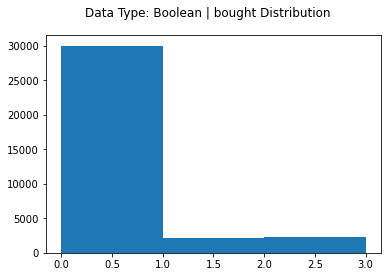

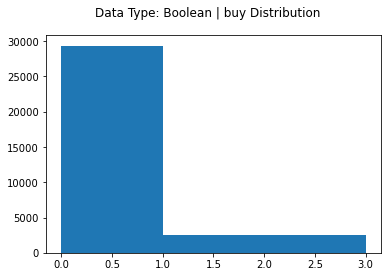

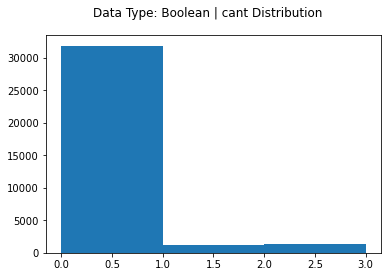

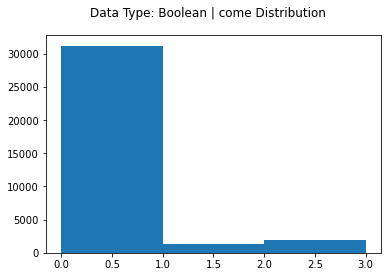

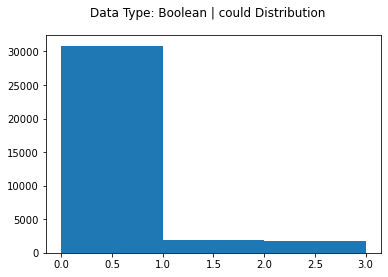

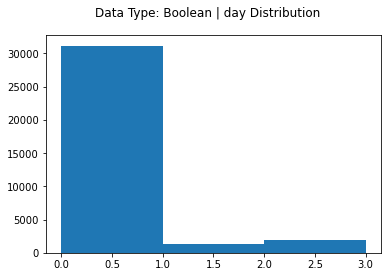

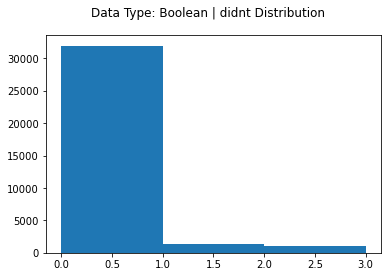

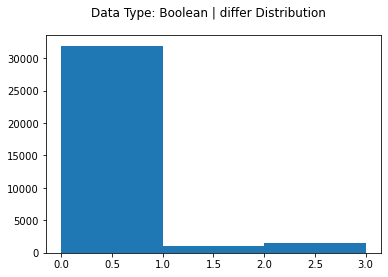

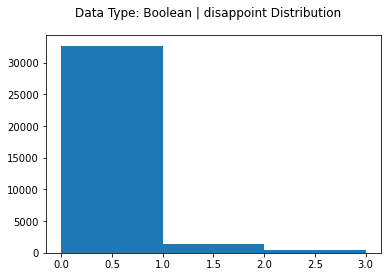

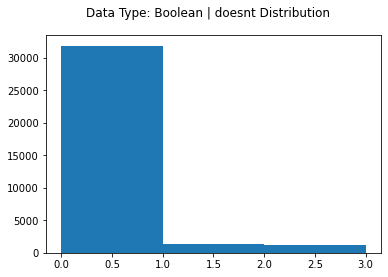

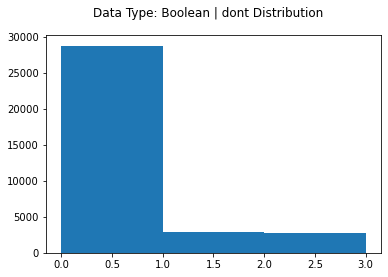

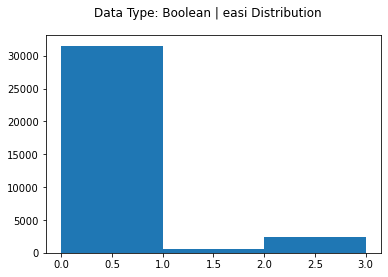

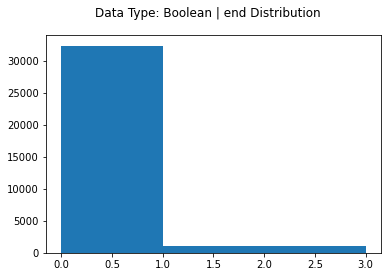

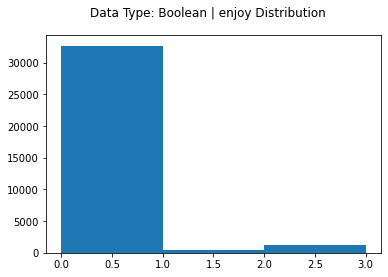

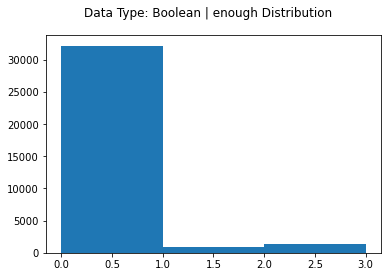

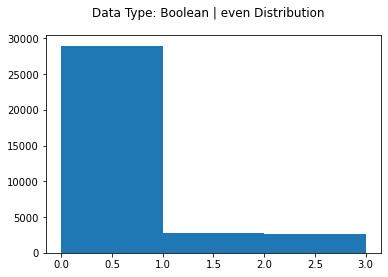

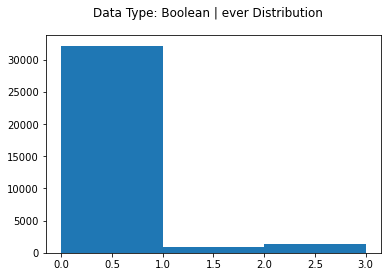

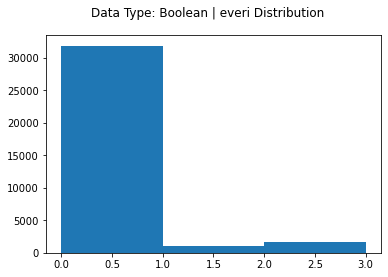

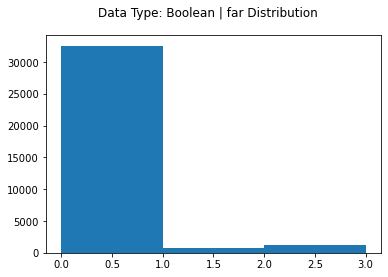

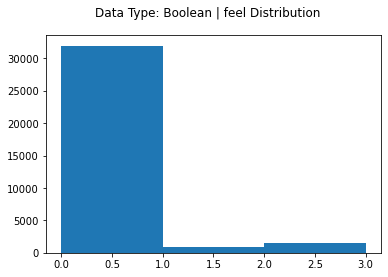

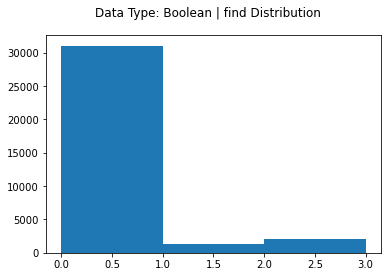

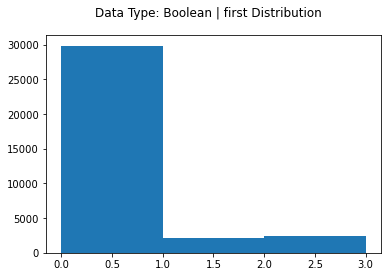

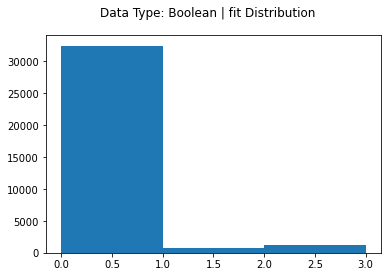

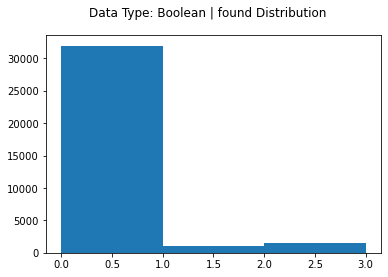

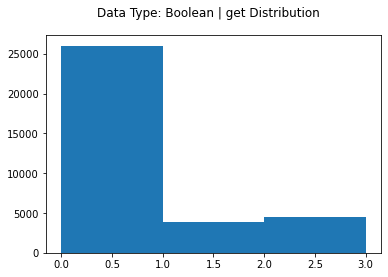

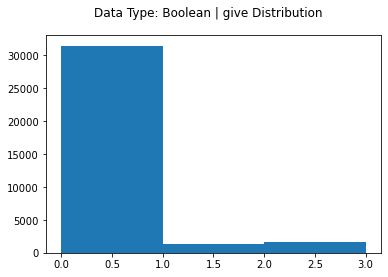

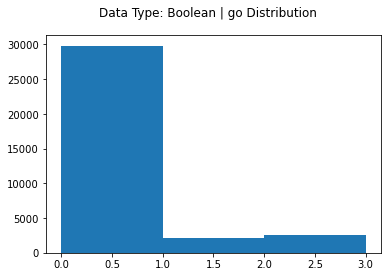

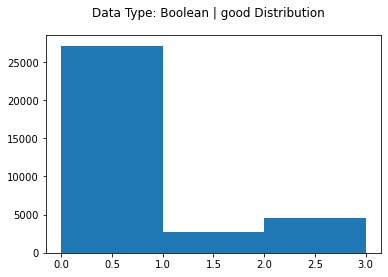

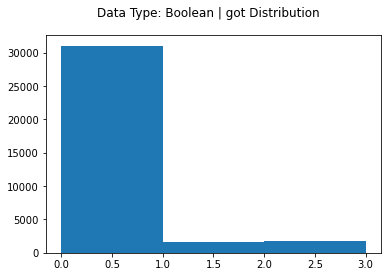

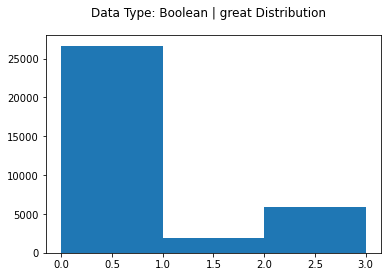

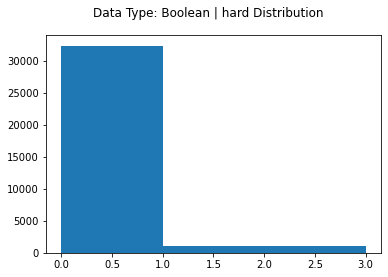

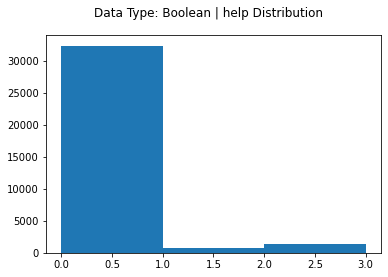

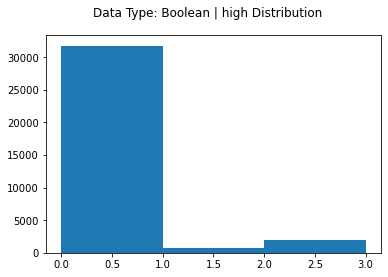

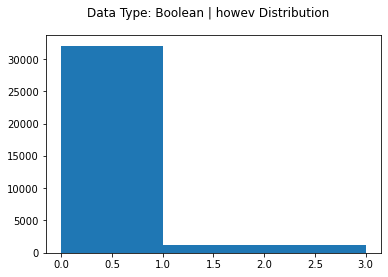

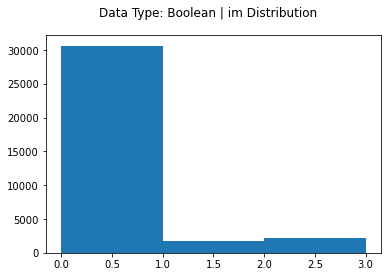

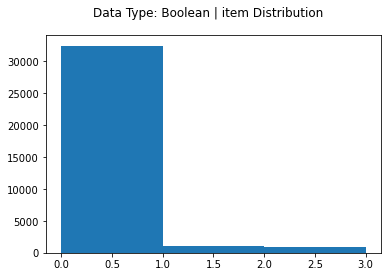

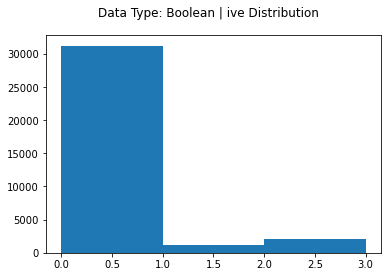

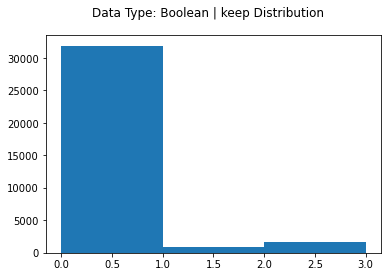

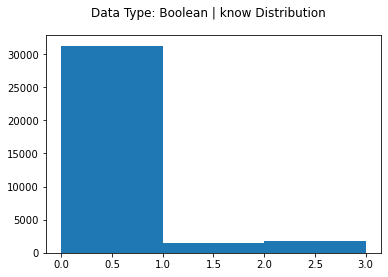

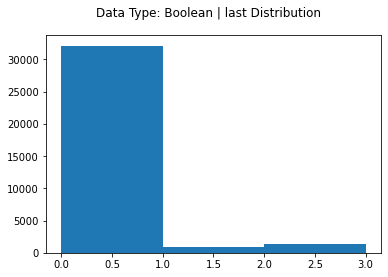

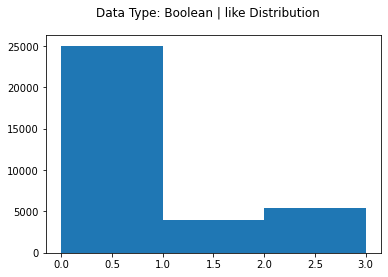

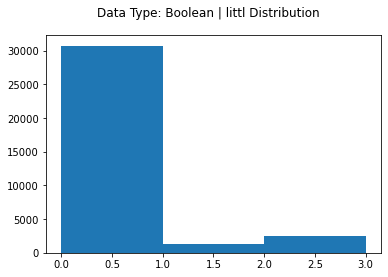

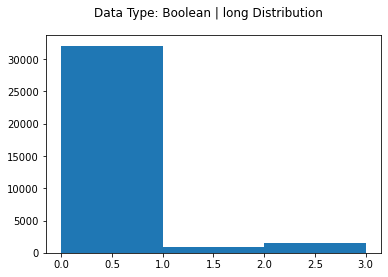

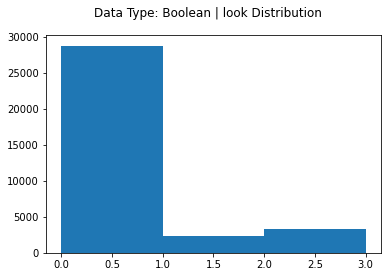

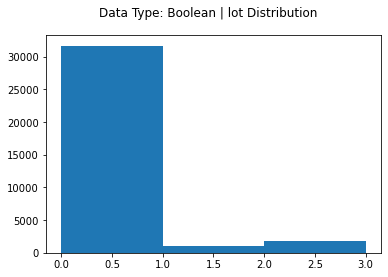

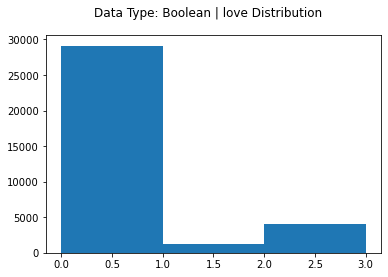

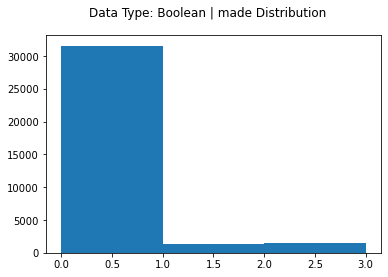

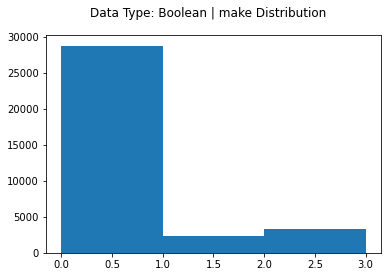

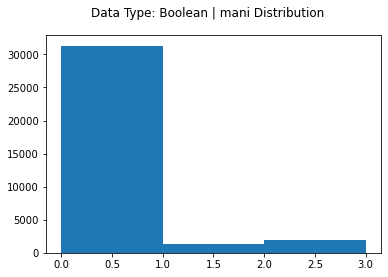

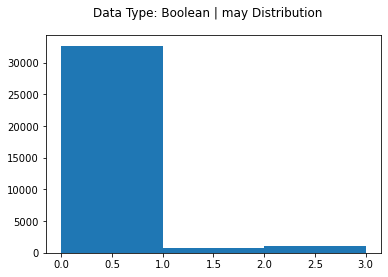

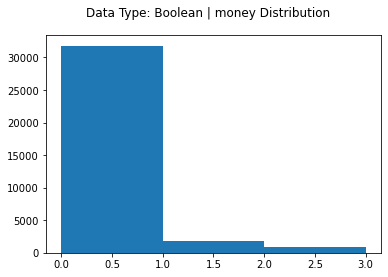

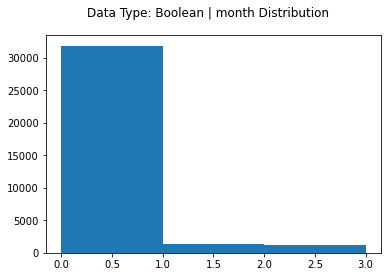

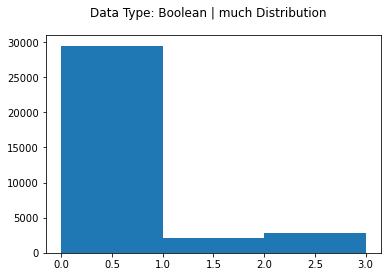

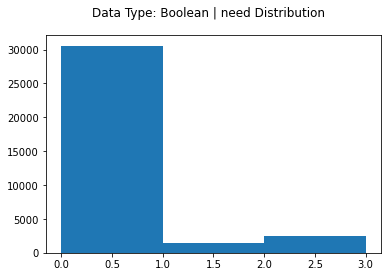

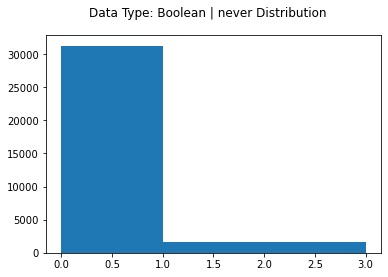

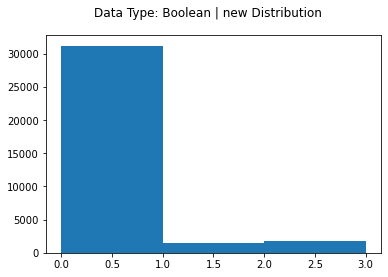

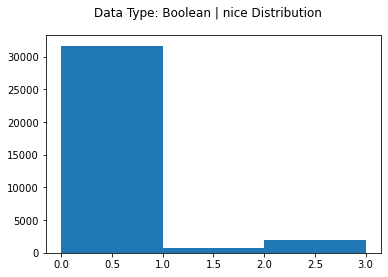

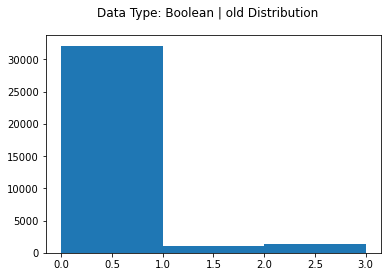

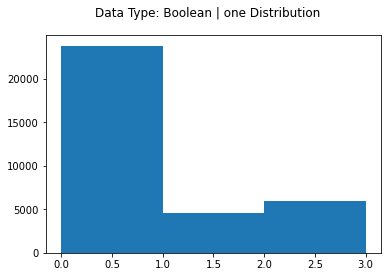

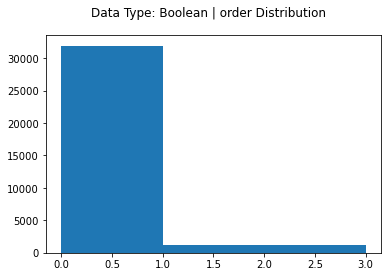

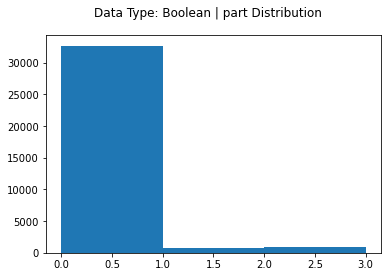

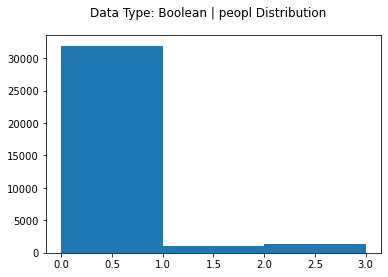

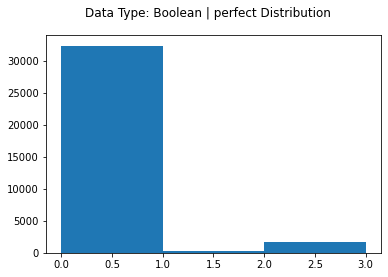

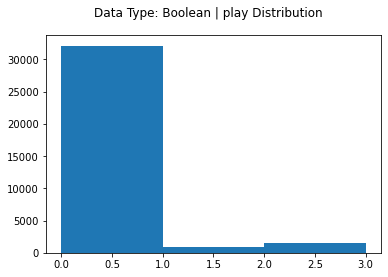

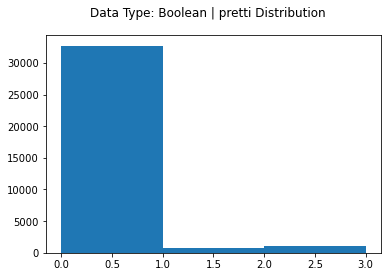

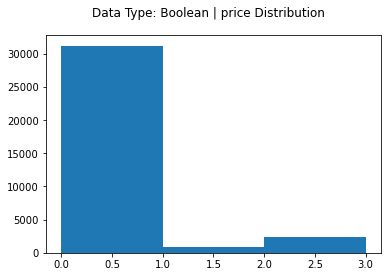

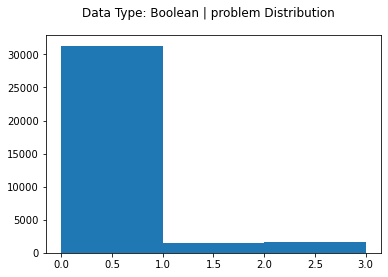

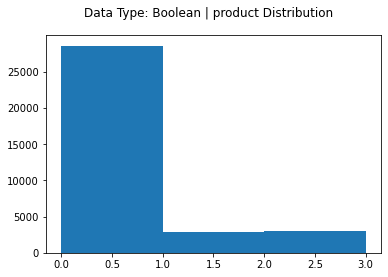

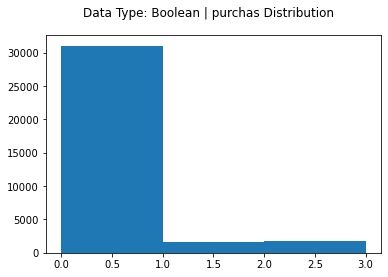

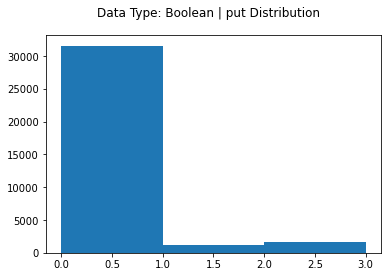

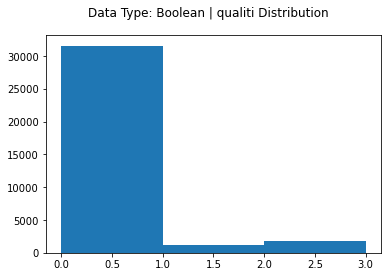

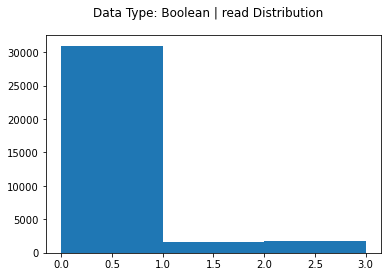

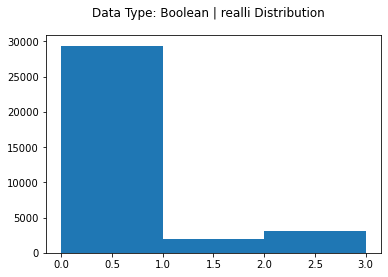

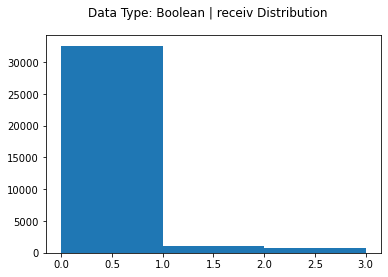

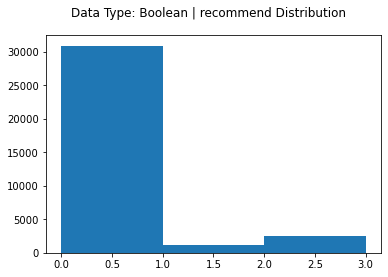

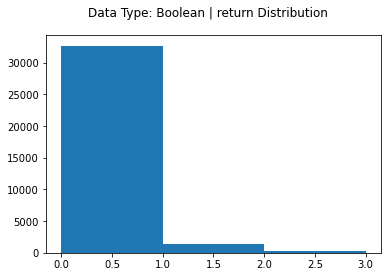

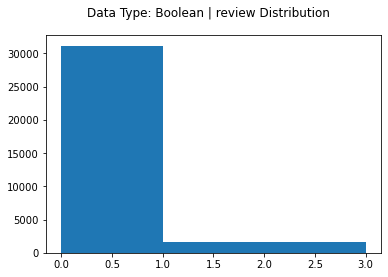

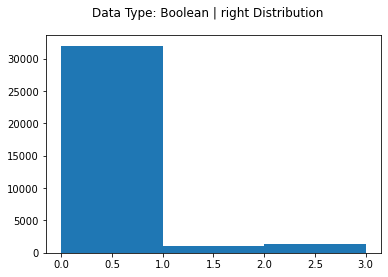

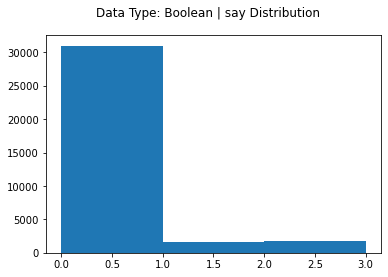

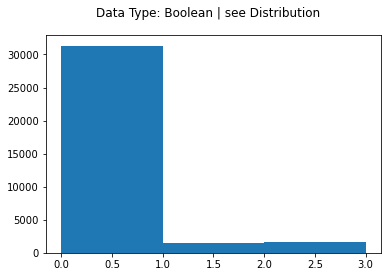

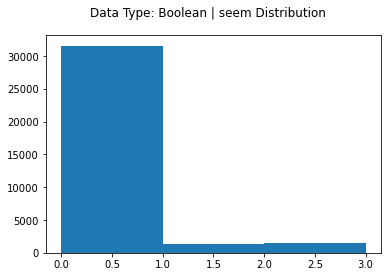

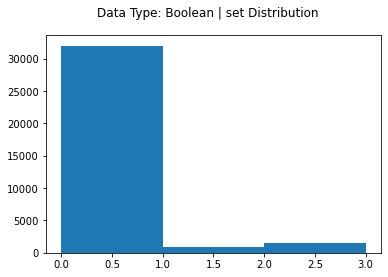

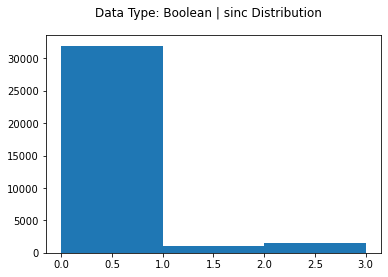

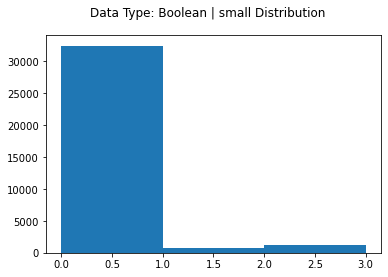

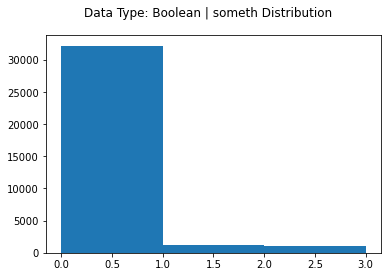

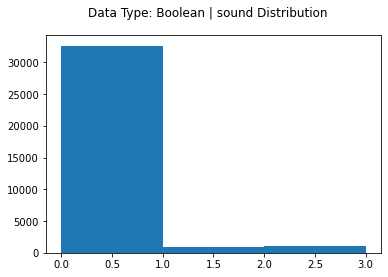

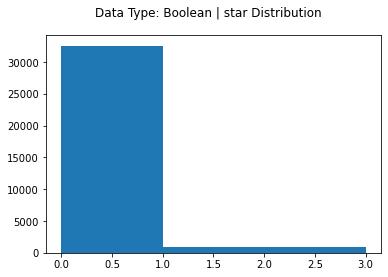

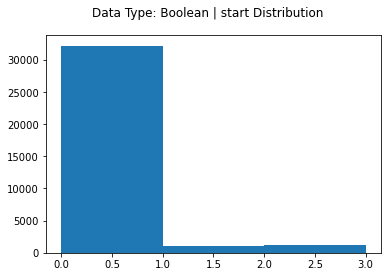

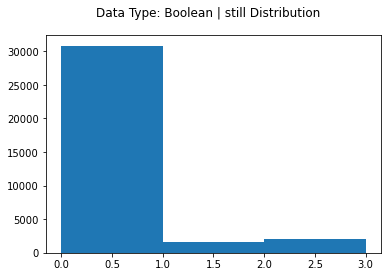

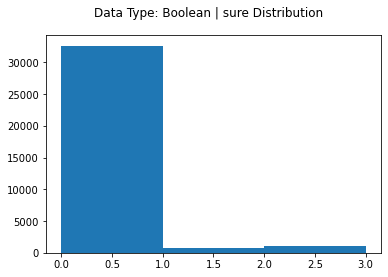

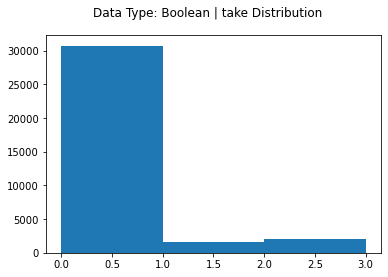

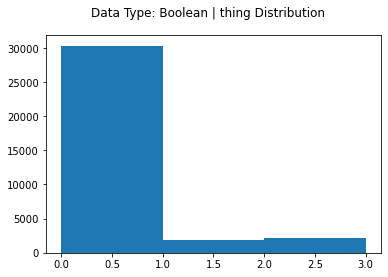

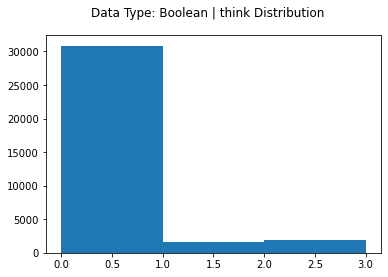

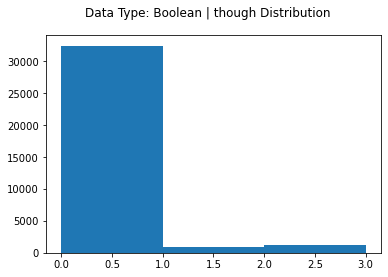

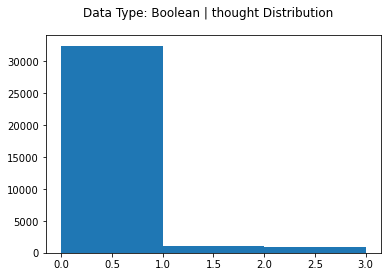

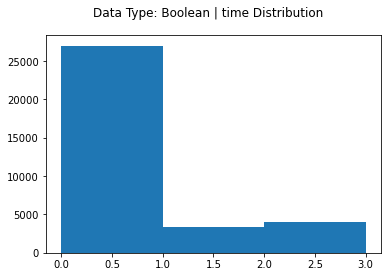

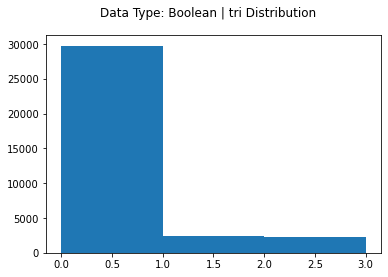

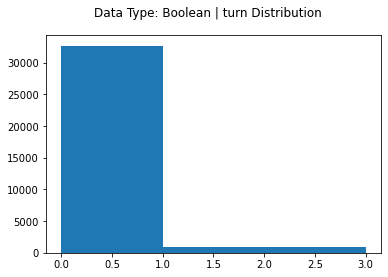

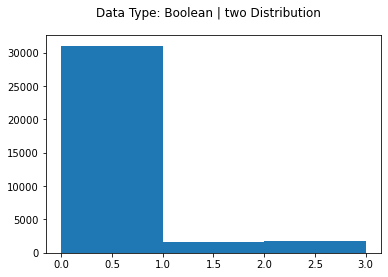

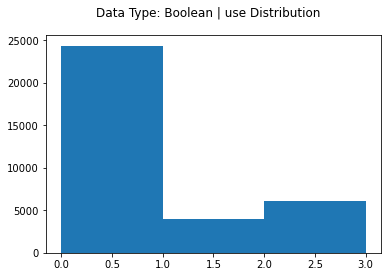

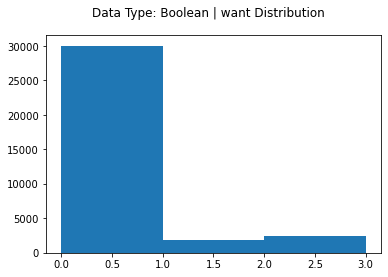

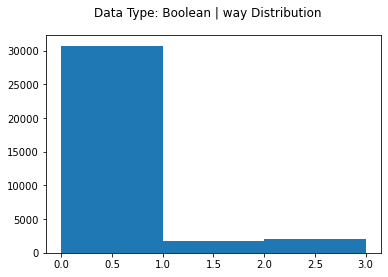

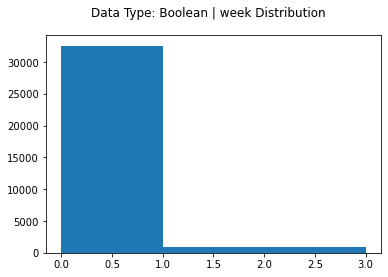

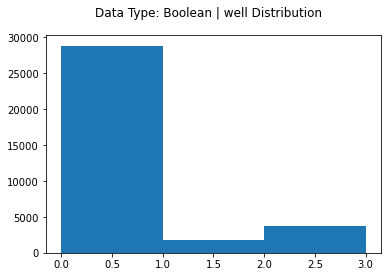

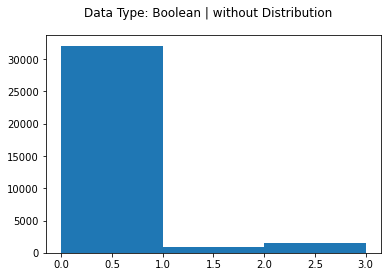

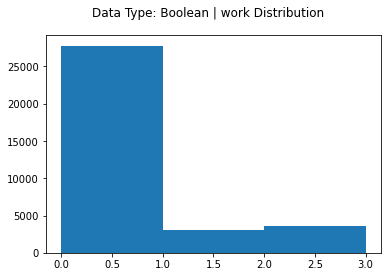

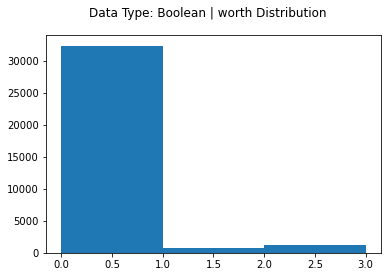

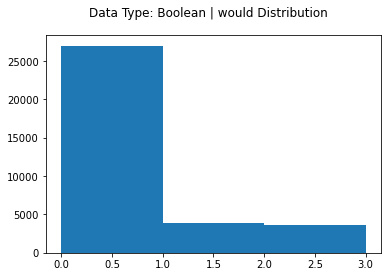

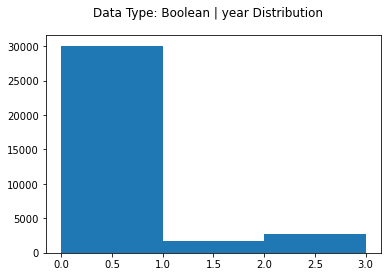

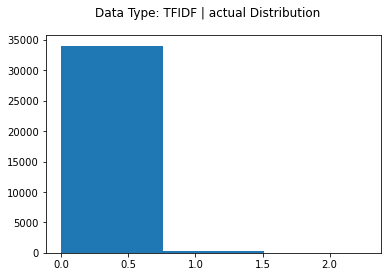

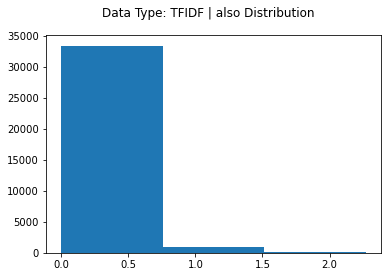

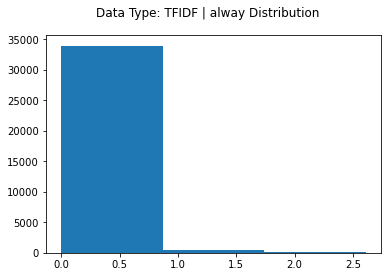

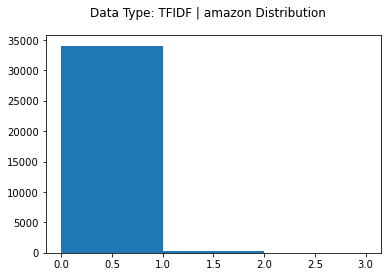

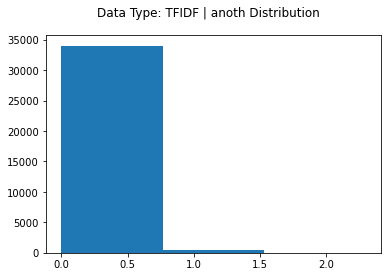

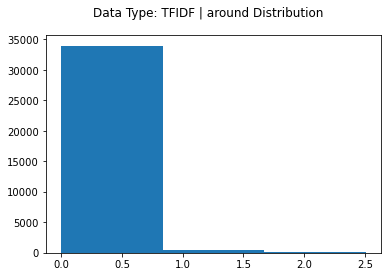

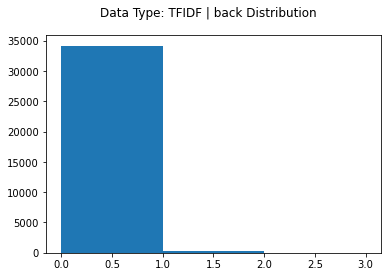

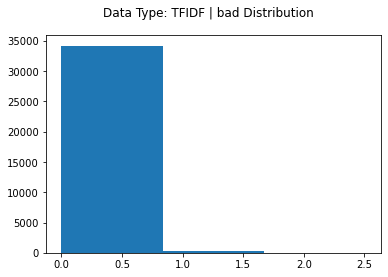

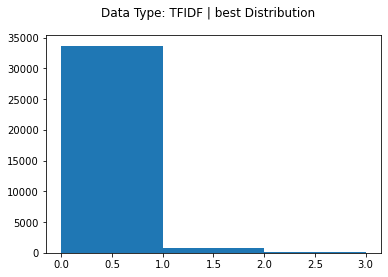

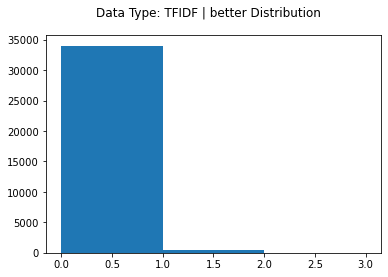

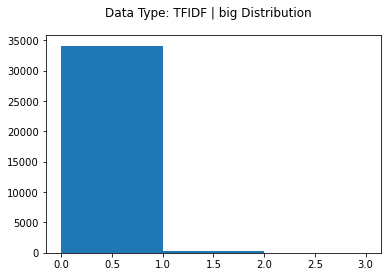

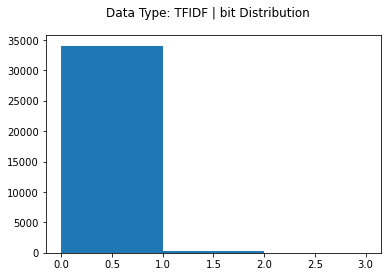

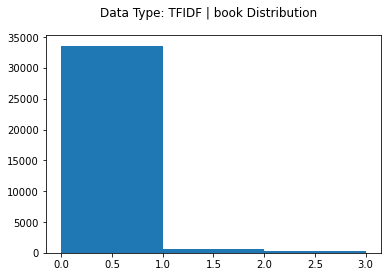

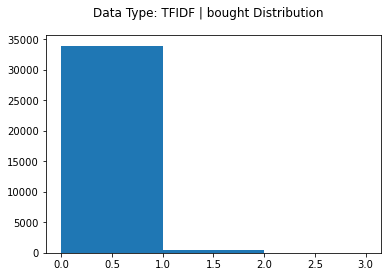

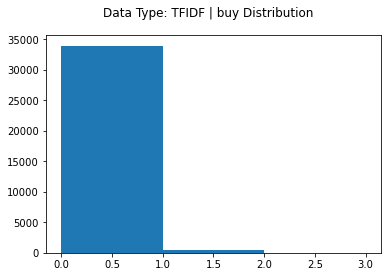

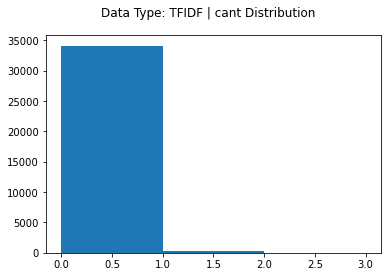

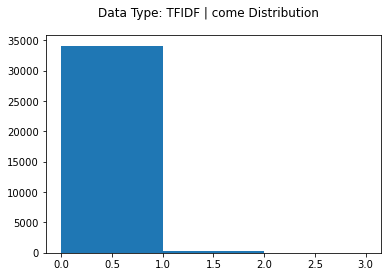

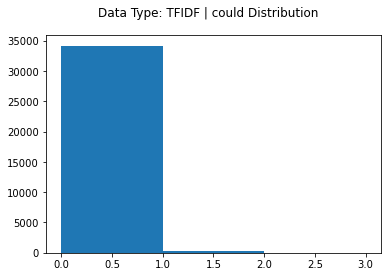

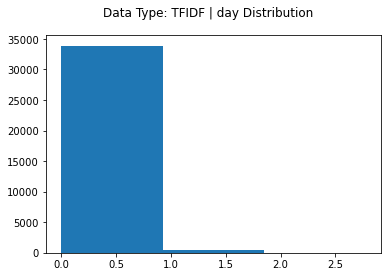

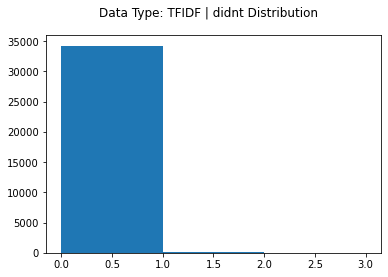

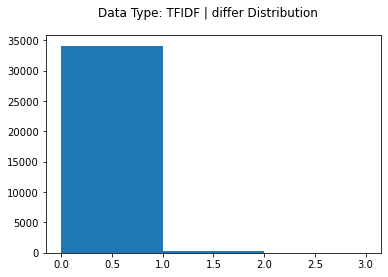

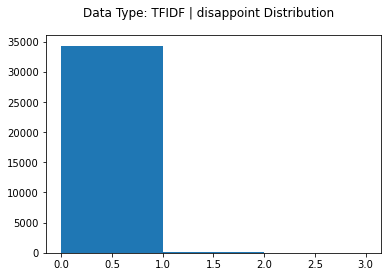

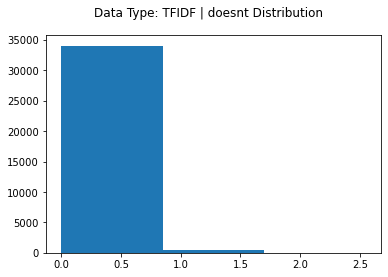

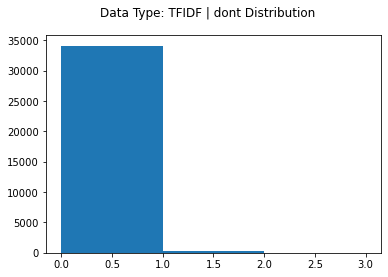

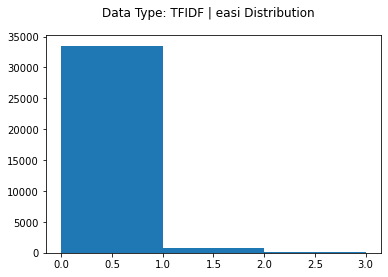

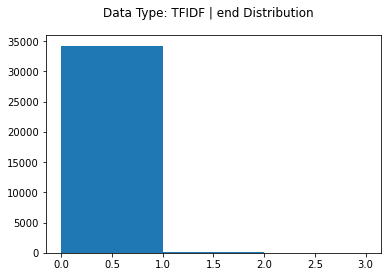

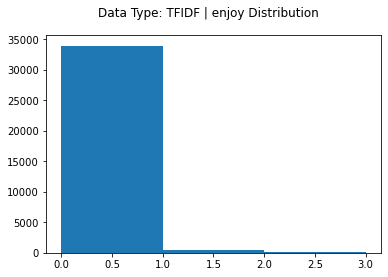

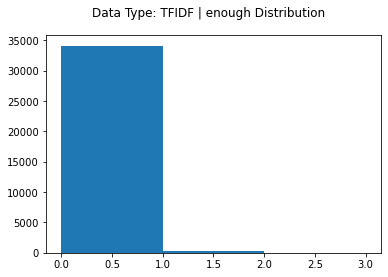

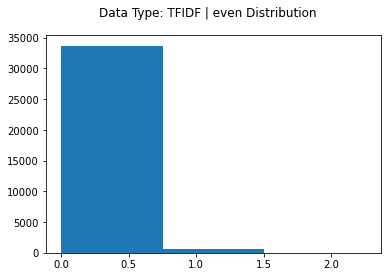

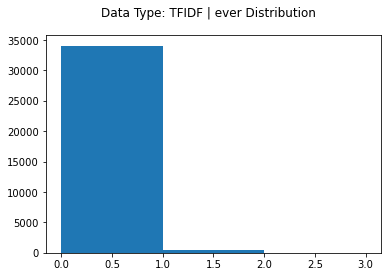

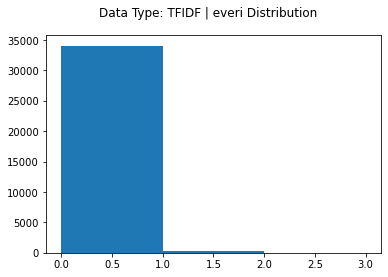

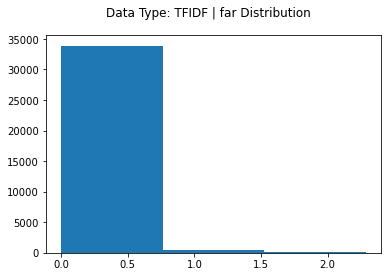

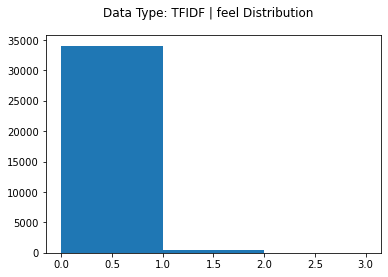

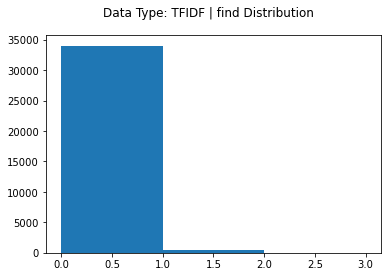

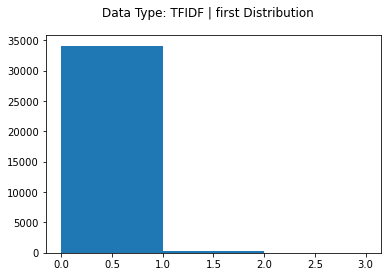

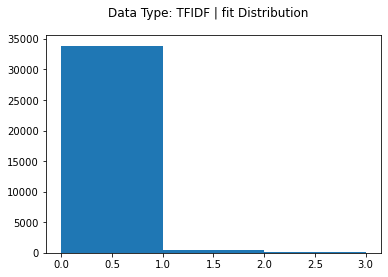

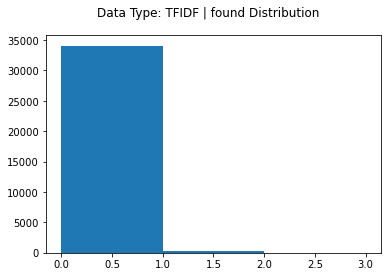

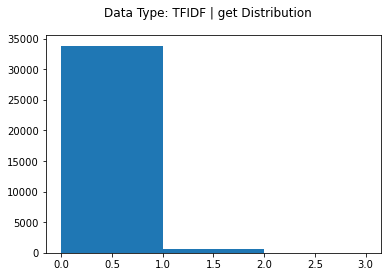

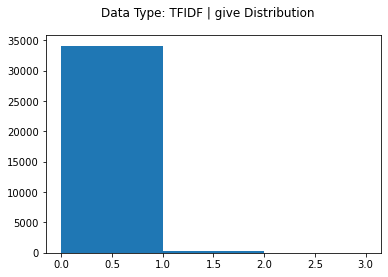

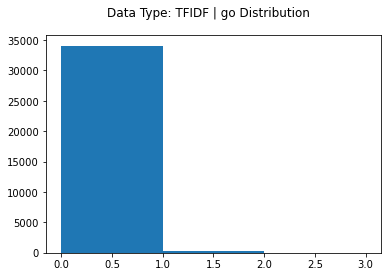

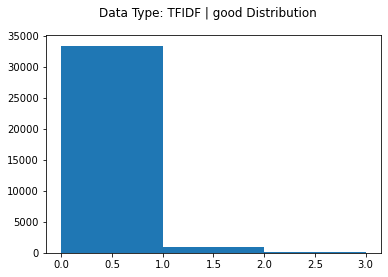

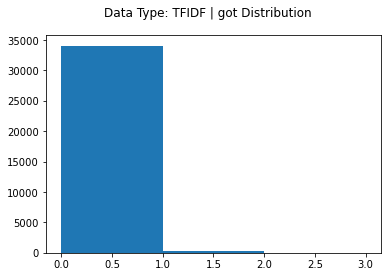

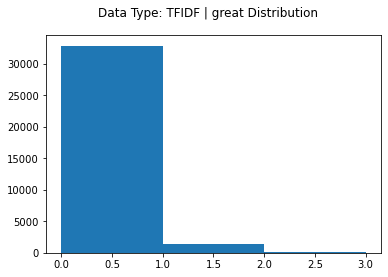

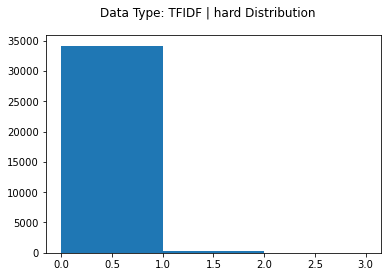

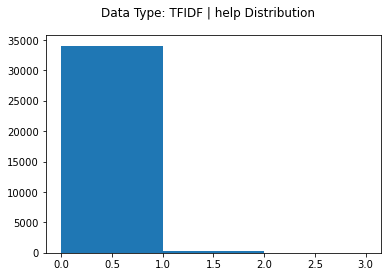

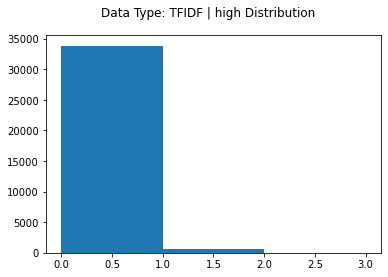

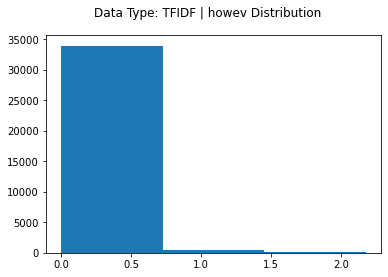

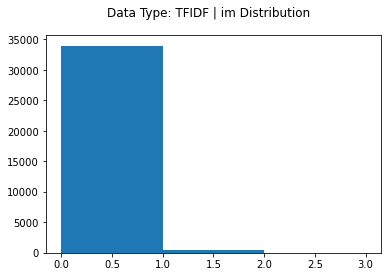

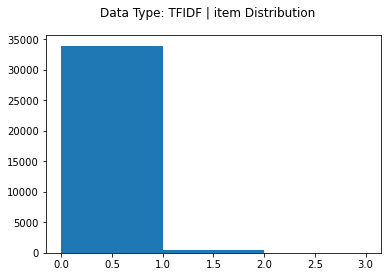

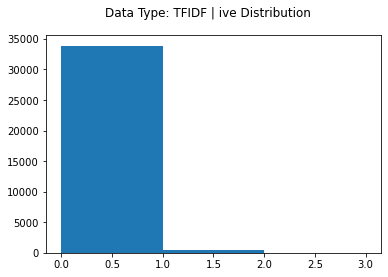

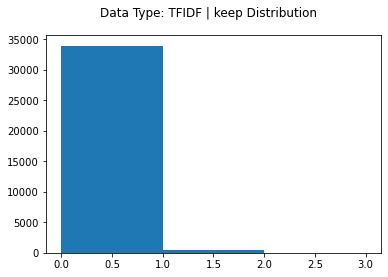

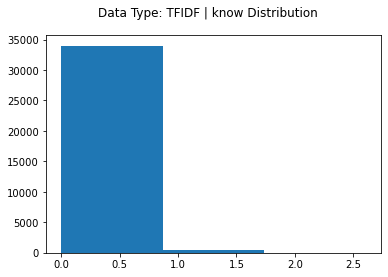

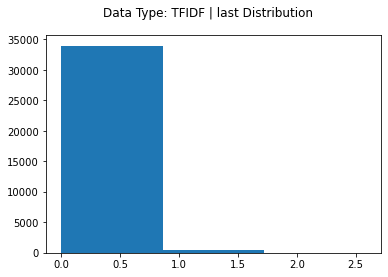

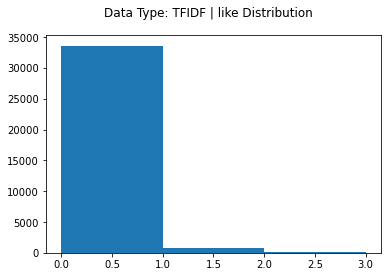

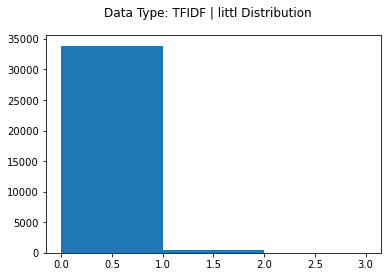

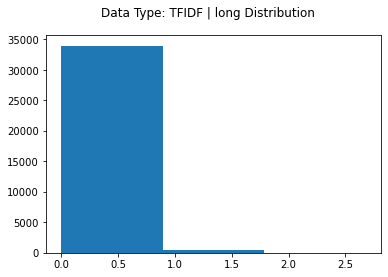

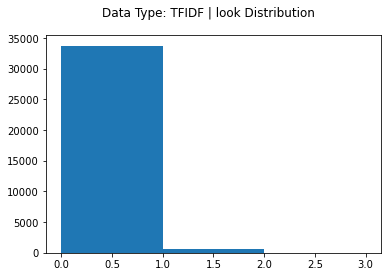

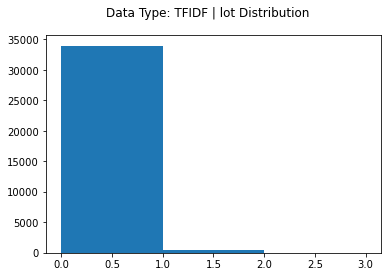

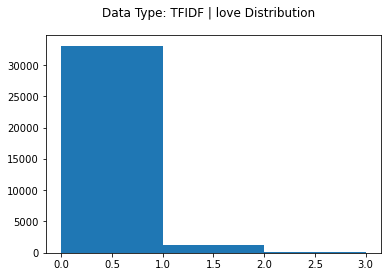

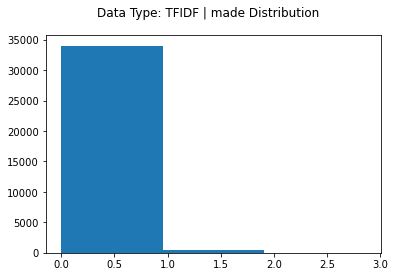

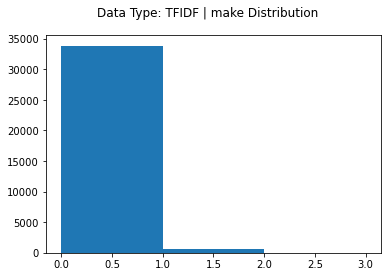

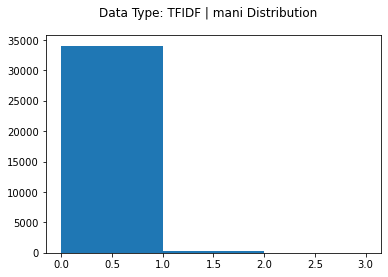

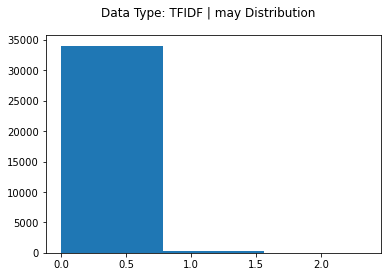

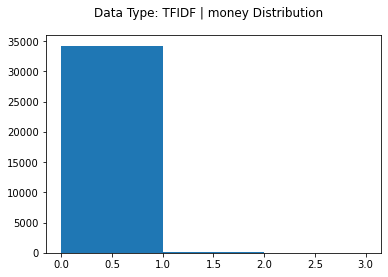

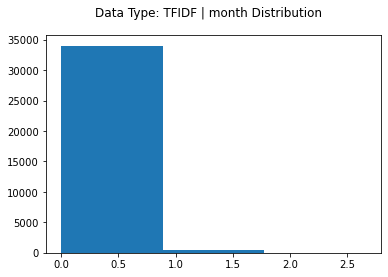

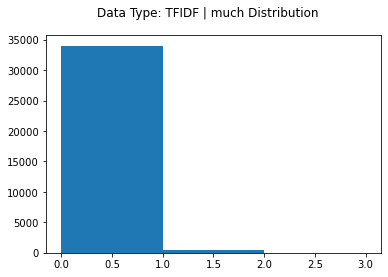

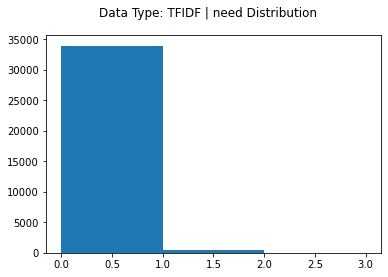

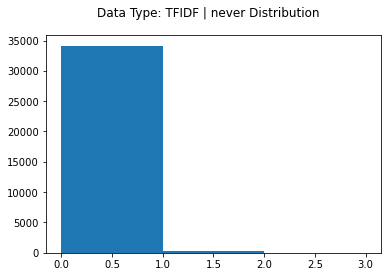

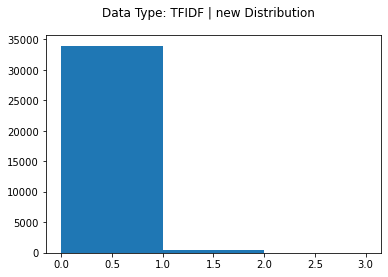

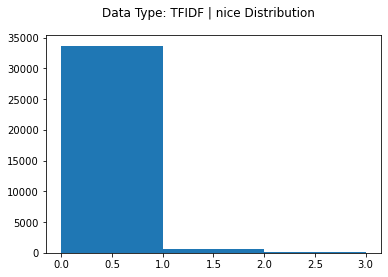

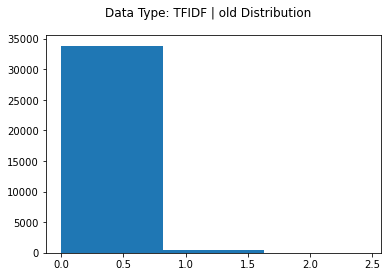

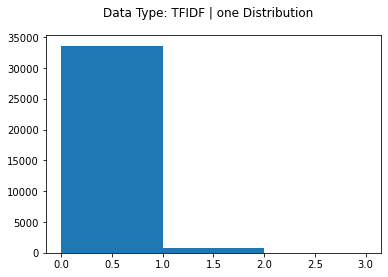

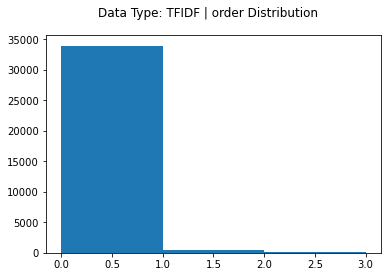

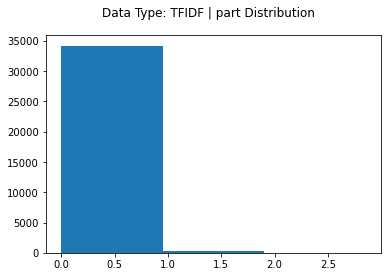

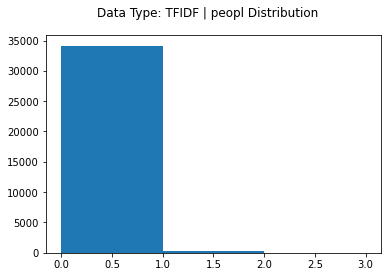

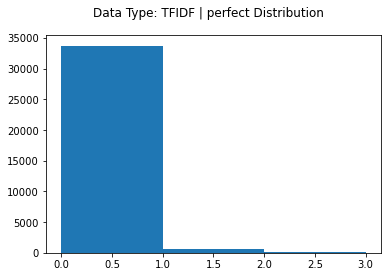

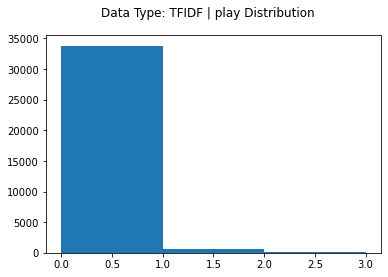

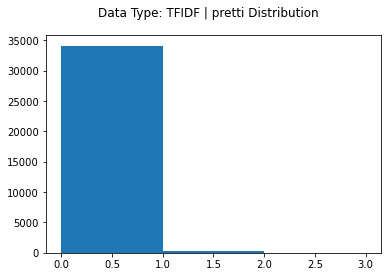

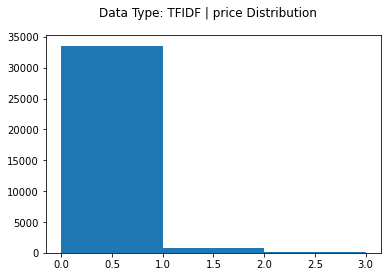

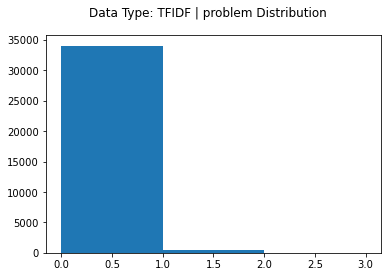

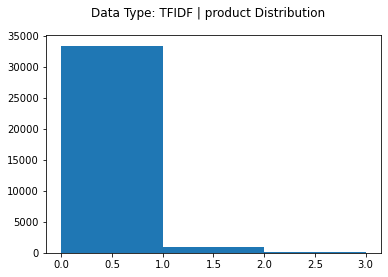

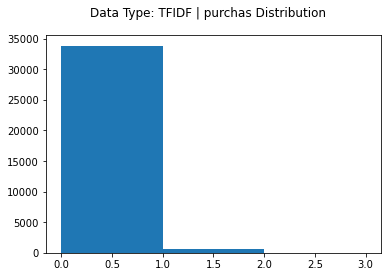

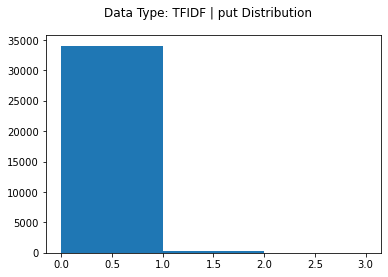

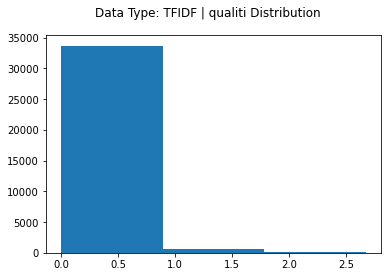

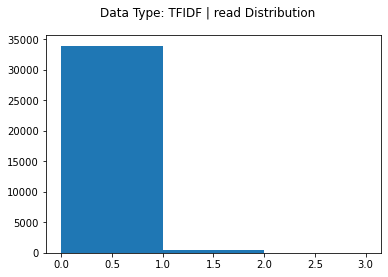

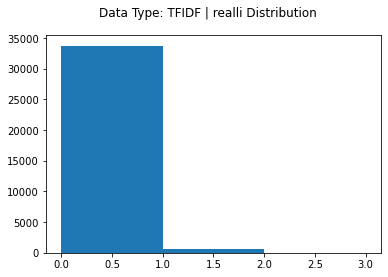

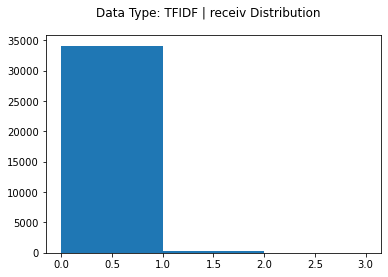

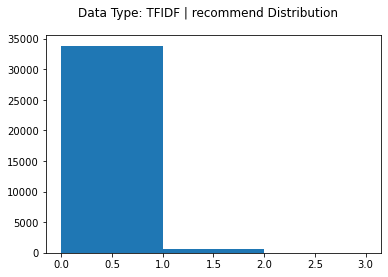

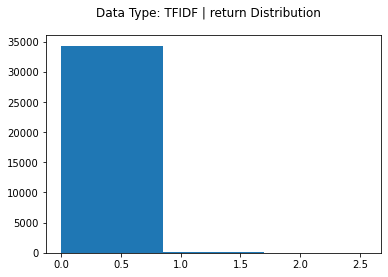

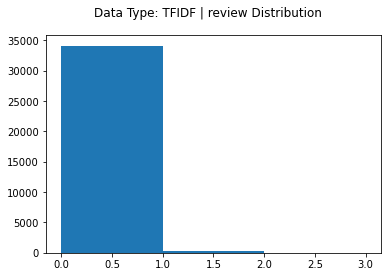

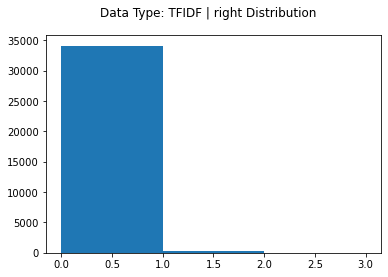

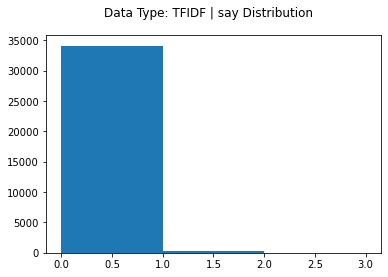

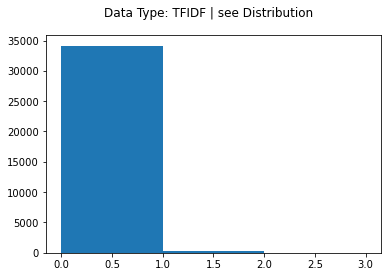

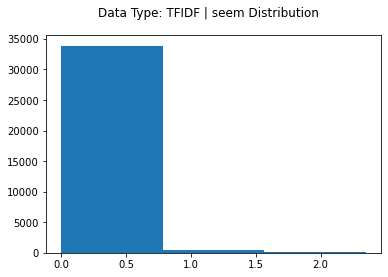

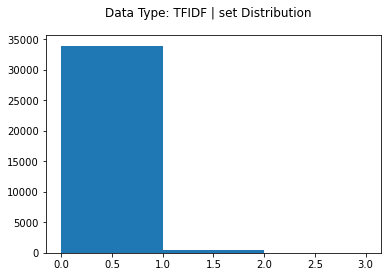

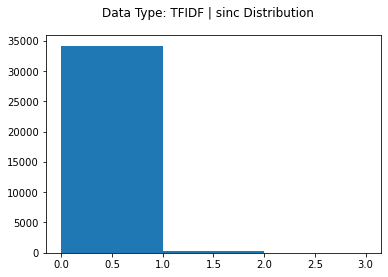

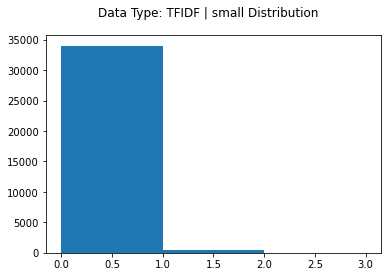

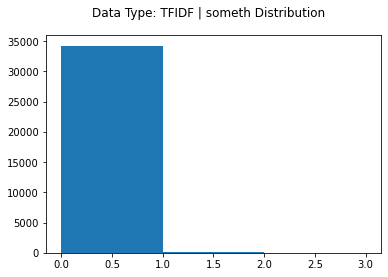

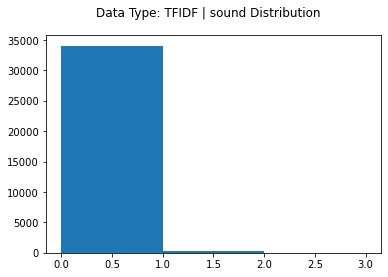

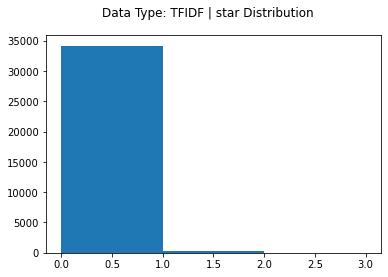

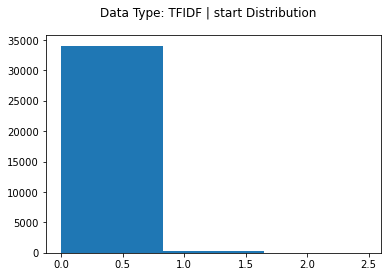

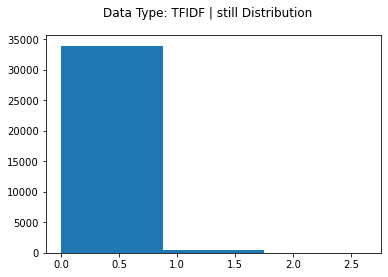

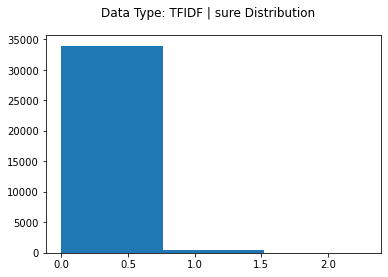

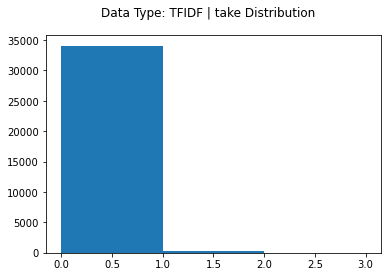

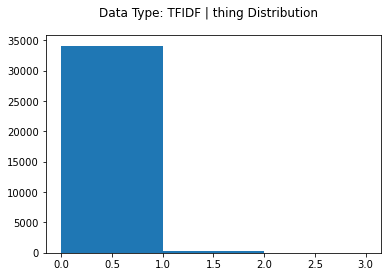

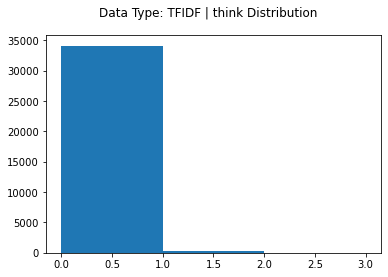

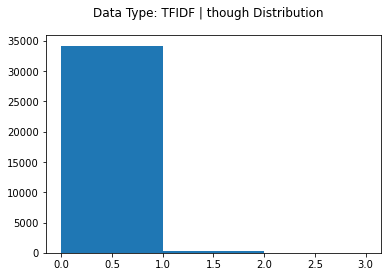

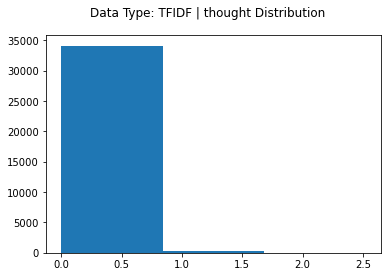

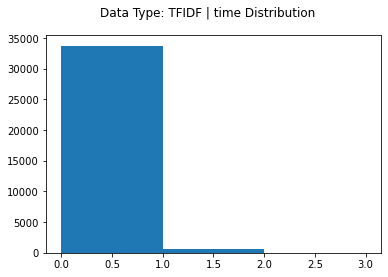

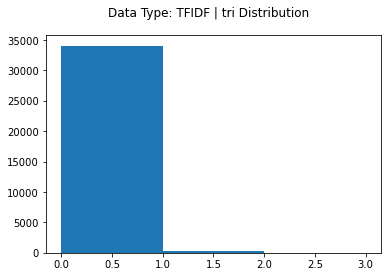

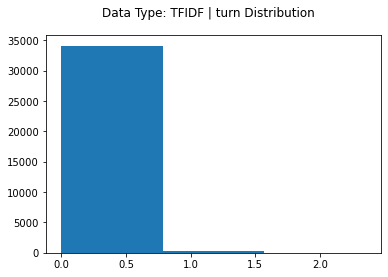

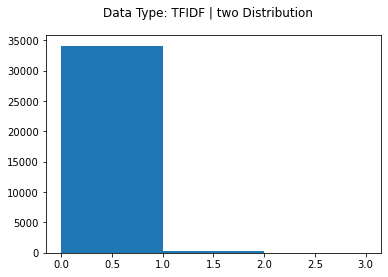

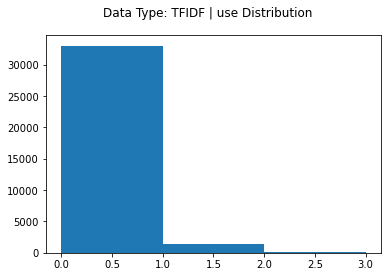

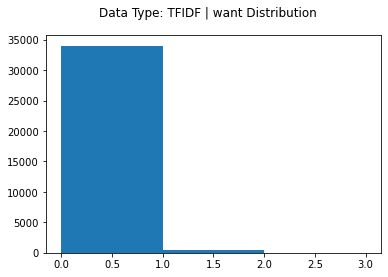

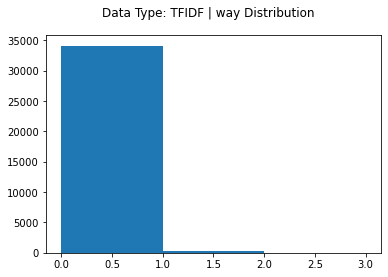

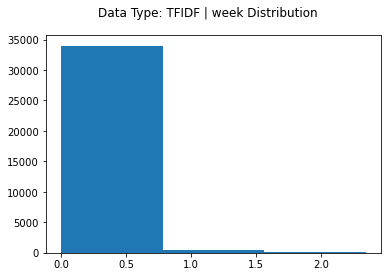

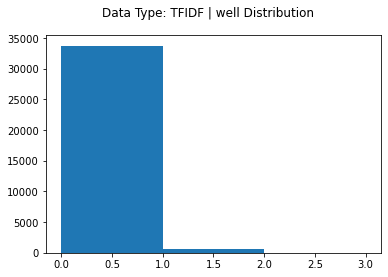

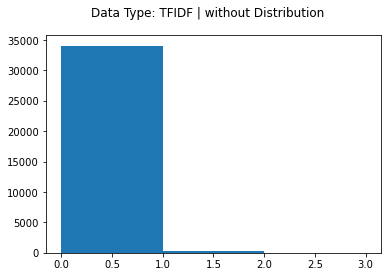

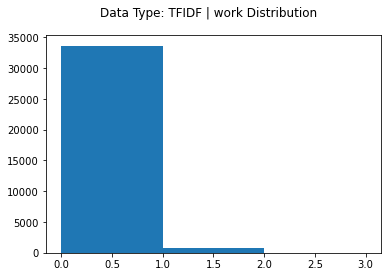

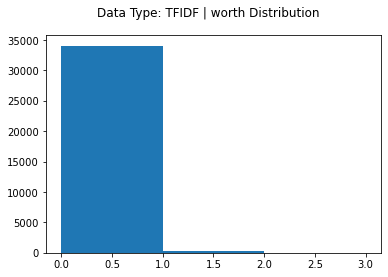

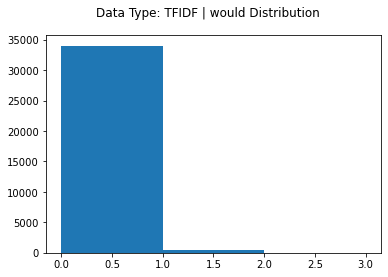

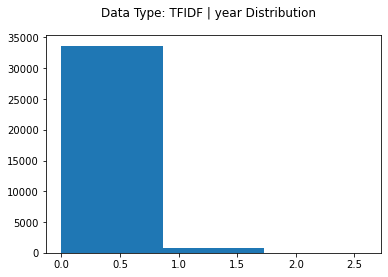

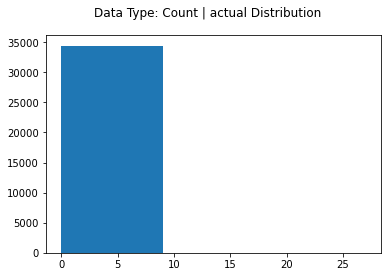

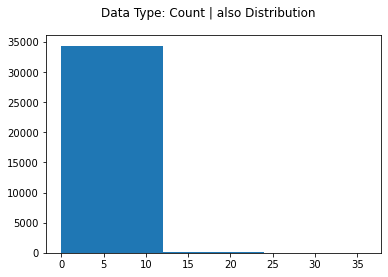

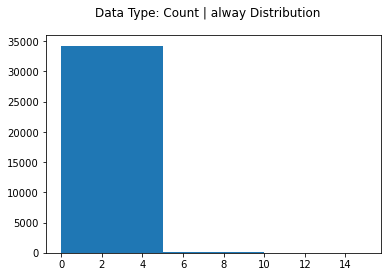

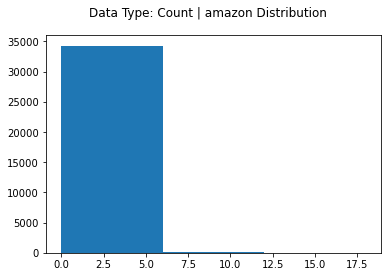

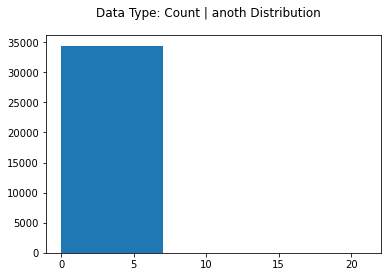

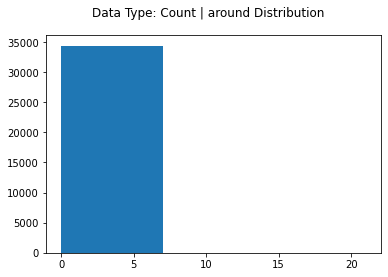

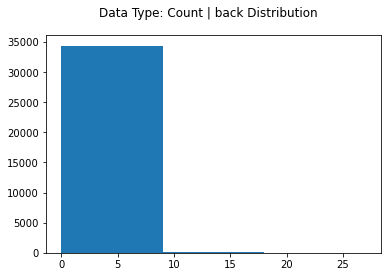

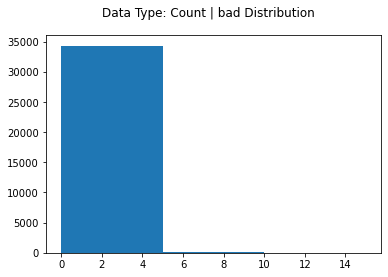

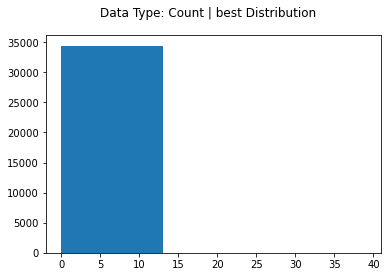

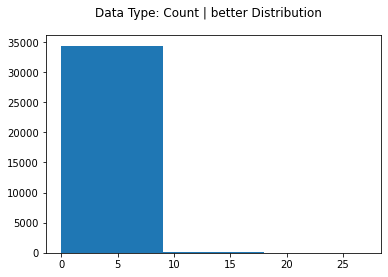

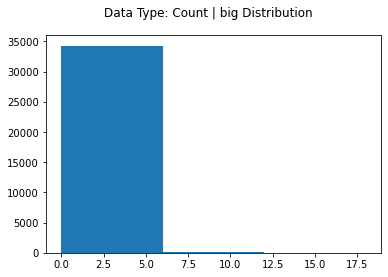

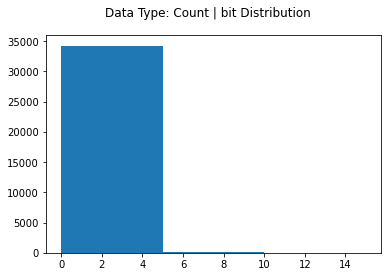

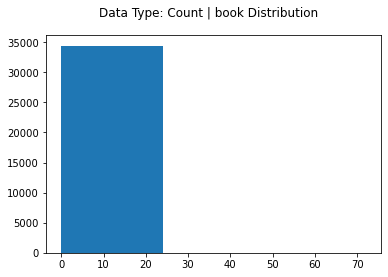

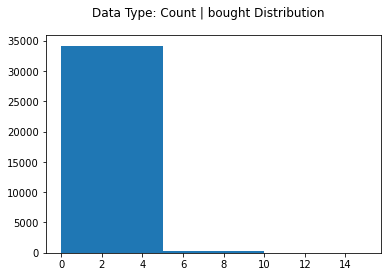

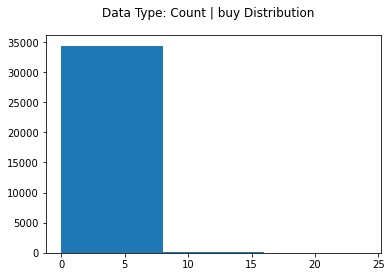

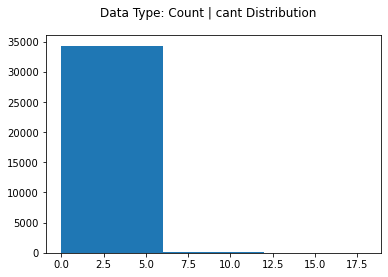

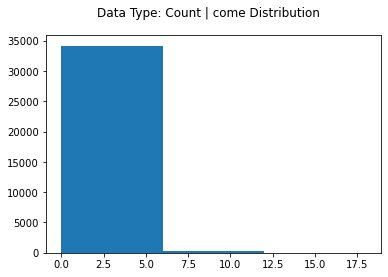

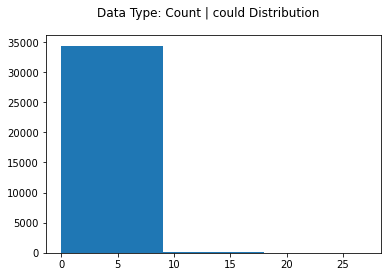

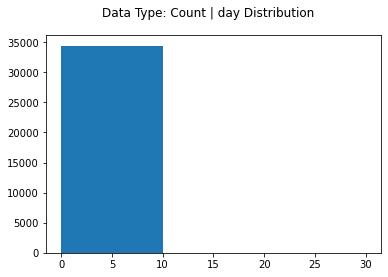

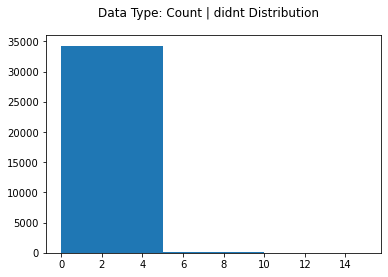

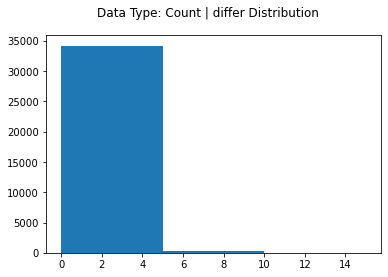

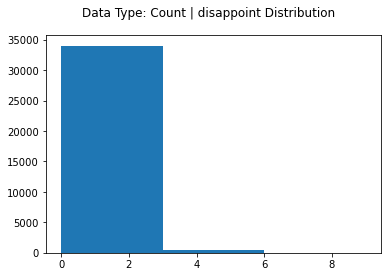

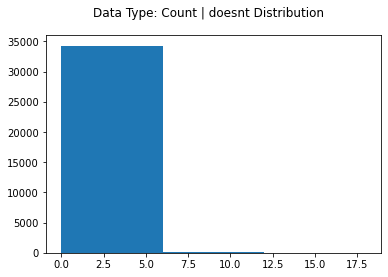

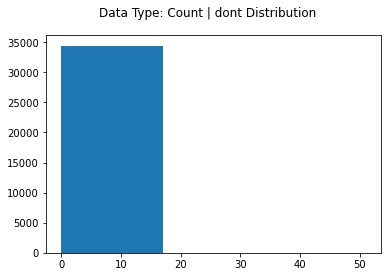

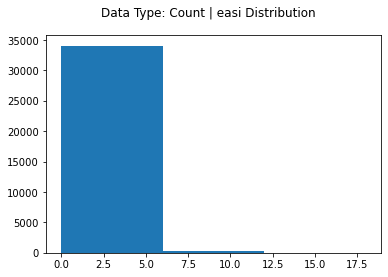

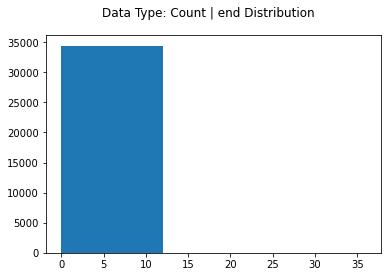

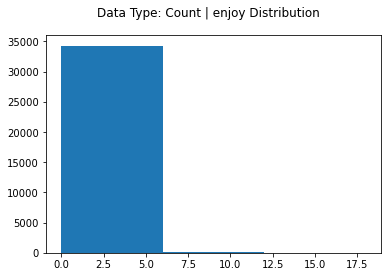

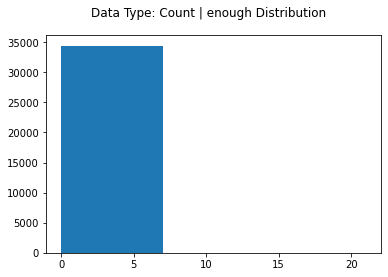

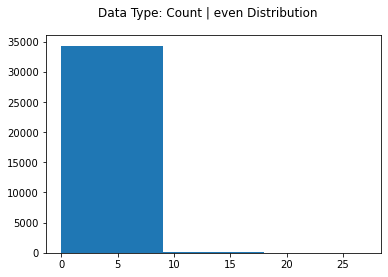

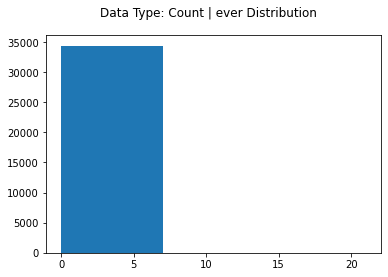

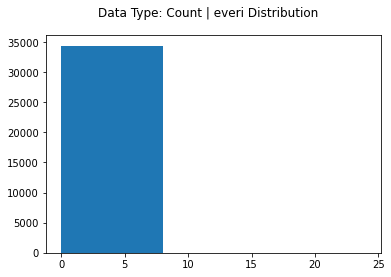

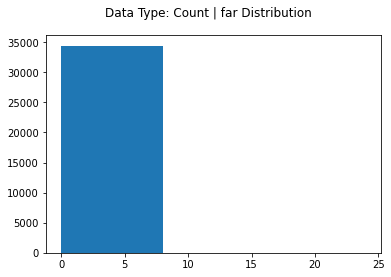

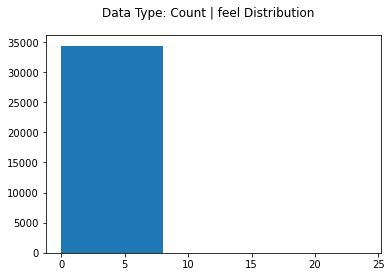

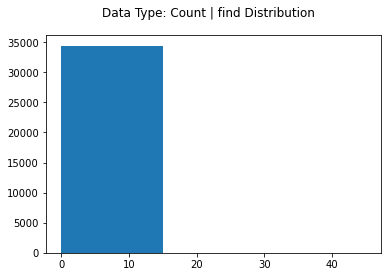

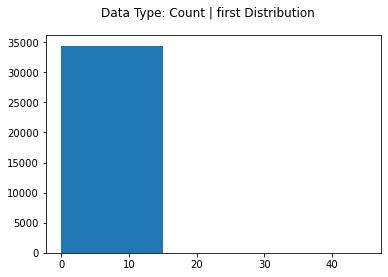

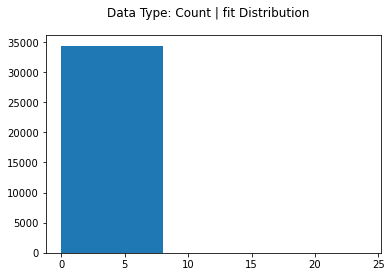

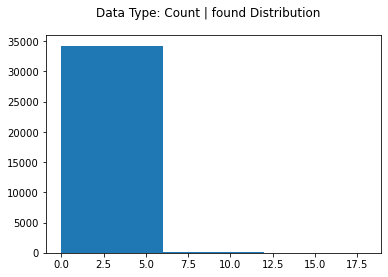

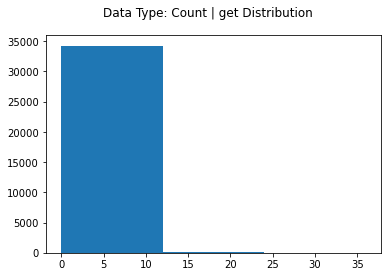

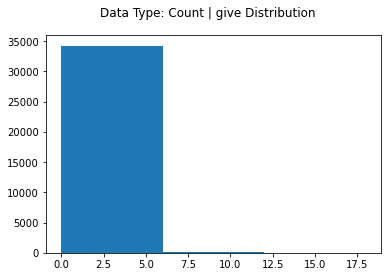

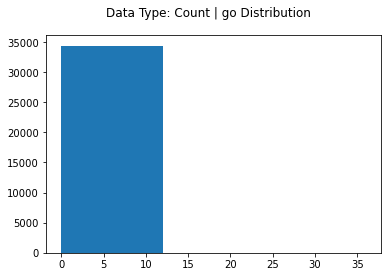

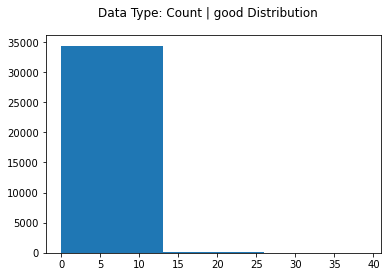

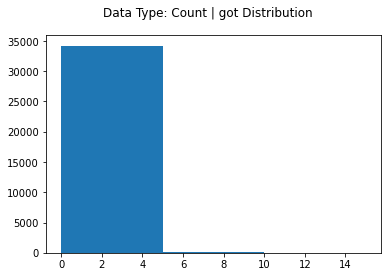

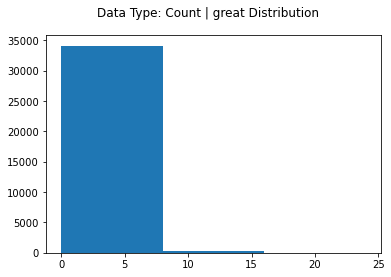

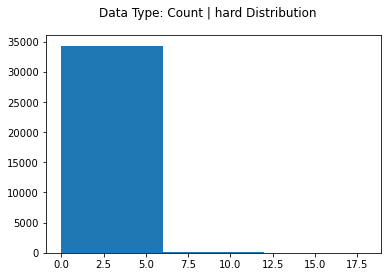

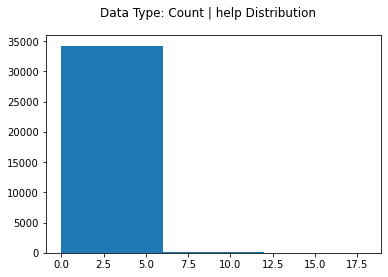

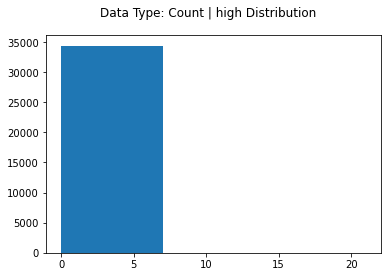

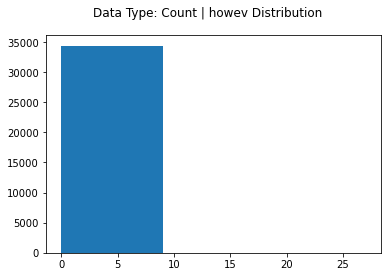

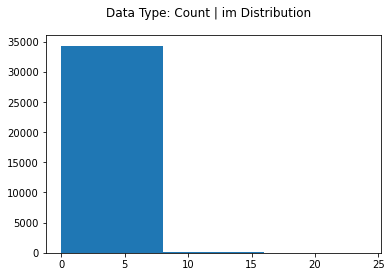

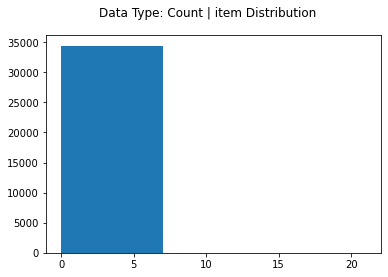

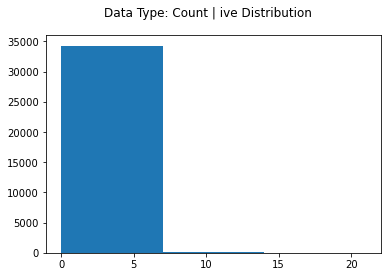

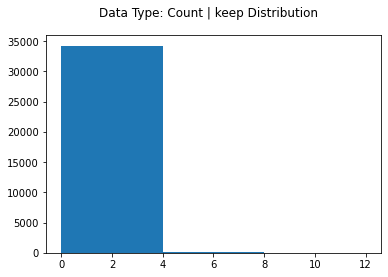

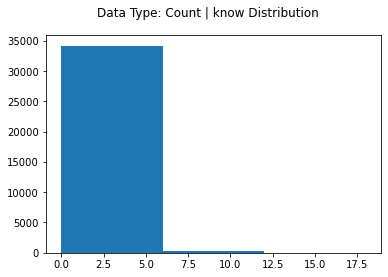

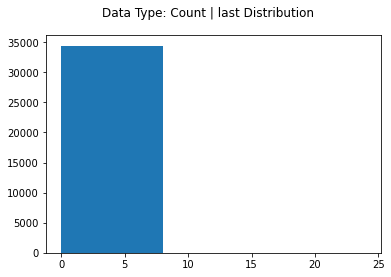

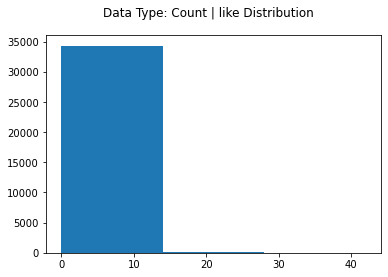

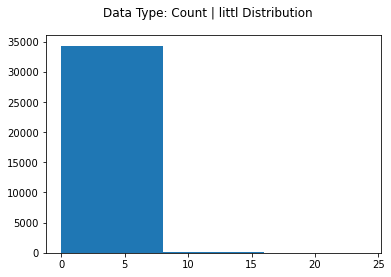

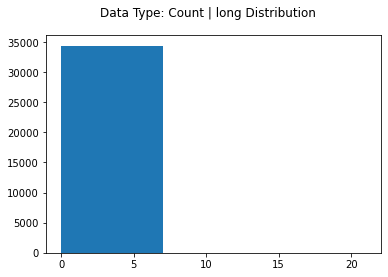

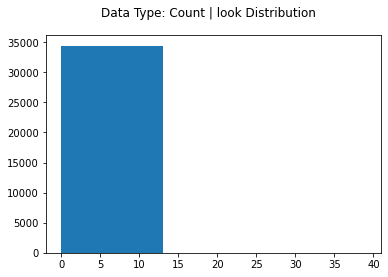

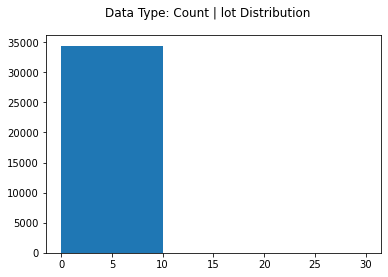

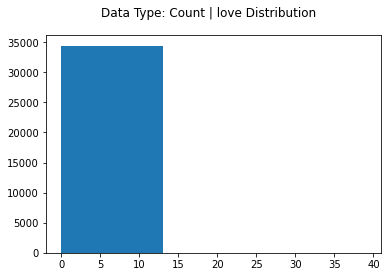

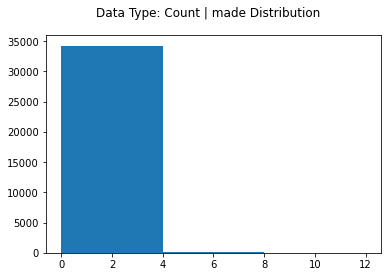

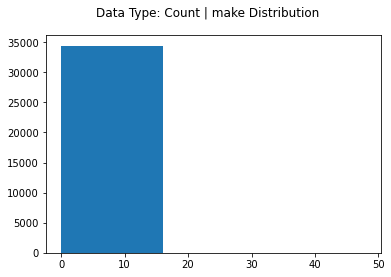

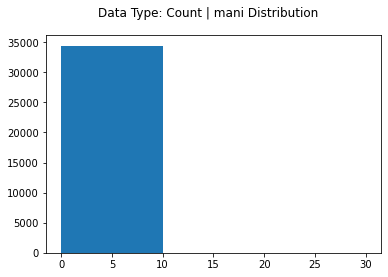

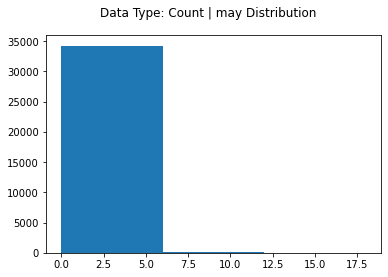

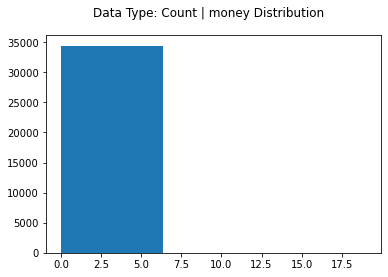

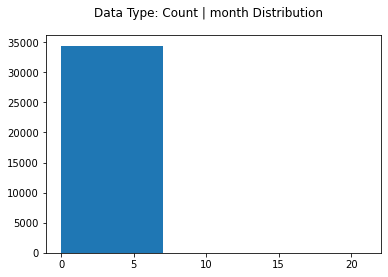

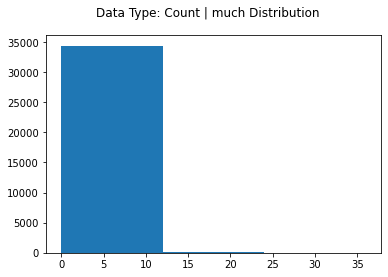

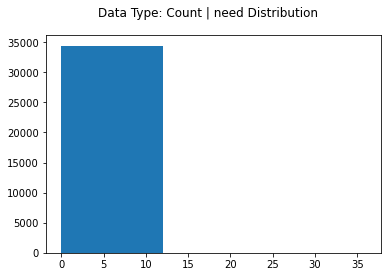

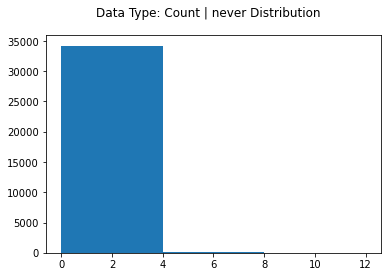

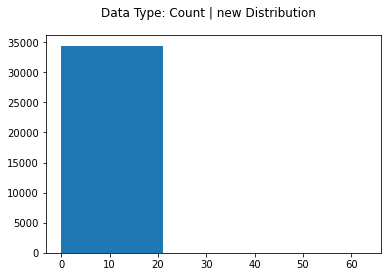

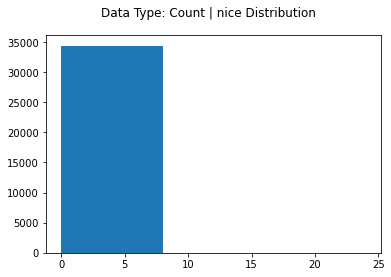

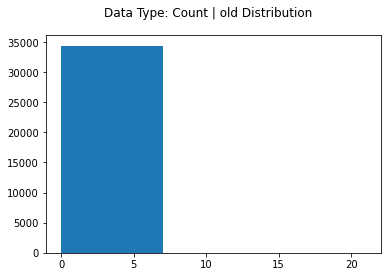

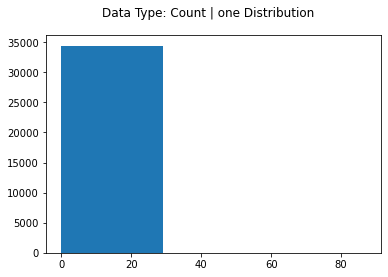

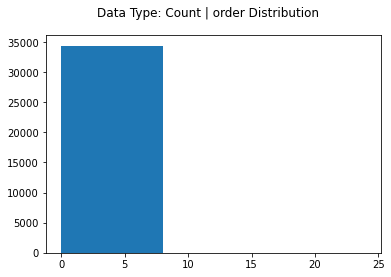

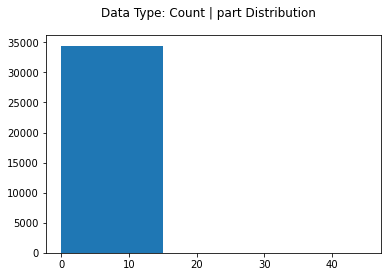

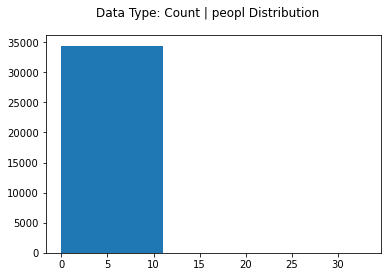

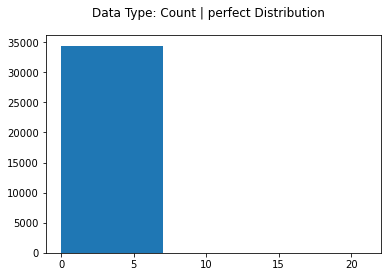

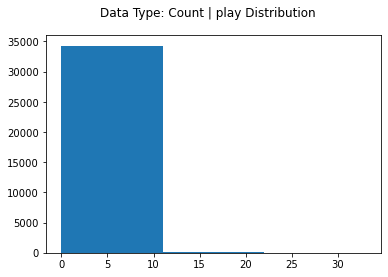

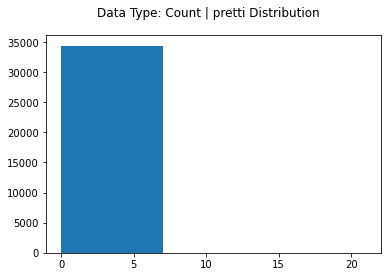

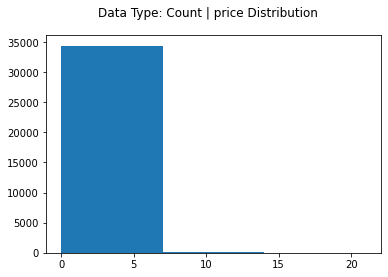

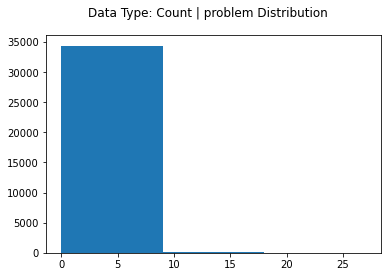

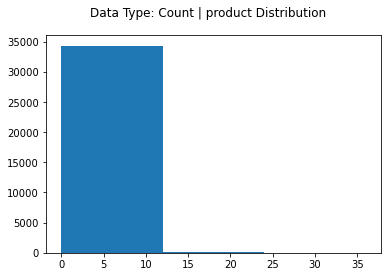

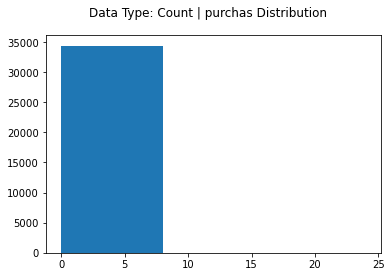

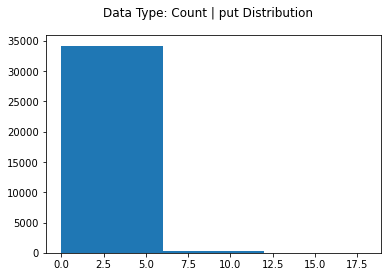

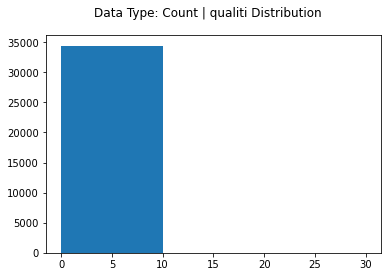

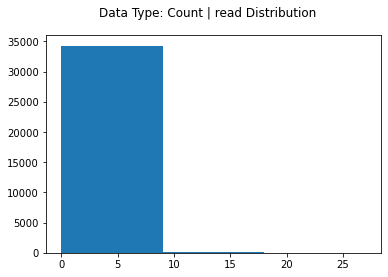

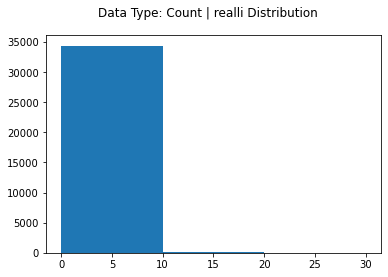

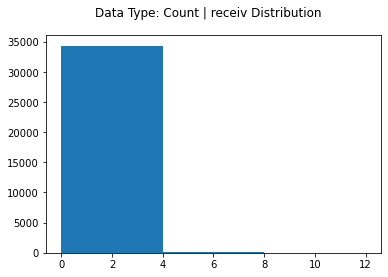

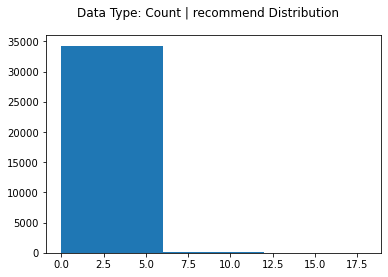

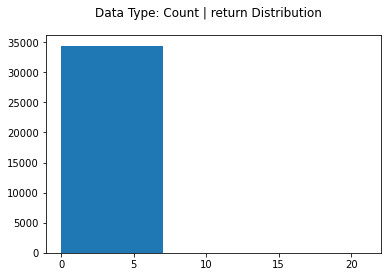

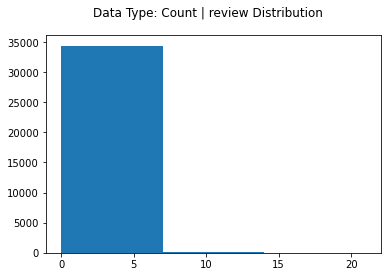

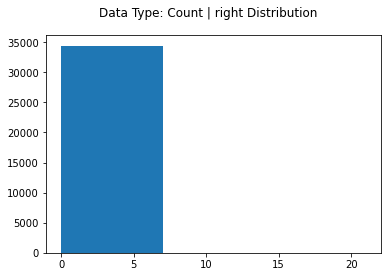

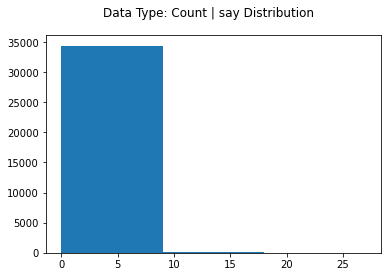

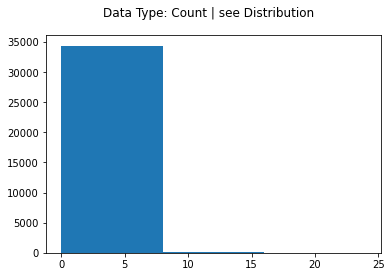

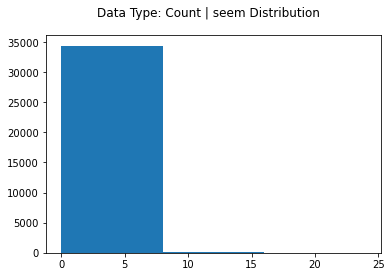

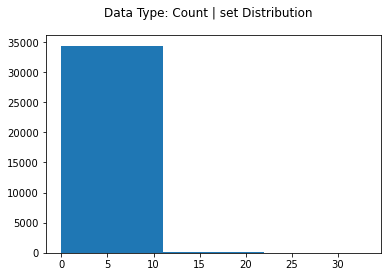

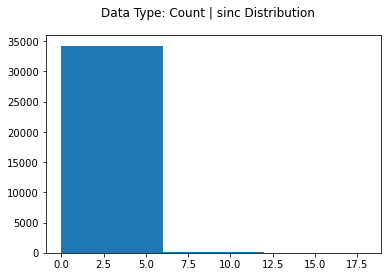

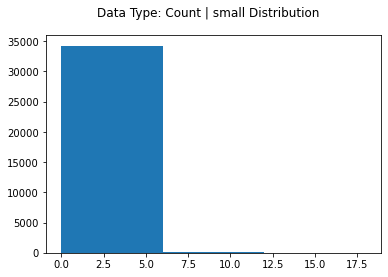

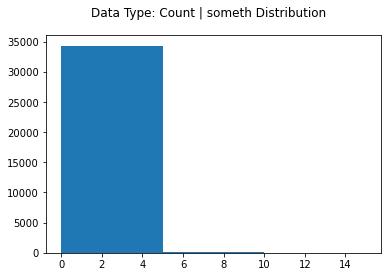

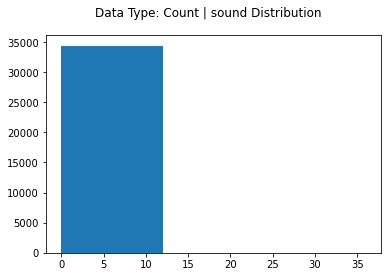

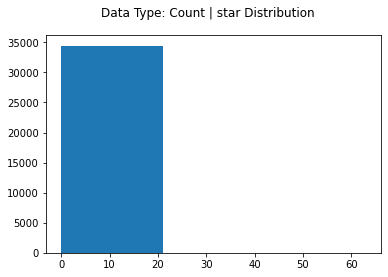

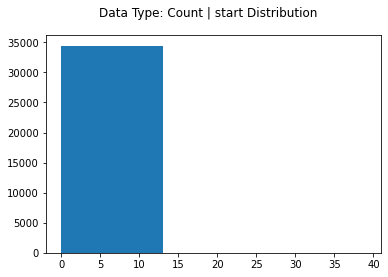

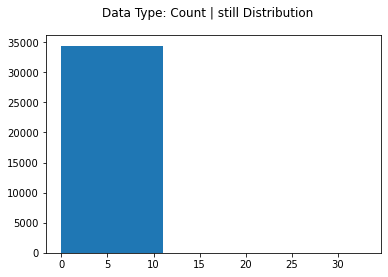

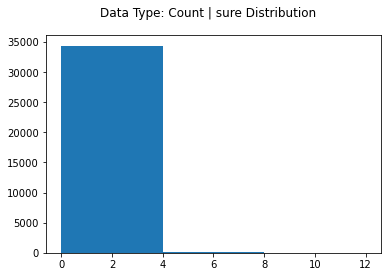

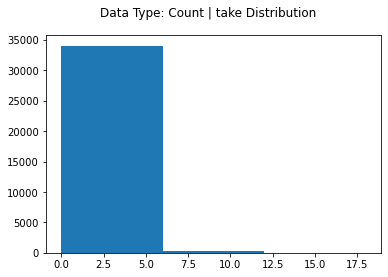

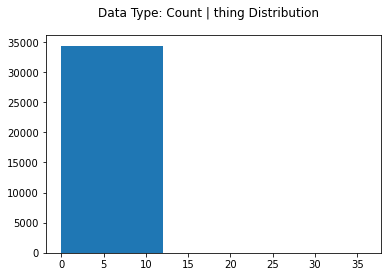

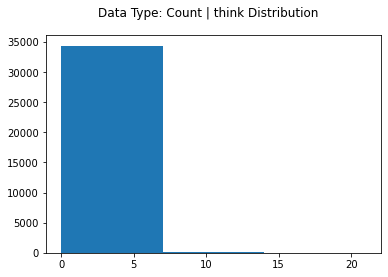

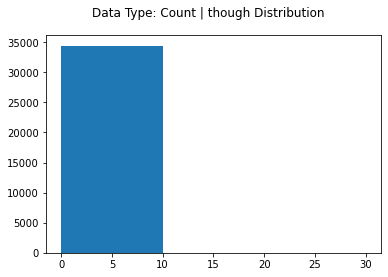

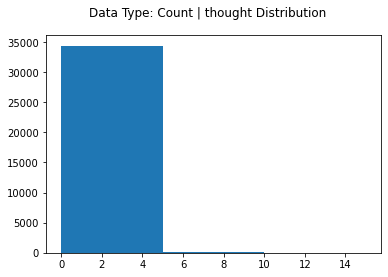

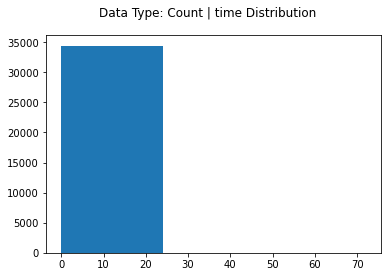

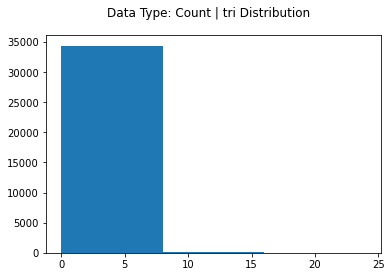

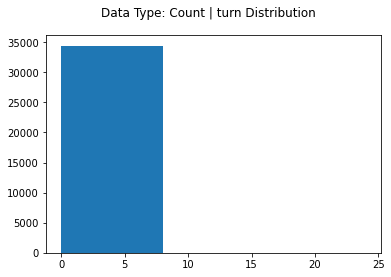

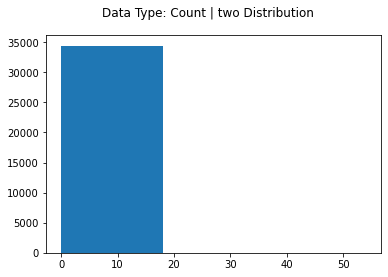

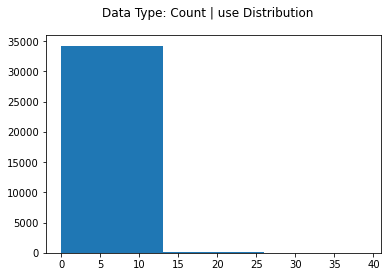

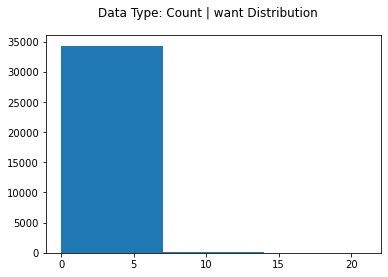

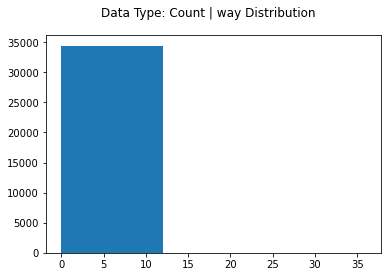

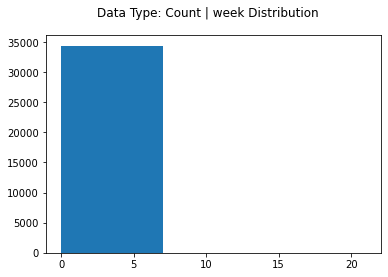

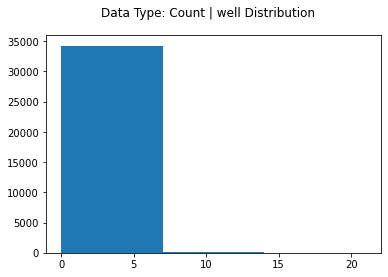

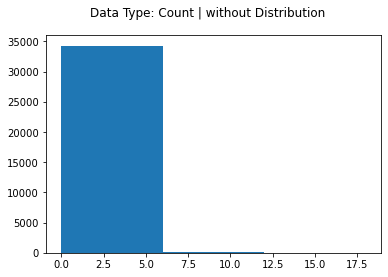

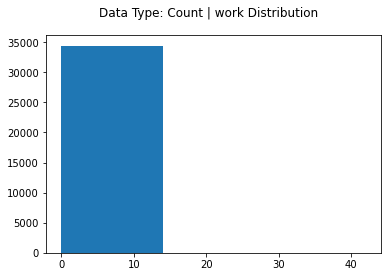

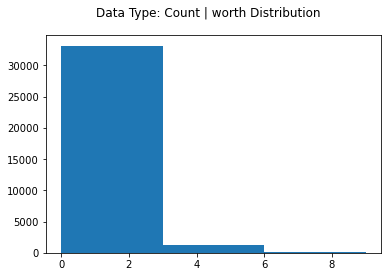

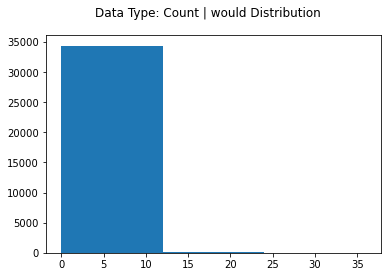

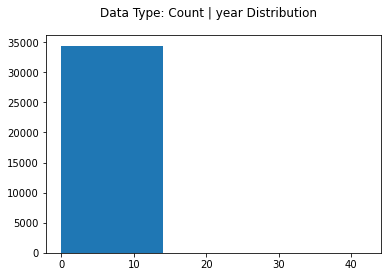

In [16]:
# Get some quick plots to show the distributions of each word in each dataset
for i in range(len(new_dfs)):
    plot_df_distributions(new_dfs[i], new_names[i])

### Class Distributions

In [17]:
# Its a list, so use collections
from collections import Counter
Counter(new_classes)

Counter({3: 19874, 1: 14562})

### Perform classification on binary data

In [18]:
# Test some basic classifiers

# Declare a list of classifiers to try
# classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), 
#                SVC(C=1.0, kernel='linear', degree=3, gamma='auto')]

classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB()]

# Create blank dataframes to hold the results of the classification attempts
scaled_boolean_results = pd.DataFrame(columns = ['Simulation', 'Classifier', 'Best', 'Worst', 'Average'])
scaled_tfidf_results = pd.DataFrame(columns = ['Simulation', 'Classifier', 'Best', 'Worst', 'Average'])
scaled_freq_results = pd.DataFrame(columns = ['Simulation', 'Classifier', 'Best', 'Worst', 'Average'])

# Run a given number of simulations
for n in range(sims):
    # Loop through each of the datasets
    for i in range(len(new_dfs)):
        print("*--------------------------------------------*")
        # Copy the dataset
        temp = new_dfs[i].copy()
    
        # Try each classifier
        for clf in classifiers:
            # Take the classifiers name
            name = str(clf.__class__.__name__)
            try:  
                # Utilize a shuffle split for the cross validation
                cv = StratifiedShuffleSplit(n_splits = folds, test_size = 0.33, random_state=np.random.randint(1,100))
                # Capture the best, worst, and average across the splits
                best = round(max(cross_val_score(clf, temp, classes, cv=cv)), 5)
                worst = round(min(cross_val_score(clf, temp, classes, cv=cv)), 5)
                avg = round((sum(cross_val_score(clf, temp, classes, cv=cv)) / len(cross_val_score(clf, temp, classes, cv=cv))), 5)
                # Print out results
                print("Simulation: {} | Data: {} | Classifier: {} | Best: {} | Worst: {} | Average: {}".format(n+1, names[i], name, best, worst, avg))
            except:
                # Alert if any error
                print("Error Calculating: {}".format(name))

            # Create a row to append to the respective df with the results
            temp_row = [n+1, name, best, worst, avg]
            
            # Append to correct df
            if(names[i] == 'Boolean'):
                scaled_boolean_results.loc[len(scaled_boolean_results), :] = temp_row
            elif(names[i] == 'TFIDF'):
                scaled_tfidf_results.loc[len(scaled_tfidf_results), :] = temp_row
            else:
                scaled_freq_results.loc[len(scaled_freq_results), :] = temp_row
        
        # Delete temp df
        del(temp)
        
        # Free up memory
        gc.collect()

*--------------------------------------------*
Simulation: 1 | Data: Boolean | Classifier: GaussianNB | Best: 0.9289 | Worst: 0.9267 | Average: 0.92761
Simulation: 1 | Data: Boolean | Classifier: MultinomialNB | Best: 0.71507 | Worst: 0.70715 | Average: 0.71049
Simulation: 1 | Data: Boolean | Classifier: BernoulliNB | Best: 0.73601 | Worst: 0.72958 | Average: 0.73308
*--------------------------------------------*
Simulation: 1 | Data: TFIDF | Classifier: GaussianNB | Best: 0.99648 | Worst: 0.99595 | Average: 0.99619
Simulation: 1 | Data: TFIDF | Classifier: MultinomialNB | Best: 0.66658 | Worst: 0.66561 | Average: 0.66596
Simulation: 1 | Data: TFIDF | Classifier: BernoulliNB | Best: 0.73856 | Worst: 0.72721 | Average: 0.73167
*--------------------------------------------*
Simulation: 1 | Data: Count | Classifier: GaussianNB | Best: 0.84829 | Worst: 0.84548 | Average: 0.84697
Simulation: 1 | Data: Count | Classifier: MultinomialNB | Best: 0.71709 | Worst: 0.71278 | Average: 0.7148
Simul

Simulation: 8 | Data: TFIDF | Classifier: MultinomialNB | Best: 0.66552 | Worst: 0.66139 | Average: 0.66341
Simulation: 8 | Data: TFIDF | Classifier: BernoulliNB | Best: 0.73671 | Worst: 0.72474 | Average: 0.73155
*--------------------------------------------*
Simulation: 8 | Data: Count | Classifier: GaussianNB | Best: 0.85225 | Worst: 0.84213 | Average: 0.84577
Simulation: 8 | Data: Count | Classifier: MultinomialNB | Best: 0.71542 | Worst: 0.70979 | Average: 0.71304
Simulation: 8 | Data: Count | Classifier: BernoulliNB | Best: 0.7375 | Worst: 0.728 | Average: 0.73149
*--------------------------------------------*
Simulation: 9 | Data: Boolean | Classifier: GaussianNB | Best: 0.93136 | Worst: 0.92731 | Average: 0.92899
Simulation: 9 | Data: Boolean | Classifier: MultinomialNB | Best: 0.71744 | Worst: 0.70794 | Average: 0.71201
Simulation: 9 | Data: Boolean | Classifier: BernoulliNB | Best: 0.73205 | Worst: 0.72677 | Average: 0.72894
*--------------------------------------------*
Simu

In [19]:
# Plot the average across the folds for each dataset
scaled_results = [scaled_boolean_results, scaled_tfidf_results, scaled_freq_results]
for i in range(len(scaled_results)):
    plot_results(scaled_results[i], new_names[i], 'Average')

## Step 5 - POS Tagging

#### Load and clean data

In [20]:
# In order to properly POS Tag, the raw text, and not vectorized text is needed
raw_text = pd.read_csv('Amazon Reviews.csv')
# Print out the first 10 rows
print(raw_text.head(n=10))

# Free up some memory
gc.collect()

   Unnamed: 0                                               Text  Rating
0           0  GOOD LOOKING KICKS IF YOUR KICKIN IT OLD SCHOO...     4.0
1           1  These sunglasses are all right. They were a li...     4.0
2           2  I don't see the difference between these bodys...     5.0
3           3  Very nice basic clothing.  I think the size is...     5.0
4           4  I love these socks. They fit great (my 15 mont...     5.0
5           5  Finally I have found a quality brand of swimsu...     5.0
6           6  Your company was a pleasure to work with- than...     5.0
7           7  very portable. great picture. easy to operate....     5.0
8           8  I have been looking for a pair of Docs for a w...     5.0
9           9  The quality is much better than expected. I bo...     5.0


2336

In [21]:
# Declare a blank datafame
new_df = pd.DataFrame(columns = ['Nouns', 'Verbs', 'Adjectives', 'Other', 'Class'])

# Loop through the input data
for index, row in raw_text.iterrows():
    # Get the tokens according to discussed rules
    tokens = get_words(str(row['Text']), True)
    # Create the POS for each word
    res = nltk.pos_tag(tokens)
    # Parse the tuples, and get the counts
    nouns, adjectives, verbs, other = parse_tuples(res, False)
    # Create a temp row
    temp_row = [nouns, verbs, adjectives, other, row['Rating']]
    # Append it to the dataframe
    new_df.loc[len(new_df), :] = temp_row

In [22]:
# Turn to binary problem
new_df['Class'].replace(1, 0, inplace=True)
new_df['Class'].replace(2, 0, inplace=True)
new_df['Class'].replace(4, 1, inplace=True)
new_df['Class'].replace(5, 1, inplace=True)

In [23]:
# Make sure it is a binary class problem
assert(len(set(list(new_df['Class']))) == 2)
# Show distribution
new_df['Class'].value_counts()

1.0    19874
0.0    14562
Name: Class, dtype: int64

#### Distribution Plot

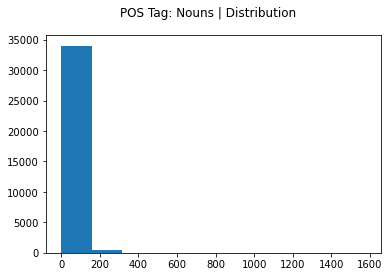

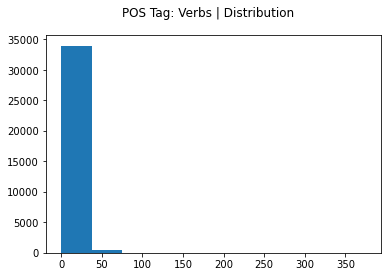

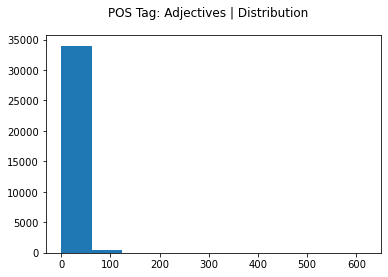

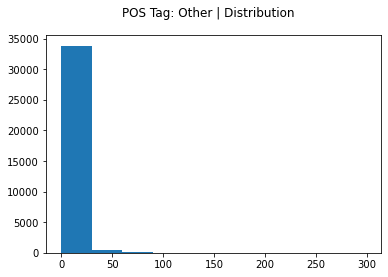

In [24]:
# Plot the distribution of word types across all documents
plot_pos_distributions(new_df, ['Nouns', 'Verbs', 'Adjectives', 'Other'])

#### Attempt Classification

In [25]:
# Test some basic classifiers

# Declare a list of classifiers to try
# classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), 
#                SVC(C=1.0, kernel='linear', degree=3, gamma='auto')]

classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB()]

# Create blank dataframes to hold the results of the classification attempts
pos_results = pd.DataFrame(columns = ['Simulation', 'Classifier', 'Best', 'Worst', 'Average'])

# Run a given number of simulations
for n in range(sims):
    pos_classes = new_df['Class']
    pos_classes = [int(x) for x in pos_classes]
    temp = new_df.copy()
    temp.drop('Class', inplace=True, axis=1)
    # Try each classifier
    for clf in classifiers:
        # Take the classifiers name
        name = str(clf.__class__.__name__)
        try:  
            # Utilize a shuffle split for the cross validation
            cv = StratifiedShuffleSplit(n_splits = folds, test_size = 0.33, random_state=np.random.randint(1,100))
            # Capture the best, worst, and average across the splits
            best = round(max(cross_val_score(clf, temp, pos_classes, cv=cv)), 5)
            worst = round(min(cross_val_score(clf, temp, pos_classes, cv=cv)), 5)
            avg = round((sum(cross_val_score(clf, temp, pos_classes, cv=cv)) / len(cross_val_score(clf, temp, pos_classes, cv=cv))), 5)
            # Print out results
            print("Simulation: {} | Data: {} | Classifier: {} | Best: {} | Worst: {} | Average: {}".format(n+1, "POS", name, best, worst, avg))
        except:
            # Alert if any error
            print("Error Calculating: {}".format(name))

        # Create a row to append to the respective df with the results
        temp_row = [n+1, name, best, worst, avg]

        # Append to correct df
        pos_results.loc[len(pos_results), :] = temp_row

    # Delete temp df
    del(temp)

    # Free up memory
    gc.collect()

Simulation: 1 | Data: POS | Classifier: GaussianNB | Best: 0.57849 | Worst: 0.5689 | Average: 0.5748
Simulation: 1 | Data: POS | Classifier: MultinomialNB | Best: 0.58263 | Worst: 0.57761 | Average: 0.58019
Simulation: 1 | Data: POS | Classifier: BernoulliNB | Best: 0.57709 | Worst: 0.57709 | Average: 0.57709
Simulation: 2 | Data: POS | Classifier: GaussianNB | Best: 0.57902 | Worst: 0.56758 | Average: 0.57195
Simulation: 2 | Data: POS | Classifier: MultinomialNB | Best: 0.58439 | Worst: 0.58087 | Average: 0.58281
Simulation: 2 | Data: POS | Classifier: BernoulliNB | Best: 0.57709 | Worst: 0.57709 | Average: 0.57709
Simulation: 3 | Data: POS | Classifier: GaussianNB | Best: 0.57744 | Worst: 0.54259 | Average: 0.56362
Simulation: 3 | Data: POS | Classifier: MultinomialNB | Best: 0.58228 | Worst: 0.57797 | Average: 0.58022
Simulation: 3 | Data: POS | Classifier: BernoulliNB | Best: 0.57709 | Worst: 0.57709 | Average: 0.57709
Simulation: 4 | Data: POS | Classifier: GaussianNB | Best: 0.57

In [26]:
# Store all scaled results in one list
plot_results(pos_results, "POS", 'Average')